In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random

C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1086: NumbaDeprecatio

In [2]:
sc.set_figure_params(format='png')  # for beautified visualization
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params(style='scvelo', format='png')  # for beautified visualization

In [3]:
# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")


In [4]:
adata = sc.read_h5ad('integrated young.h5ad')
adata

AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities',

In [5]:
cell_type = {
    "0": "Mature Skeletal muscle",
    "1": "Fibroadipogenic cells 1",
    "2": "Myo-Fibroblast",
    "3": "Monocytes/Macrophages",
    "4": "MuSCs and progenitors",
    "5": "MuSCs and Myoblasts",
    "6": "Anti-inflammatory Macrophages 1",
    "7": "Endothelial cells",
    "8": "Residence Macrophages/APC",
    "9": "Neutrophils",
    "10": "Anti-inflammatory Macrophages 2",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "B cells/Residence Macrophages/APC",
    "14": "T-lymphocytes and NKCs",
    "15": "Pericyte cells", 
    "16": "Tenocyte",
    "17": "Schwann cells",
    "18": "Lymphatic endothelial cells",
        
}

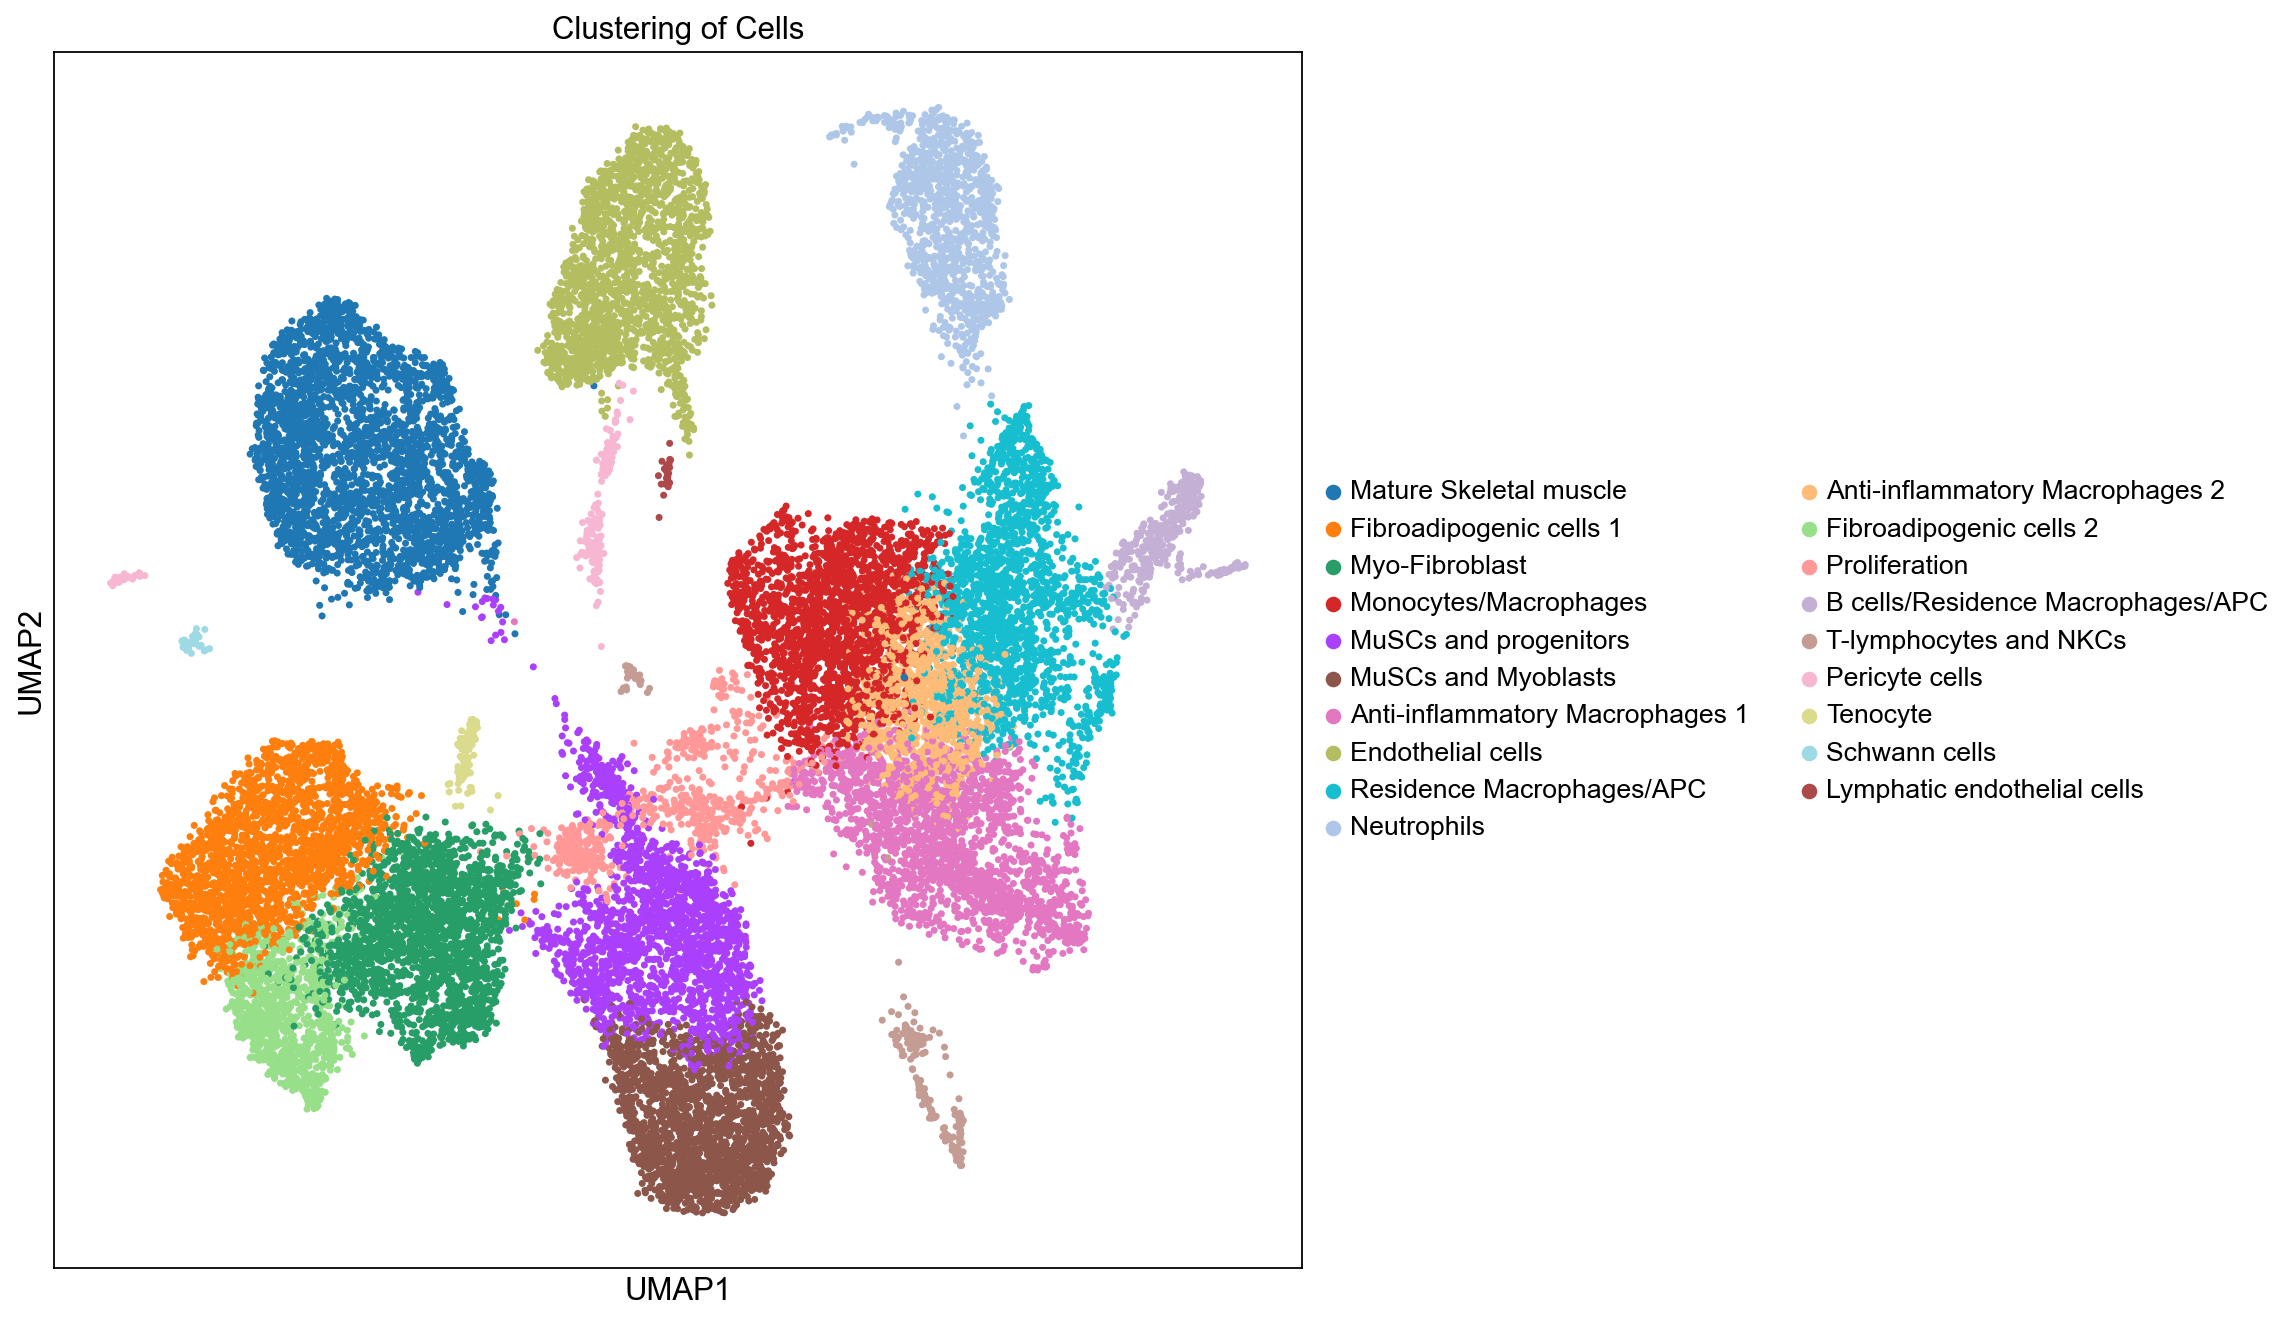

In [5]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=40, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

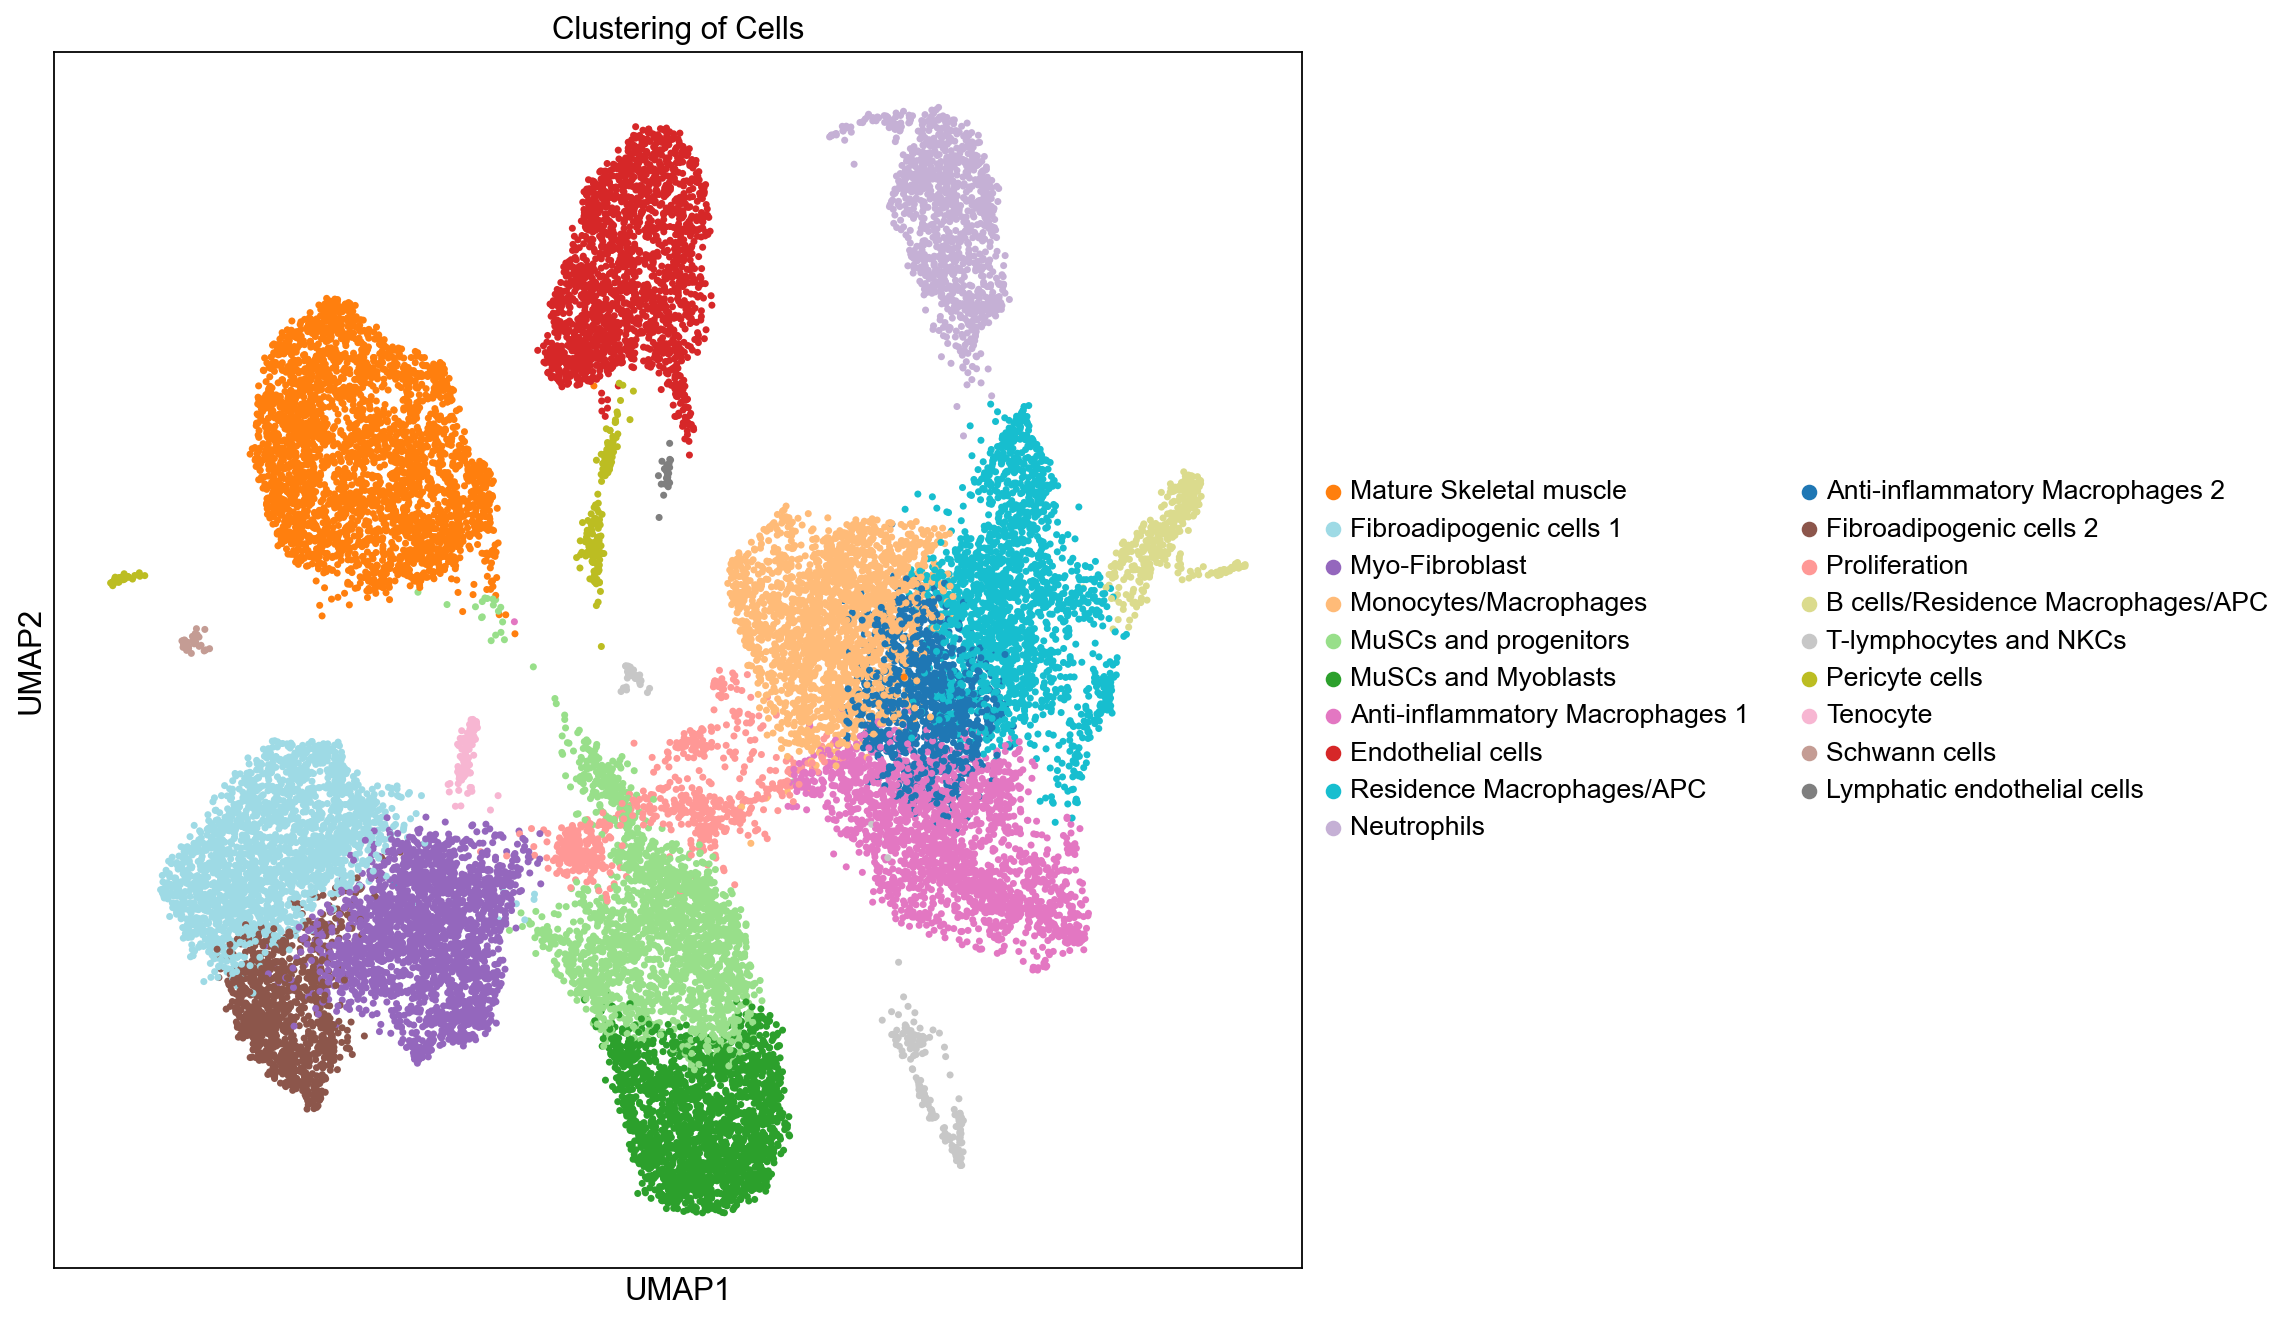

In [7]:
# Set figure parameters
celltypePalette = {
    "Mature Skeletal muscle": '#ff7f0e',
    "Fibroadipogenic cells 1": '#9edae5',
    "Myo-Fibroblast": '#9467bd',
    "Monocytes/Macrophages": '#ffbb78',
    "MuSCs and progenitors": '#98df8a',
    "MuSCs and Myoblasts": '#2ca02c',
    "Anti-inflammatory Macrophages 1": '#e377c2',
    "Endothelial cells": '#d62728',
    "Residence Macrophages/APC": '#17becf',
    "Neutrophils": '#c5b0d5',
    "Anti-inflammatory Macrophages 2": '#1f77b4',
    "Fibroadipogenic cells 2": '#8c564b',
    "Proliferation":  '#ff9896',
    "B cells/Residence Macrophages/APC": '#dbdb8d',
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Pericyte cells": '#bcbd22',
    "Tenocyte":  '#f7b6d2',
    "Schwann cells":  '#c49c94',
    "Lymphatic endothelial cells": '#7f7f7f',
}
# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=40, title='Clustering of Cells', save='umap_plot_color.png')
pl.show()

In [ ]:
#1f77b4
#aec7e8
#ff7f0e
#ffbb78
#2ca02c
#98df8a
#d62728
#ff9896
#9467bd
#c5b0d5
#8c564b
#c49c94
#e377c2
#f7b6d2
#7f7f7f
#c7c7c7
#bcbd22
#dbdb8d
#17becf
#9edae5

In [8]:
#COUNTING CELLS


adata.obs['batch'].unique().tolist()
def map_condition(x):
    if 'Sham_GFP' in x:
        return 'Sham_GFP'
    elif 'Sham_noGFP' in x:
        return 'Sham_noGFP'
    elif 'OV_GFP' in x:
        return 'OV_GFP'
    else:
        return 'OV_noGFP'

adata.obs['condition'] = adata.obs.batch.map(map_condition)
adata.obs


n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAGTTCCGTTC-1-Sham_GFP               4116       15405.0            653.0   
AAACCCATCCATACTT-1-Sham_GFP               2850       10036.0            417.0   
AAACCCATCCCACAGG-1-Sham_GFP               2414        7717.0            212.0   
AAACGAACATACCACA-1-Sham_GFP               2668        9444.0            274.0   
AAACGAAGTCGTGGTC-1-Sham_GFP               2716        9703.0            588.0   
...                                        ...           ...              ...   
TTTGTTGAGATGGCGT-1-OV_noGFP               1873        4125.0            218.0   
TTTGTTGCACCGAATT-1-OV_noGFP               4590       23666.0            426.0   
TTTGTTGCATCCTTCG-1-OV_noGFP               3014       10031.0            198.0   
TTTGTTGGTCAGGAGT-1-OV_noGFP               1780        4392.0             67.0   
TTTGTTGGTTGTGCAT-1-OV_noGFP               2986        8995.0            427.0   

                             pct_counts_mt     batch  n_genes leiden  \
AAACCCAGTTCCGTTC-1-Sham_GFP       4.238883  Sham_GFP     4116      7   
AAACCCATCCATACTT-1-Sham_GFP       4.155042  Sham_GFP     2850      5   
AAACCCATCCCACAGG-1-Sham_GFP       2.747182  Sham_GFP     2413      5   
AAACGAACATACCACA-1-Sham_GFP       2.901313  Sham_GFP     2668      5   
AAACGAAGTCGTGGTC-1-Sham_GFP       6.059981  Sham_GFP     2716      5   
...                                    ...       ...      ...    ...   
TTTGTTGAGATGGCGT-1-OV_noGFP       5.284848  OV_noGFP     1873      3   
TTTGTTGCACCGAATT-1-OV_noGFP       1.800051  OV_noGFP     4590      6   
TTTGTTGCATCCTTCG-1-OV_noGFP       1.973881  OV_noGFP     3014      3   
TTTGTTGGTCAGGAGT-1-OV_noGFP       1.525501  OV_noGFP     1780      8   
TTTGTTGGTTGTGCAT-1-OV_noGFP       4.747082  OV_noGFP     2986      3   

                                                   cell type condition  
AAACCCAGTTCCGTTC-1-Sham_GFP                Endothelial cells  Sham_GFP  
AAACCCATCCATACTT-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACCCATCCCACAGG-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACGAACATACCACA-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACGAAGTCGTGGTC-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
...                                                      ...       ...  
TTTGTTGAGATGGCGT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  
TTTGTTGCACCGAATT-1-OV_noGFP  Anti-inflammatory Macrophages 1  OV_noGFP  
TTTGTTGCATCCTTCG-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  
TTTGTTGGTCAGGAGT-1-OV_noGFP        Residence Macrophages/APC  OV_noGFP  
TTTGTTGGTTGTGCAT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  

[23914 rows x 9 columns]

In [9]:
num_tot_cells = adata.obs.groupby(['batch']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.n_genes))
num_tot_cells

{'Sham_GFP': 2592, 'Sham_noGFP': 8061, 'OV_GFP': 4735, 'OV_noGFP': 8526}

In [10]:
cell_type_counts = adata.obs.groupby(['batch', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()

cell_type_counts

batch condition                    cell type  n_genes_by_counts  \
0   Sham_GFP  Sham_GFP       Mature Skeletal muscle                 41   
1   Sham_GFP  Sham_GFP      Fibroadipogenic cells 1                 34   
2   Sham_GFP  Sham_GFP               Myo-Fibroblast                 30   
3   Sham_GFP  Sham_GFP        Monocytes/Macrophages                  1   
4   Sham_GFP  Sham_GFP        MuSCs and progenitors                517   
..       ...       ...                          ...                ...   
67  OV_noGFP  OV_noGFP       T-lymphocytes and NKCs                164   
68  OV_noGFP  OV_noGFP               Pericyte cells                 64   
69  OV_noGFP  OV_noGFP                     Tenocyte                 26   
70  OV_noGFP  OV_noGFP                Schwann cells                 11   
71  OV_noGFP  OV_noGFP  Lymphatic endothelial cells                  7   

    total_counts  total_counts_mt  pct_counts_mt  n_genes  leiden  
0             41               41             41       41      41  
1             34               34             34       34      34  
2             30               30             30       30      30  
3              1                1              1        1       1  
4            517              517            517      517     517  
..           ...              ...            ...      ...     ...  
67           164              164            164      164     164  
68            64               64             64       64      64  
69            26               26             26       26      26  
70            11               11             11       11      11  
71             7                7              7        7       7  

[72 rows x 9 columns]

In [11]:
cell_type_counts['total_cells'] = cell_type_counts.batch.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.n_genes / cell_type_counts.total_cells

cell_type_counts

batch condition                    cell type  n_genes_by_counts  \
0   Sham_GFP  Sham_GFP       Mature Skeletal muscle                 41   
1   Sham_GFP  Sham_GFP      Fibroadipogenic cells 1                 34   
2   Sham_GFP  Sham_GFP               Myo-Fibroblast                 30   
3   Sham_GFP  Sham_GFP        Monocytes/Macrophages                  1   
4   Sham_GFP  Sham_GFP        MuSCs and progenitors                517   
..       ...       ...                          ...                ...   
67  OV_noGFP  OV_noGFP       T-lymphocytes and NKCs                164   
68  OV_noGFP  OV_noGFP               Pericyte cells                 64   
69  OV_noGFP  OV_noGFP                     Tenocyte                 26   
70  OV_noGFP  OV_noGFP                Schwann cells                 11   
71  OV_noGFP  OV_noGFP  Lymphatic endothelial cells                  7   

    total_counts  total_counts_mt  pct_counts_mt  n_genes  leiden  \
0             41               41             41       41      41   
1             34               34             34       34      34   
2             30               30             30       30      30   
3              1                1              1        1       1   
4            517              517            517      517     517   
..           ...              ...            ...      ...     ...   
67           164              164            164      164     164   
68            64               64             64       64      64   
69            26               26             26       26      26   
70            11               11             11       11      11   
71             7                7              7        7       7   

    total_cells  frequency  
0          2592   0.015818  
1          2592   0.013117  
2          2592   0.011574  
3          2592   0.000386  
4          2592   0.199460  
..          ...        ...  
67         8526   0.019235  
68         8526   0.007506  
69         8526   0.003049  
70         8526   0.001290  
71         8526   0.000821  

[72 rows x 11 columns]

<Figure size 960x640 with 0 Axes>

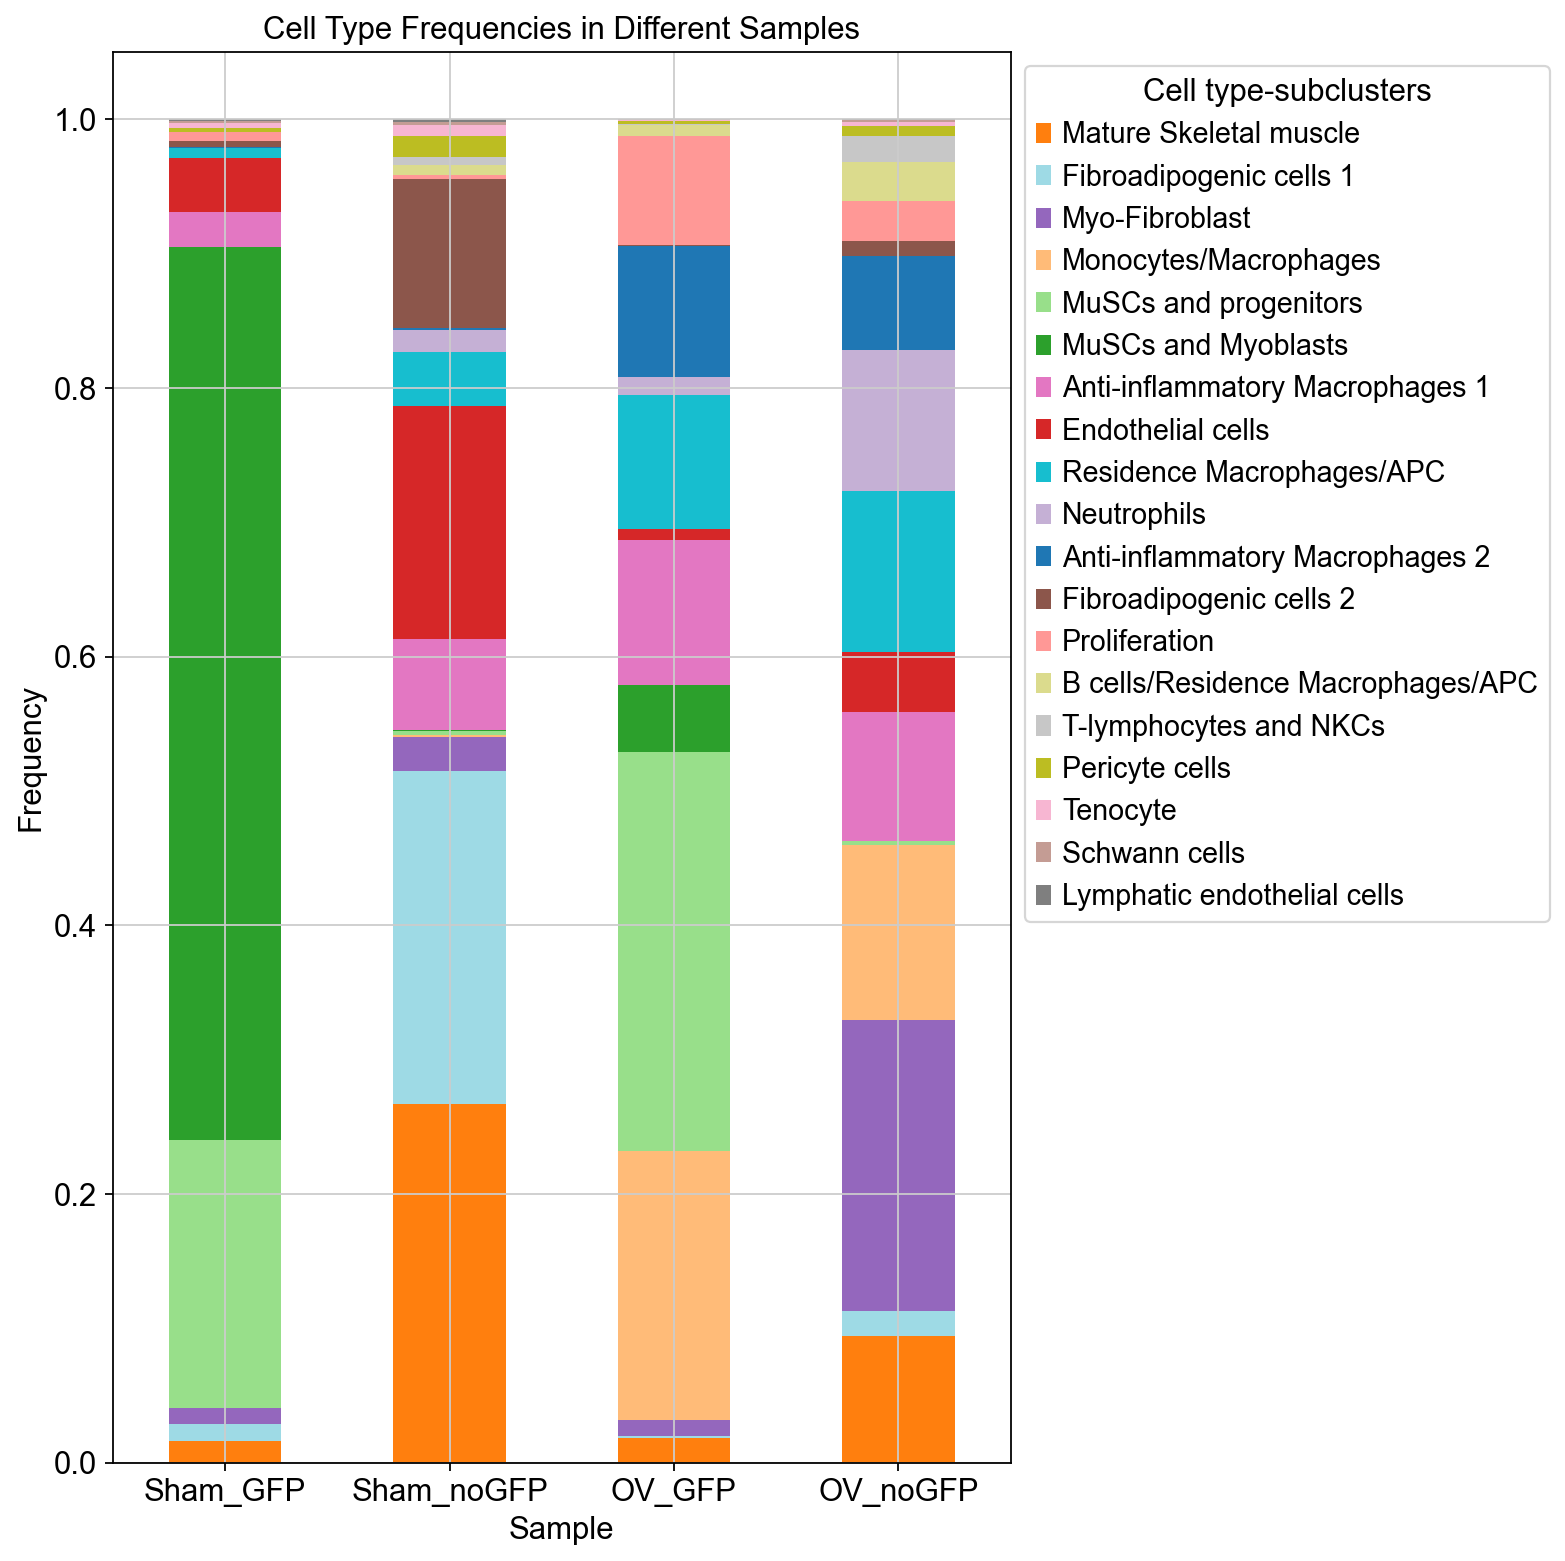

In [12]:
# Set figure parameters
celltypePalette = {
    "Mature Skeletal muscle": '#ff7f0e',
    "Fibroadipogenic cells 1": '#9edae5',
    "Myo-Fibroblast": '#9467bd',
    "Monocytes/Macrophages": '#ffbb78',
    "MuSCs and progenitors": '#98df8a',
    "MuSCs and Myoblasts": '#2ca02c',
    "Anti-inflammatory Macrophages 1": '#e377c2',
    "Endothelial cells": '#d62728',
    "Residence Macrophages/APC": '#17becf',
    "Neutrophils": '#c5b0d5',
    "Anti-inflammatory Macrophages 2": '#1f77b4',
    "Fibroadipogenic cells 2": '#8c564b',
    "Proliferation":  '#ff9896',
    "B cells/Residence Macrophages/APC": '#dbdb8d',
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Pericyte cells": '#bcbd22',
    "Tenocyte":  '#f7b6d2',
    "Schwann cells":  '#c49c94',
    "Lymphatic endothelial cells": '#7f7f7f',
}
  

# Filter cell_type_counts to include only relevant columns
cell_type_counts = cell_type_counts[['batch', 'condition', 'cell type', 'frequency']]

# Set the figure size
pl.figure(figsize=(12, 8))

# Define the order of samples in the plot
sample_order = ['Sham_GFP', 'Sham_noGFP', 'OV_GFP', 'OV_noGFP']

# Filter data for the specified samples
filtered_data = cell_type_counts[cell_type_counts['condition'].isin(sample_order)]

# Pivot the DataFrame for a stacked bar plot
stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Create a stacked bar plot with the specified color palette
stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette[col] for col in stacked_data.columns])

# Set plot properties
pl.xticks(rotation=0)  # Keep the x-axis labels horizontal
pl.xlabel('Sample')
pl.ylabel('Frequency')
pl.legend(title='Cell type-subclusters', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
pl.title('Cell Type Frequencies in Different Samples')
pl.tight_layout()
pl.savefig('bar4_plot.png')
# Show the plot
pl.show()

In [ ]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['OV_GFP', 'OV_noGFP'])]

# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]


In [11]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['OV_GFP', 'OV_noGFP'])]


In [12]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]


In [6]:
# Subset the data for the 'Residence Macrophages/APC 1' cluster
subset_adata2 = subset_adata[subset_adata.obs['cell type'].isin(["Endothelial cells"])]
subset_adata2.obs

n_genes_by_counts  total_counts  \
AAACCCAGTTCCGTTC-1-Sham_GFP                 4116       15405.0   
AAGCGTTCAAGTGGGT-1-Sham_GFP                 1064        1618.0   
AAGGAATCACGTCTCT-1-Sham_GFP                 1536        2584.0   
ACAGGGACACATCCCT-1-Sham_GFP                  575         987.0   
ACATCGAAGTTACGAA-1-Sham_GFP                 1415        3461.0   
...                                          ...           ...   
TTTGATCTCAGTCCGG-1-Sham_noGFP               1906        4619.0   
TTTGATCTCATCACCC-1-Sham_noGFP               1485        2488.0   
TTTGGAGCAAGGTCGA-1-Sham_noGFP               1401        2351.0   
TTTGGTTCAGTACTAC-1-Sham_noGFP               1152        2324.0   
TTTGGTTTCCCAGCGA-1-Sham_noGFP                689        1314.0   

                               total_counts_mt  pct_counts_mt       batch  \
AAACCCAGTTCCGTTC-1-Sham_GFP              653.0       4.238883    Sham_GFP   
AAGCGTTCAAGTGGGT-1-Sham_GFP               47.0       2.904821    Sham_GFP   
AAGGAATCACGTCTCT-1-Sham_GFP               76.0       2.941176    Sham_GFP   
ACAGGGACACATCCCT-1-Sham_GFP               39.0       3.951368    Sham_GFP   
ACATCGAAGTTACGAA-1-Sham_GFP               41.0       1.184629    Sham_GFP   
...                                        ...            ...         ...   
TTTGATCTCAGTCCGG-1-Sham_noGFP            164.0       3.550552  Sham_noGFP   
TTTGATCTCATCACCC-1-Sham_noGFP             67.0       2.692926  Sham_noGFP   
TTTGGAGCAAGGTCGA-1-Sham_noGFP            113.0       4.806465  Sham_noGFP   
TTTGGTTCAGTACTAC-1-Sham_noGFP             55.0       2.366609  Sham_noGFP   
TTTGGTTTCCCAGCGA-1-Sham_noGFP             23.0       1.750381  Sham_noGFP   

                               n_genes leiden          cell type   condition  
AAACCCAGTTCCGTTC-1-Sham_GFP       4116      6  Endothelial cells    Sham_GFP  
AAGCGTTCAAGTGGGT-1-Sham_GFP       1064      6  Endothelial cells    Sham_GFP  
AAGGAATCACGTCTCT-1-Sham_GFP       1536      6  Endothelial cells    Sham_GFP  
ACAGGGACACATCCCT-1-Sham_GFP        575      6  Endothelial cells    Sham_GFP  
ACATCGAAGTTACGAA-1-Sham_GFP       1415      6  Endothelial cells    Sham_GFP  
...                                ...    ...                ...         ...  
TTTGATCTCAGTCCGG-1-Sham_noGFP     1906      6  Endothelial cells  Sham_noGFP  
TTTGATCTCATCACCC-1-Sham_noGFP     1485      6  Endothelial cells  Sham_noGFP  
TTTGGAGCAAGGTCGA-1-Sham_noGFP     1401      6  Endothelial cells  Sham_noGFP  
TTTGGTTCAGTACTAC-1-Sham_noGFP     1152      6  Endothelial cells  Sham_noGFP  
TTTGGTTTCCCAGCGA-1-Sham_noGFP      689      6  Endothelial cells  Sham_noGFP  

[1504 rows x 9 columns]

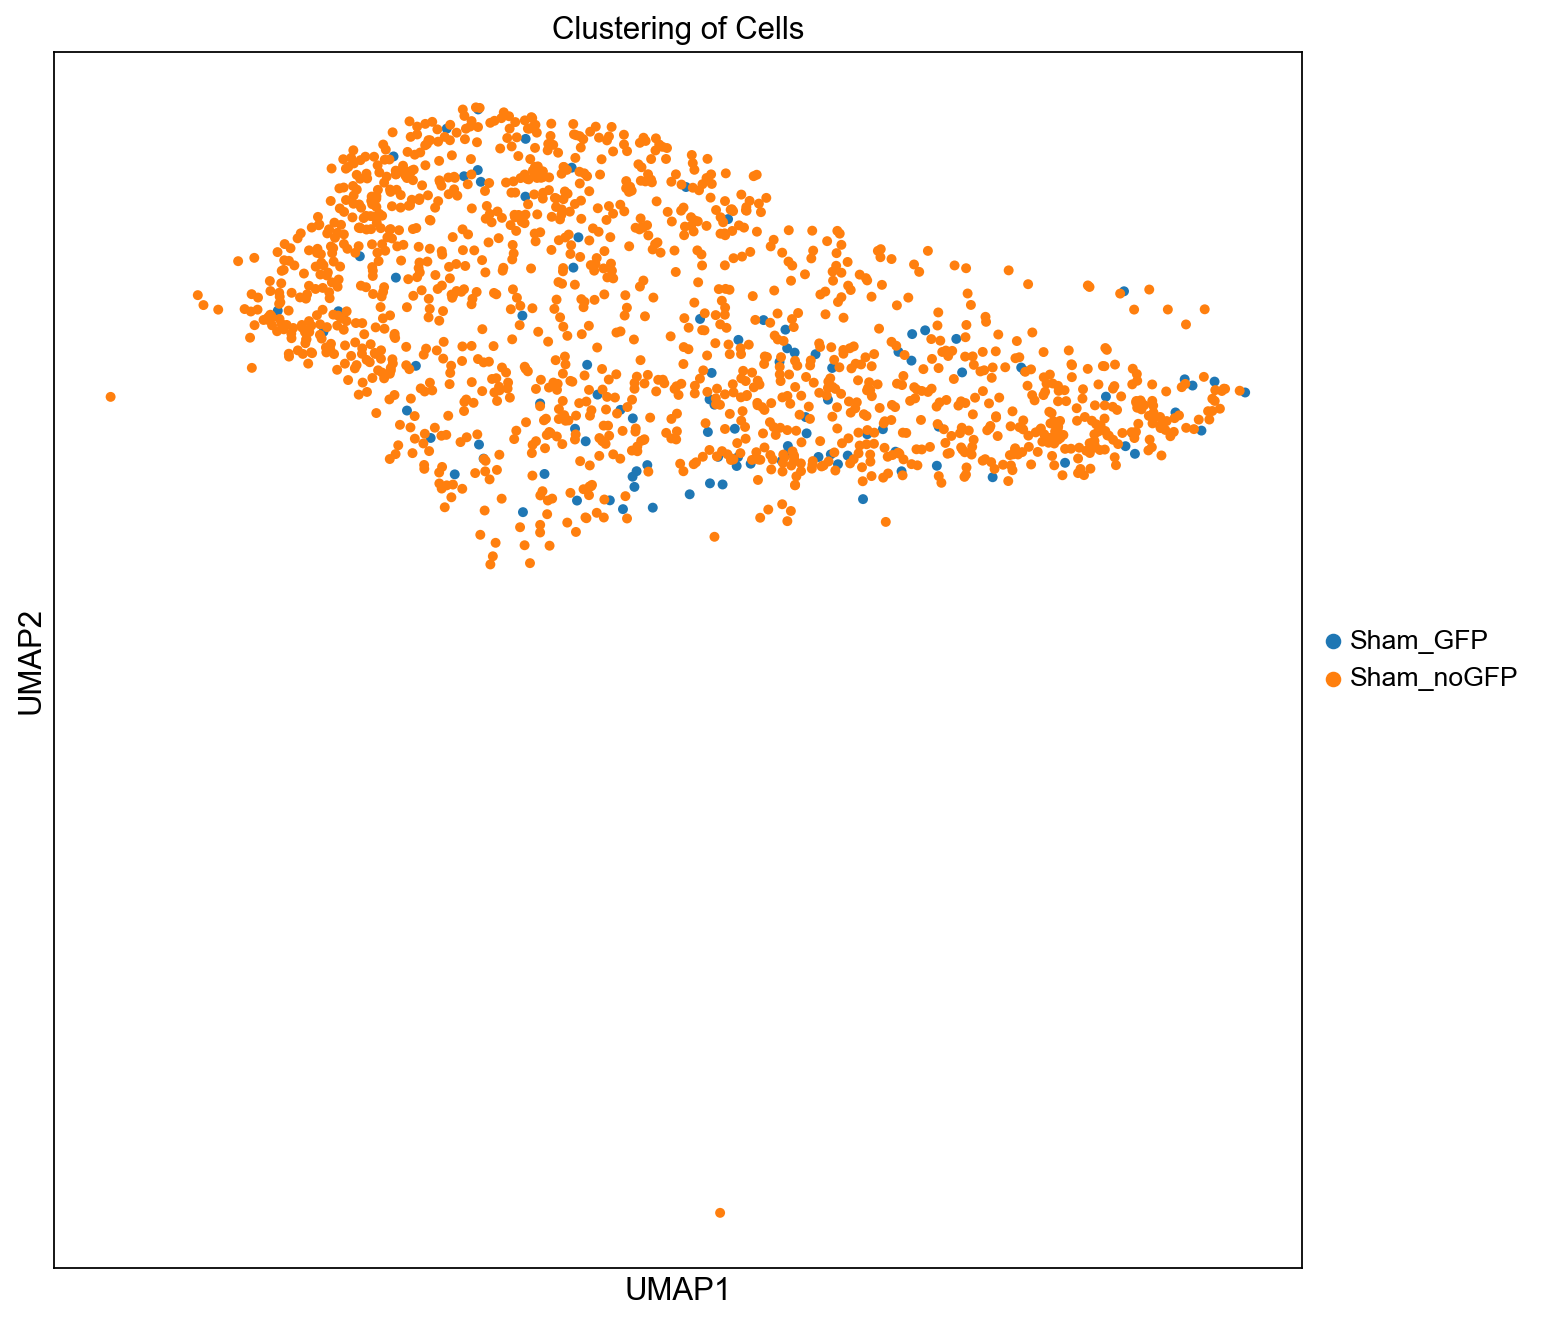

In [8]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(subset_adata2, color=['batch'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [13]:
def filter_anndata_by_gene(subset_adata2, gene, lim=1) -> "AnnData object":
    """filters anndata objects by gene
    
    Args: 
        adata: 'anndata object', that we are filtering
        gene: 'str', the gene we wish to filter by
    """
    ind = np.where(subset_adata2[:, [gene]].X.flatten() > lim)
    
    return subset_adata2[ind[0], :]

In [25]:
genes = ['Cdh5', 'Pecam1',  'Pax7'] 
limits = {
    "Cdh5": 0,
    "Pecam1": 0,
    "Pax7": 0,
    
}

[Starting umapping]


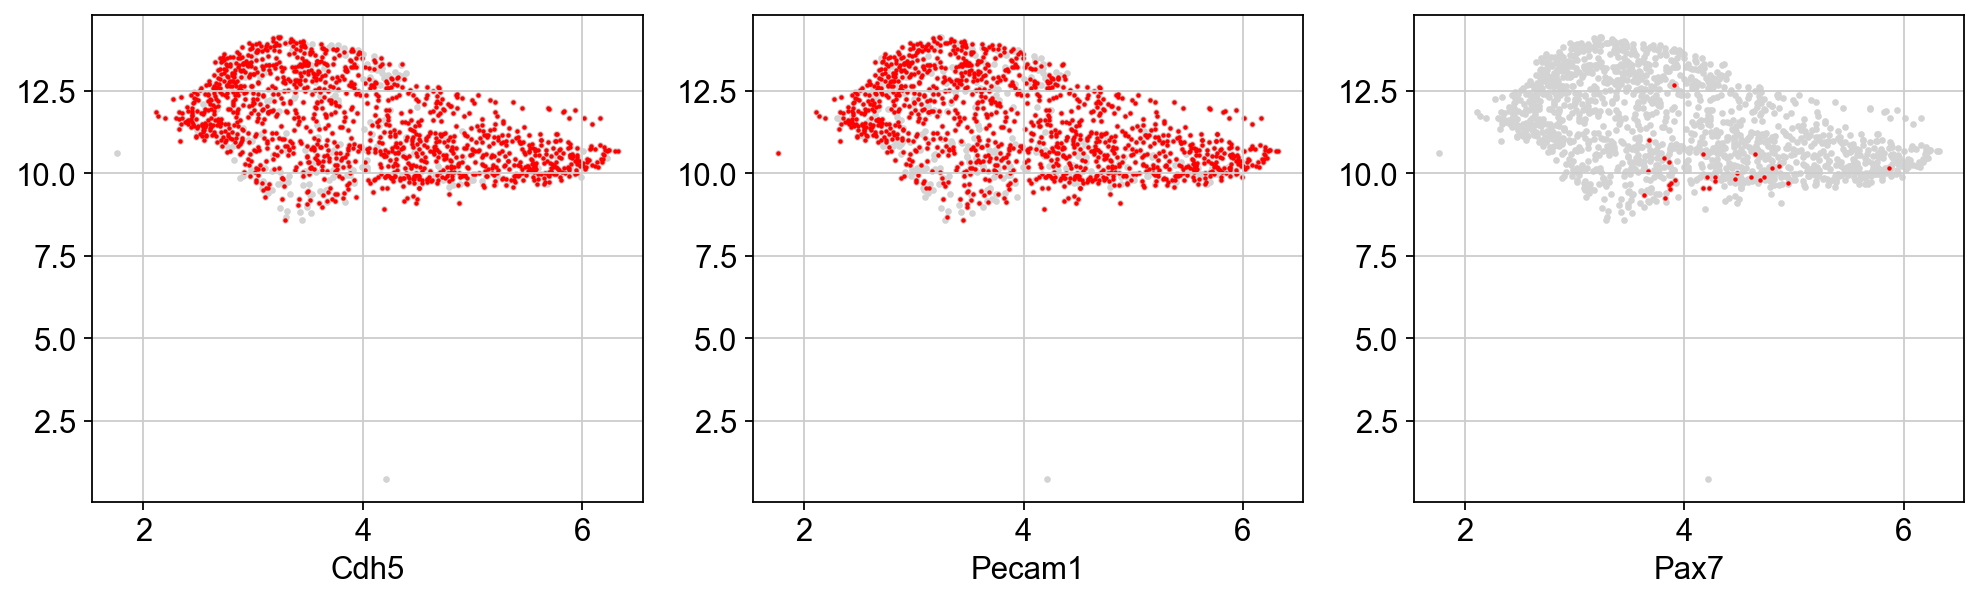

In [26]:
with rc_context({'figure.figsize': (15, 4)}):
    print('[Starting umapping]')
    fig, axs = pl.subplots(ncols=3, nrows=1)
    axs = axs.flatten()
    for i in range(len(axs)):
        tmp = filter_anndata_by_gene(subset_adata2, genes[i], lim=limits[genes[i]])
        
        axs[i].scatter(x=subset_adata2.obsm['X_umap'].T[0], y=subset_adata2.obsm['X_umap'].T[1], s=4, c="lightgrey")
        axs[i].scatter(x=tmp.obsm['X_umap'].T[0], y=tmp.obsm['X_umap'].T[1], s=1, c="red")
        axs[i].set_xlabel(genes[i])
        
    
    pl.savefig(os.path.join(sc.settings.figdir, "subsetviolinmarker_plot.png"))
    pl.show()
    # plt.close()

In [ ]:
subset_adata2.X = subset_adata2.X.toarray()

In [ ]:
pbs = []

for sample in subset_adata2.obs.batch.unique():
    samp_cell_subset = subset_adata2[subset_adata2.obs['batch'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts'].toarray() #make sure to use raw data
    
    
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 4) #change number here for number of replicates deisred
    
    for i, pseudo_rep in enumerate(indices):
    
        rep_adata = sc.AnnData(X = samp_cell_subset[indices[i]].X.sum(axis = 0, keepdims=True),
                               var = samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

In [ ]:
pb = sc.concat(pbs)

In [ ]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('counts_table Anti-inflammatory Macrophages 1.csv')

In [ ]:
cell_type = {
    "0": "Mature Skeletal muscle",
    "1": "Fibroadipogenic cells 1",
    "2": "Myo-Fibroblast",
    "3": "Monocytes/Macrophages",
    "4": "MuSCs and progenitors",
    "5": "MuSCs and Myoblasts",
    "6": "Anti-inflammatory Macrophages 1",
    "7": "Endothelial cells",
    "8": "Residence Macrophages/APC",
    "9": "Neutrophils",
    "10": "Anti-inflammatory Macrophages 2",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "B cells/Residence Macrophages/APC",
    "14": "T-lymphocytes and NKCs",
    "15": "Pericyte cells", 
    "16": "Tenocyte",
    "17": "Schwann cells",
    "18": "Lymphatic endothelial cells",
        
}

In [7]:
cell_type = {
    "0": "Mature Skeletal muscle",
    "1": "Fibroadipogenic cells",
    "2": "Fibroadipogenic cells",
    "3": "Immune cells",
    "4": "MuSCs and progenitors",
    "5": "MuSCs and progenitors",
    "6": "Immune cells",
    "7": "Endothelial cells",
    "8": "Immune cells",
    "9": "Immune cells",
    "10": "Immune cells",
    "11": "Fibroadipogenic cells",
    "12": "Proliferation",
    "13": "Immune cells",
    "14": "Immune cells",
    "15": "Pericyte cells", 
    "16": "Tenocyte",
    "17": "Schwann cells",
    "18": "Lymphatic endothelial cells",
        
}

In [8]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

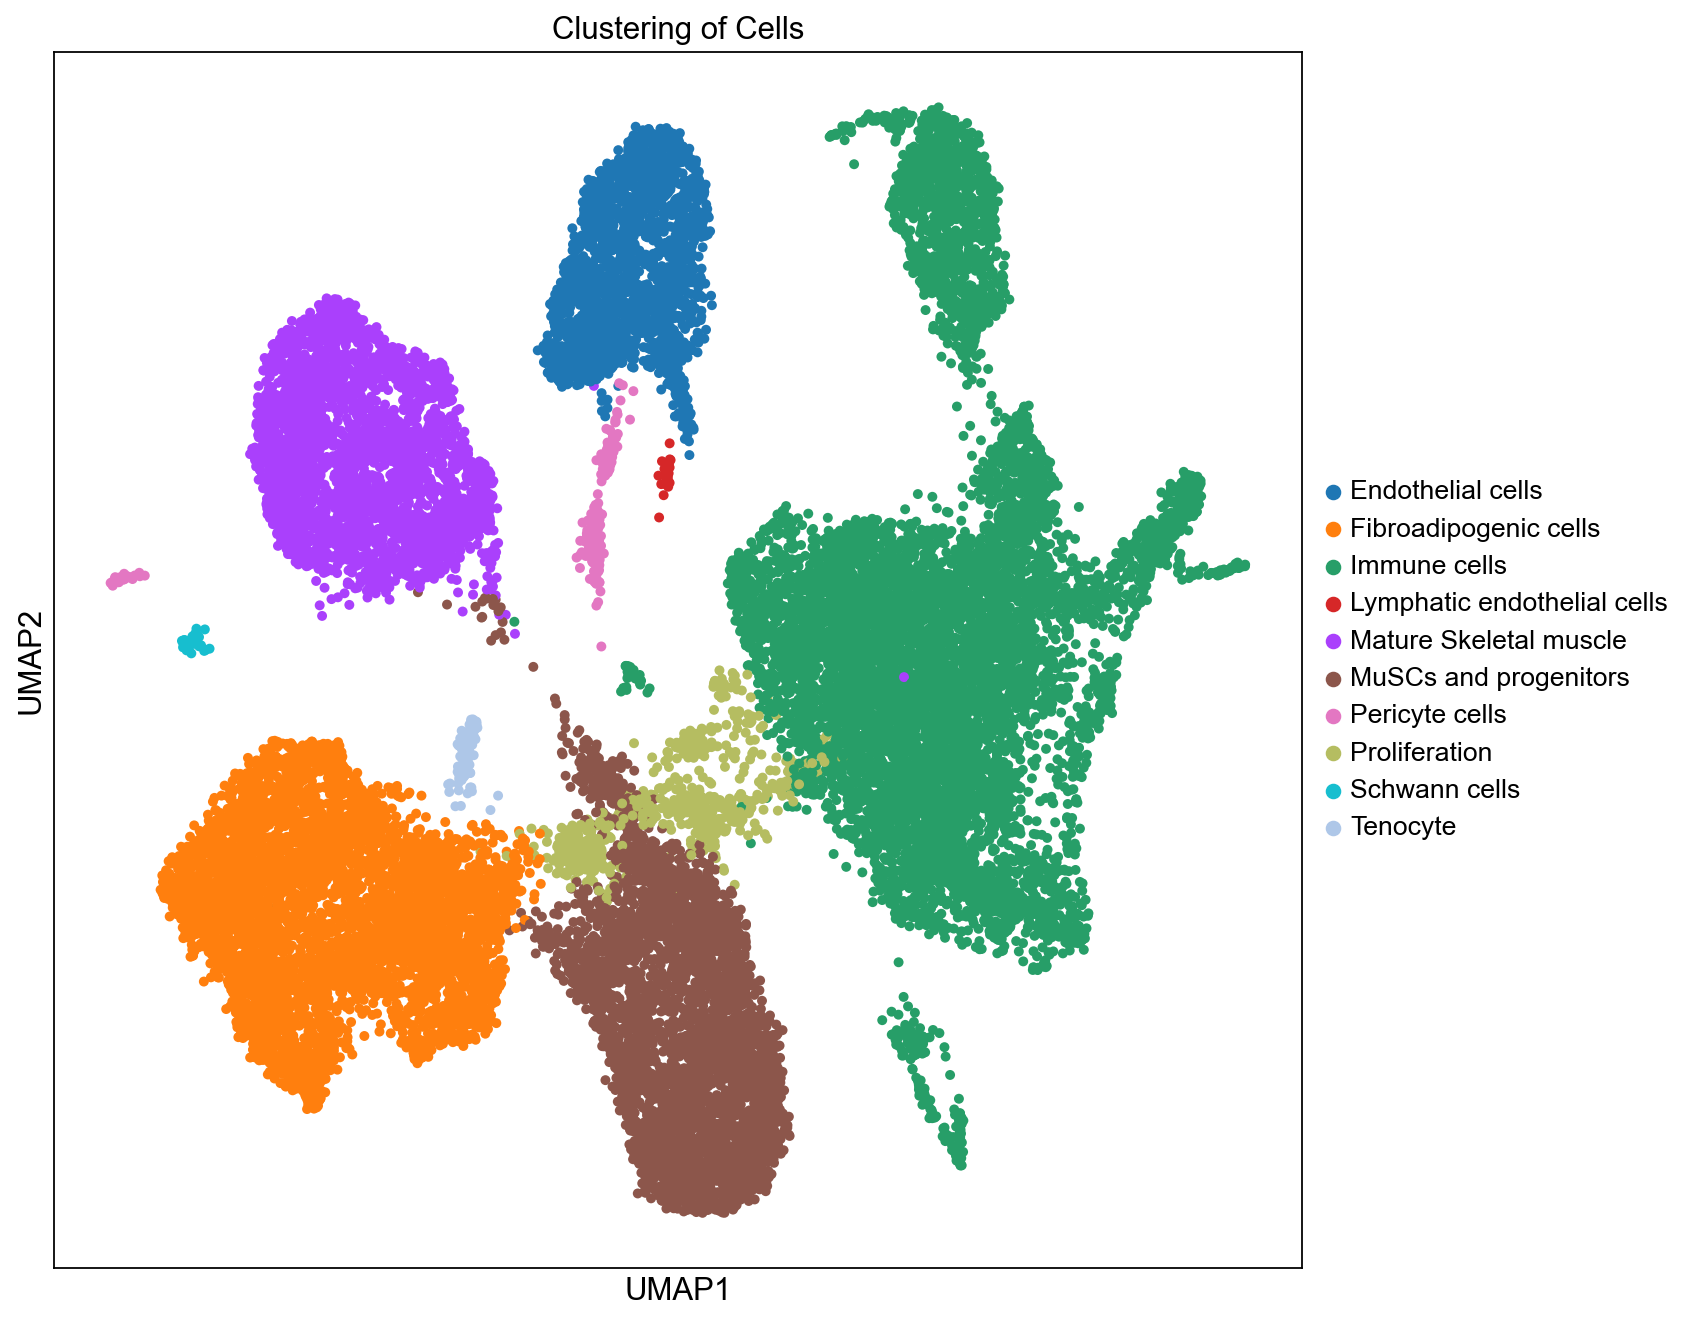

In [9]:
adata.obs['cell type'] = adata.obs.leiden.map(cell_type)

# Customize UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot merged new clus{img_tag}.png')
pl.show()

In [8]:
"Mature Skeletal muscle": '#ff7f0e',
    "Fibroadipogenic cells 1": '#9edae5',
    "Myo-Fibroblast": '#9467bd',
    "Monocytes/Macrophages": '#ffbb78',
    "MuSCs and progenitors": '#98df8a',
    "MuSCs and Myoblasts": '#2ca02c',
    "Anti-inflammatory Macrophages 1": '#e377c2',
    "Endothelial cells": '#d62728',
    "Residence Macrophages/APC": '#17becf',
    "Neutrophils": '#c5b0d5',
    "Anti-inflammatory Macrophages 2": '#1f77b4',
    "Fibroadipogenic cells 2": '#8c564b',
    "Proliferation":  '#ff9896',
    "B cells/Residence Macrophages/APC": '#dbdb8d',
    "T-lymphocytes and NKCs": '#c7c7c7',
    "Pericyte cells": '#bcbd22',
    "Tenocyte":  '#f7b6d2',
    "Schwann cells":  '#c49c94',
    "Lymphatic endothelial cells": '#7f7f7f',

SyntaxError: invalid syntax (3796845676.py, line 1)

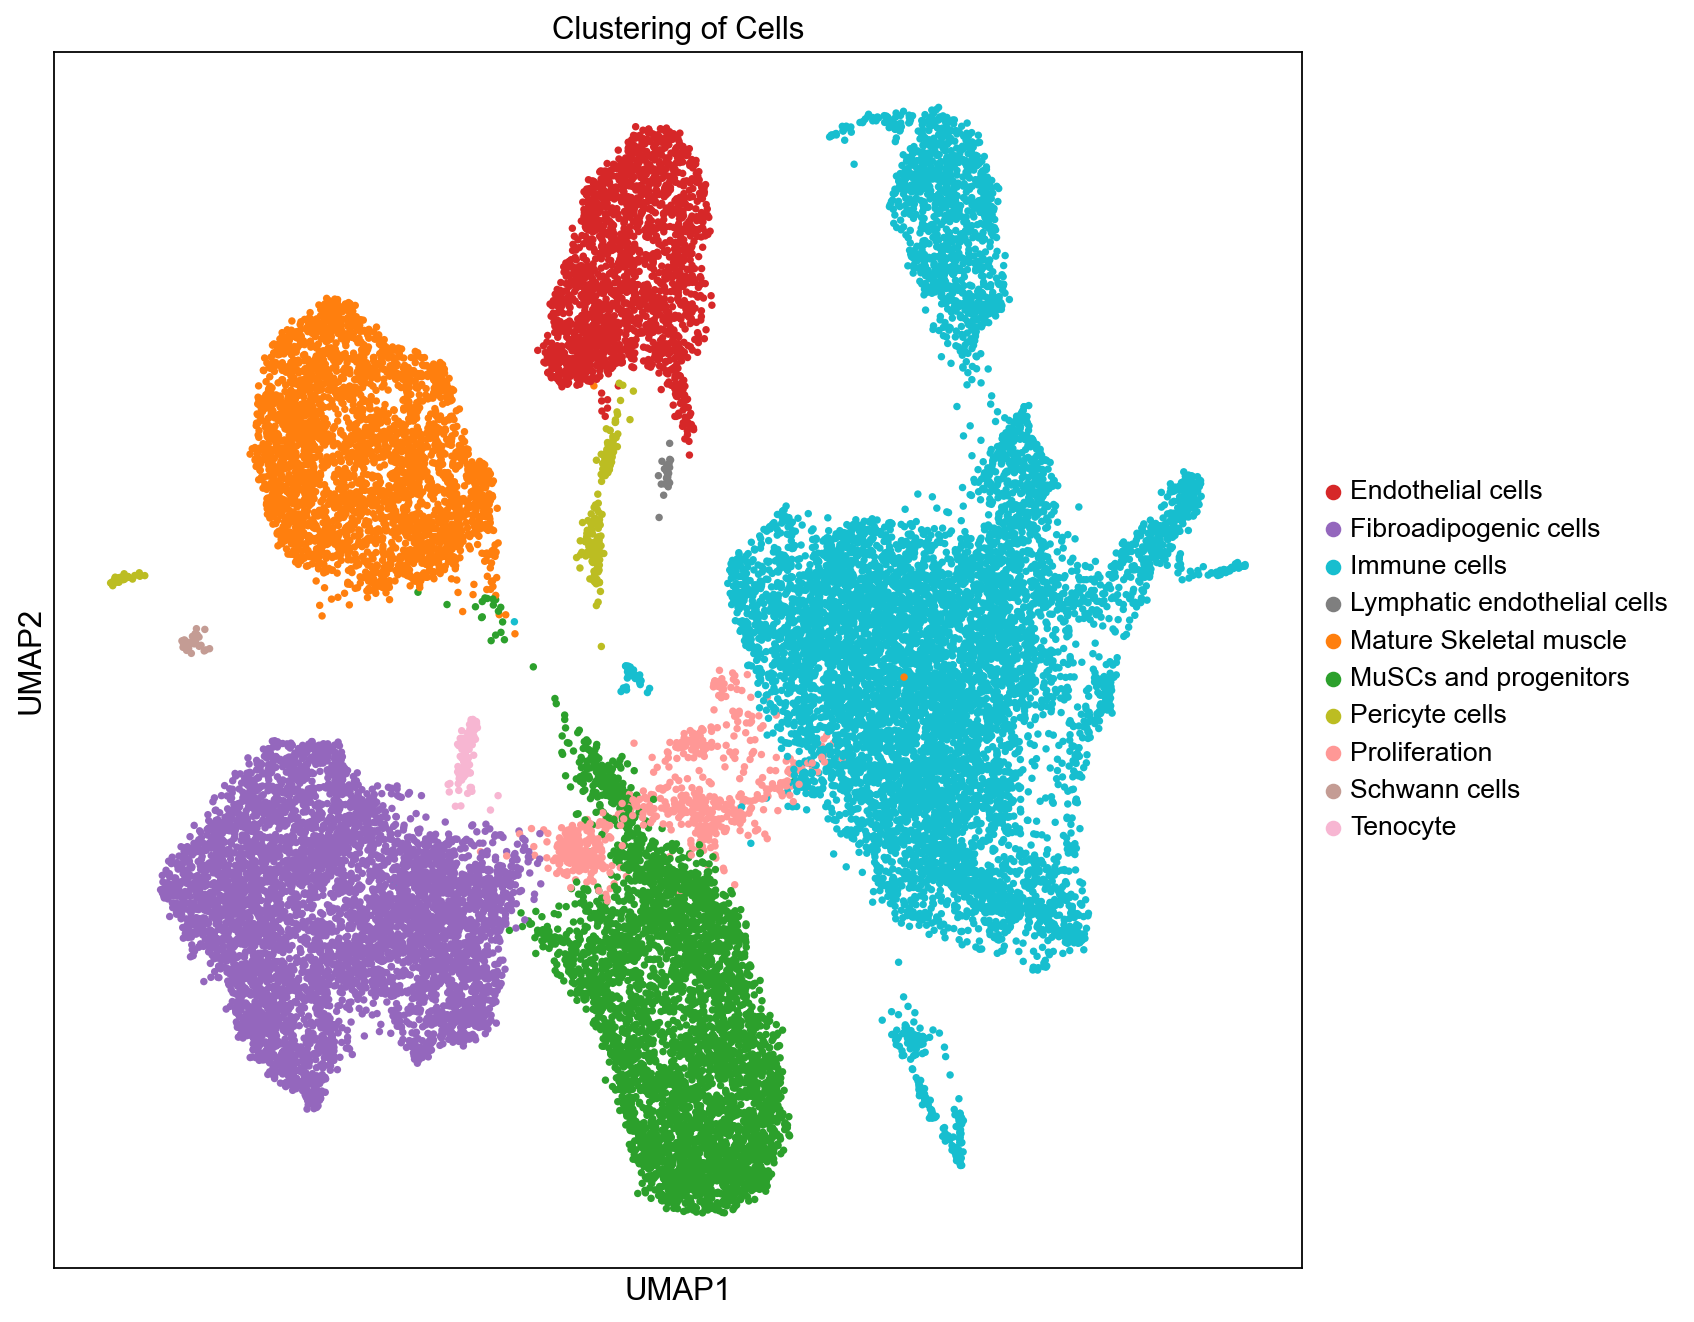

In [10]:
# Set figure parameters
celltypePalette = {
    "Mature Skeletal muscle": '#ff7f0e',
    "MuSCs and progenitors": '#2ca02c',
    "Fibroadipogenic cells":'#9467bd',
    "Immune cells":'#17becf',
    "Endothelial cells": '#d62728',
    "Proliferation":  '#ff9896',
    "Pericyte cells": '#bcbd22',
    "Tenocyte": '#f7b6d2',
    "Lymphatic endothelial cells": '#7f7f7f',
    "Schwann cells": '#c49c94',
    
}


# Set figure parameters
sc.set_figure_params(figsize=(10, 10))

# Plot UMAP with specified color palette for cell types
sc.pl.umap(adata, color='cell type', palette=celltypePalette, legend_fontsize=12, legend_fontoutline=2, frameon=True, size=45, title='Clustering of Cells', save='umap_plot_color.png')
pl.show()

In [11]:
#COUNTING CELLS


adata.obs['batch'].unique().tolist()
def map_condition(x):
    if 'Sham_GFP' in x:
        return 'Sham_GFP'
    elif 'Sham_noGFP' in x:
        return 'Sham_noGFP'
    elif 'OV_GFP' in x:
        return 'OV_GFP'
    else:
        return 'OV_noGFP'

adata.obs['condition'] = adata.obs.batch.map(map_condition)
adata.obs


n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAGTTCCGTTC-1-Sham_GFP               4116       15405.0            653.0   
AAACCCATCCATACTT-1-Sham_GFP               2850       10036.0            417.0   
AAACCCATCCCACAGG-1-Sham_GFP               2414        7717.0            212.0   
AAACGAACATACCACA-1-Sham_GFP               2668        9444.0            274.0   
AAACGAAGTCGTGGTC-1-Sham_GFP               2716        9703.0            588.0   
...                                        ...           ...              ...   
TTTGTTGAGATGGCGT-1-OV_noGFP               1873        4125.0            218.0   
TTTGTTGCACCGAATT-1-OV_noGFP               4590       23666.0            426.0   
TTTGTTGCATCCTTCG-1-OV_noGFP               3014       10031.0            198.0   
TTTGTTGGTCAGGAGT-1-OV_noGFP               1780        4392.0             67.0   
TTTGTTGGTTGTGCAT-1-OV_noGFP               2986        8995.0            427.0   

                             pct_counts_mt     batch  n_genes leiden  \
AAACCCAGTTCCGTTC-1-Sham_GFP       4.238883  Sham_GFP     4116      7   
AAACCCATCCATACTT-1-Sham_GFP       4.155042  Sham_GFP     2850      5   
AAACCCATCCCACAGG-1-Sham_GFP       2.747182  Sham_GFP     2413      5   
AAACGAACATACCACA-1-Sham_GFP       2.901313  Sham_GFP     2668      5   
AAACGAAGTCGTGGTC-1-Sham_GFP       6.059981  Sham_GFP     2716      5   
...                                    ...       ...      ...    ...   
TTTGTTGAGATGGCGT-1-OV_noGFP       5.284848  OV_noGFP     1873      3   
TTTGTTGCACCGAATT-1-OV_noGFP       1.800051  OV_noGFP     4590      6   
TTTGTTGCATCCTTCG-1-OV_noGFP       1.973881  OV_noGFP     3014      3   
TTTGTTGGTCAGGAGT-1-OV_noGFP       1.525501  OV_noGFP     1780      8   
TTTGTTGGTTGTGCAT-1-OV_noGFP       4.747082  OV_noGFP     2986      3   

                                         cell type condition  
AAACCCAGTTCCGTTC-1-Sham_GFP      Endothelial cells  Sham_GFP  
AAACCCATCCATACTT-1-Sham_GFP  MuSCs and progenitors  Sham_GFP  
AAACCCATCCCACAGG-1-Sham_GFP  MuSCs and progenitors  Sham_GFP  
AAACGAACATACCACA-1-Sham_GFP  MuSCs and progenitors  Sham_GFP  
AAACGAAGTCGTGGTC-1-Sham_GFP  MuSCs and progenitors  Sham_GFP  
...                                            ...       ...  
TTTGTTGAGATGGCGT-1-OV_noGFP           Immune cells  OV_noGFP  
TTTGTTGCACCGAATT-1-OV_noGFP           Immune cells  OV_noGFP  
TTTGTTGCATCCTTCG-1-OV_noGFP           Immune cells  OV_noGFP  
TTTGTTGGTCAGGAGT-1-OV_noGFP           Immune cells  OV_noGFP  
TTTGTTGGTTGTGCAT-1-OV_noGFP           Immune cells  OV_noGFP  

[23914 rows x 9 columns]

In [23]:
num_tot_cells = adata.obs.groupby(['batch']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.n_genes))
num_tot_cells

{'Sham_GFP': 2592, 'Sham_noGFP': 8061, 'OV_GFP': 4735, 'OV_noGFP': 8526}

In [24]:
cell_type_counts = adata.obs.groupby(['batch', 'condition', 'cell type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis = 1) > 0].reset_index()

cell_type_counts

batch   condition                    cell type  n_genes_by_counts  \
0     Sham_GFP    Sham_GFP            Endothelial cells                103   
1     Sham_GFP    Sham_GFP        Fibroadipogenic cells                 76   
2     Sham_GFP    Sham_GFP                 Immune cells                 92   
3     Sham_GFP    Sham_GFP  Lymphatic endothelial cells                  3   
4     Sham_GFP    Sham_GFP       Mature Skeletal muscle                 41   
5     Sham_GFP    Sham_GFP        MuSCs and progenitors               2239   
6     Sham_GFP    Sham_GFP               Pericyte cells                  9   
7     Sham_GFP    Sham_GFP                Proliferation                 16   
8     Sham_GFP    Sham_GFP                Schwann cells                  4   
9     Sham_GFP    Sham_GFP                     Tenocyte                  9   
10  Sham_noGFP  Sham_noGFP            Endothelial cells               1399   
11  Sham_noGFP  Sham_noGFP        Fibroadipogenic cells               3096   
12  Sham_noGFP  Sham_noGFP                 Immune cells               1129   
13  Sham_noGFP  Sham_noGFP  Lymphatic endothelial cells                 18   
14  Sham_noGFP  Sham_noGFP       Mature Skeletal muscle               2154   
15  Sham_noGFP  Sham_noGFP        MuSCs and progenitors                 32   
16  Sham_noGFP  Sham_noGFP               Pericyte cells                125   
17  Sham_noGFP  Sham_noGFP                Proliferation                 23   
18  Sham_noGFP  Sham_noGFP                Schwann cells                 19   
19  Sham_noGFP  Sham_noGFP                     Tenocyte                 66   
20      OV_GFP      OV_GFP            Endothelial cells                 38   
21      OV_GFP      OV_GFP        Fibroadipogenic cells                 66   
22      OV_GFP      OV_GFP                 Immune cells               2501   
23      OV_GFP      OV_GFP       Mature Skeletal muscle                 88   
24      OV_GFP      OV_GFP        MuSCs and progenitors               1643   
25      OV_GFP      OV_GFP               Pericyte cells                 10   
26      OV_GFP      OV_GFP                Proliferation                384   
27      OV_GFP      OV_GFP                Schwann cells                  1   
28      OV_GFP      OV_GFP                     Tenocyte                  4   
29    OV_noGFP    OV_noGFP            Endothelial cells                380   
30    OV_noGFP    OV_noGFP        Fibroadipogenic cells               2099   
31    OV_noGFP    OV_noGFP                 Immune cells               4847   
32    OV_noGFP    OV_noGFP  Lymphatic endothelial cells                  7   
33    OV_noGFP    OV_noGFP       Mature Skeletal muscle                806   
34    OV_noGFP    OV_noGFP        MuSCs and progenitors                 29   
35    OV_noGFP    OV_noGFP               Pericyte cells                 64   
36    OV_noGFP    OV_noGFP                Proliferation                257   
37    OV_noGFP    OV_noGFP                Schwann cells                 11   
38    OV_noGFP    OV_noGFP                     Tenocyte                 26   

    total_counts  total_counts_mt  pct_counts_mt  n_genes  leiden  
0            103              103            103      103     103  
1             76               76             76       76      76  
2             92               92             92       92      92  
3              3                3              3        3       3  
4             41               41             41       41      41  
5           2239             2239           2239     2239    2239  
6              9                9              9        9       9  
7             16               16             16       16      16  
8              4                4              4        4       4  
9              9                9              9        9       9  
10          1399             1399           1399     1399    1399  
11          3096             3096           3096     3096    3096  
12  

In [25]:
cell_type_counts['total_cells'] = cell_type_counts.batch.map(num_tot_cells).astype(int)

cell_type_counts['frequency'] = cell_type_counts.n_genes / cell_type_counts.total_cells

cell_type_counts

batch   condition                    cell type  n_genes_by_counts  \
0     Sham_GFP    Sham_GFP            Endothelial cells                103   
1     Sham_GFP    Sham_GFP        Fibroadipogenic cells                 76   
2     Sham_GFP    Sham_GFP                 Immune cells                 92   
3     Sham_GFP    Sham_GFP  Lymphatic endothelial cells                  3   
4     Sham_GFP    Sham_GFP       Mature Skeletal muscle                 41   
5     Sham_GFP    Sham_GFP        MuSCs and progenitors               2239   
6     Sham_GFP    Sham_GFP               Pericyte cells                  9   
7     Sham_GFP    Sham_GFP                Proliferation                 16   
8     Sham_GFP    Sham_GFP                Schwann cells                  4   
9     Sham_GFP    Sham_GFP                     Tenocyte                  9   
10  Sham_noGFP  Sham_noGFP            Endothelial cells               1399   
11  Sham_noGFP  Sham_noGFP        Fibroadipogenic cells               3096   
12  Sham_noGFP  Sham_noGFP                 Immune cells               1129   
13  Sham_noGFP  Sham_noGFP  Lymphatic endothelial cells                 18   
14  Sham_noGFP  Sham_noGFP       Mature Skeletal muscle               2154   
15  Sham_noGFP  Sham_noGFP        MuSCs and progenitors                 32   
16  Sham_noGFP  Sham_noGFP               Pericyte cells                125   
17  Sham_noGFP  Sham_noGFP                Proliferation                 23   
18  Sham_noGFP  Sham_noGFP                Schwann cells                 19   
19  Sham_noGFP  Sham_noGFP                     Tenocyte                 66   
20      OV_GFP      OV_GFP            Endothelial cells                 38   
21      OV_GFP      OV_GFP        Fibroadipogenic cells                 66   
22      OV_GFP      OV_GFP                 Immune cells               2501   
23      OV_GFP      OV_GFP       Mature Skeletal muscle                 88   
24      OV_GFP      OV_GFP        MuSCs and progenitors               1643   
25      OV_GFP      OV_GFP               Pericyte cells                 10   
26      OV_GFP      OV_GFP                Proliferation                384   
27      OV_GFP      OV_GFP                Schwann cells                  1   
28      OV_GFP      OV_GFP                     Tenocyte                  4   
29    OV_noGFP    OV_noGFP            Endothelial cells                380   
30    OV_noGFP    OV_noGFP        Fibroadipogenic cells               2099   
31    OV_noGFP    OV_noGFP                 Immune cells               4847   
32    OV_noGFP    OV_noGFP  Lymphatic endothelial cells                  7   
33    OV_noGFP    OV_noGFP       Mature Skeletal muscle                806   
34    OV_noGFP    OV_noGFP        MuSCs and progenitors                 29   
35    OV_noGFP    OV_noGFP               Pericyte cells                 64   
36    OV_noGFP    OV_noGFP                Proliferation                257   
37    OV_noGFP    OV_noGFP                Schwann cells                 11   
38    OV_noGFP    OV_noGFP                     Tenocyte                 26   

    total_counts  total_counts_mt  pct_counts_mt  n_genes  leiden  \
0            103              103            103      103     103   
1             76               76             76       76      76   
2             92               92             92       92      92   
3              3                3              3        3       3   
4             41               41             41       41      41   
5           2239             2239           2239     2239    2239   
6              9                9              9        9       9   
7             16               16             16       16      16   
8              4                4              4        4       4   
9              9                9              9        9       9   
10          1399             1399           1399     1399    1399   
11          3096             3096           3096     3096   

<Figure size 960x640 with 0 Axes>

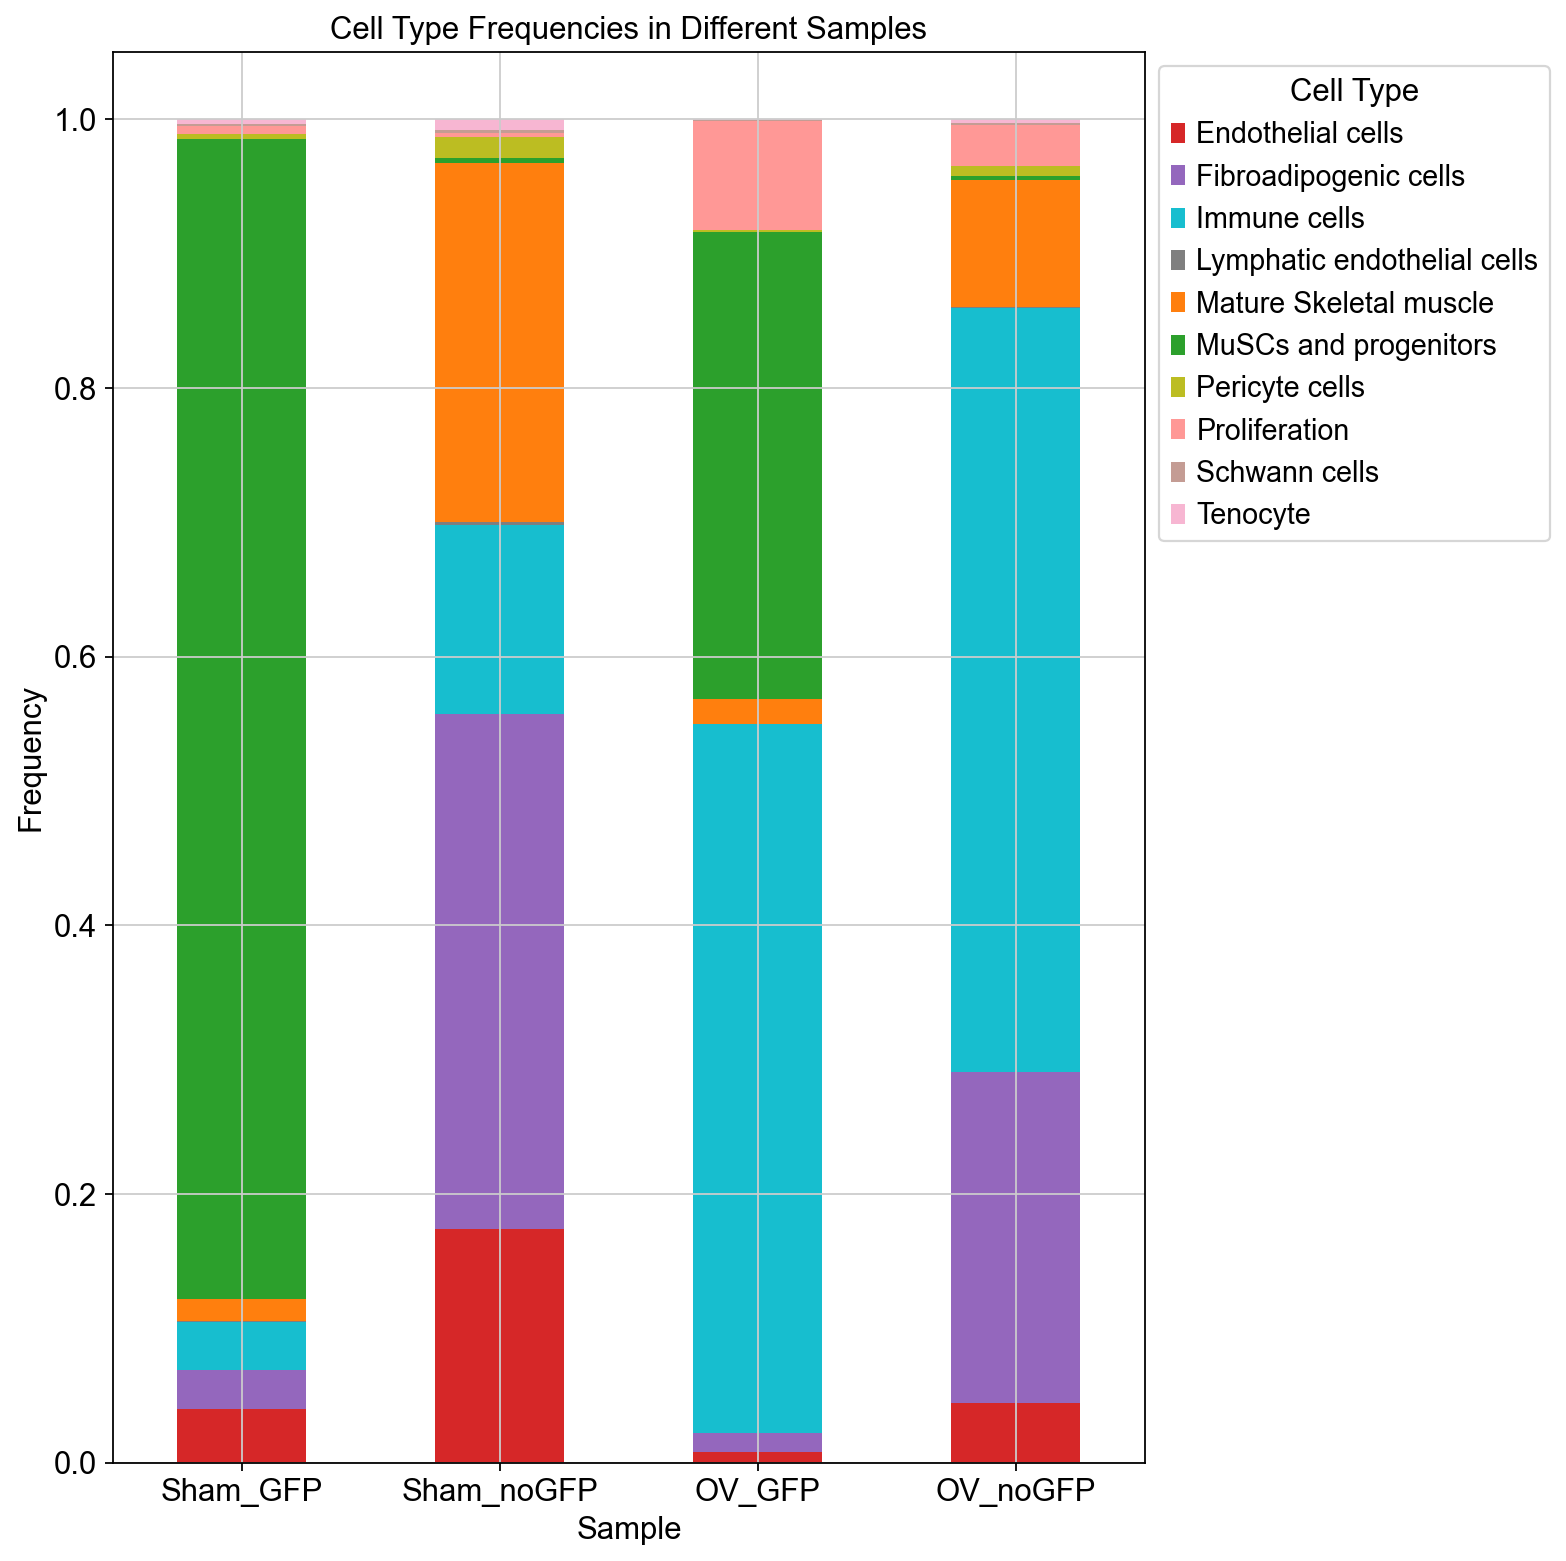

In [29]:
# Your color palette
celltypePalette = {
    "Mature Skeletal muscle": '#ff7f0e',
    "MuSCs and progenitors": '#2ca02c',
    "Fibroadipogenic cells":'#9467bd',
    "Immune cells":'#17becf',
    "Endothelial cells": '#d62728',
    "Proliferation":  '#ff9896',
    "Pericyte cells": '#bcbd22',
    "Tenocyte": '#f7b6d2',
    "Lymphatic endothelial cells": '#7f7f7f',
    "Schwann cells": '#c49c94',
    
}

# Filter cell_type_counts to include only relevant columns
cell_type_counts = cell_type_counts[['batch', 'condition', 'cell type', 'frequency']]

# Set the figure size
pl.figure(figsize=(12, 8))

# Define the order of samples in the plot
sample_order = ['Sham_GFP', 'Sham_noGFP', 'OV_GFP', 'OV_noGFP']

# Filter data for the specified samples
filtered_data = cell_type_counts[cell_type_counts['condition'].isin(sample_order)]

# Pivot the DataFrame for a stacked bar plot
stacked_data = filtered_data.pivot_table(index='condition', columns='cell type', values='frequency', fill_value=0)

# Create a stacked bar plot with the specified color palette
stacked_data.plot(kind='bar', stacked=True, color=[celltypePalette[col] for col in stacked_data.columns])

# Set plot properties
pl.xticks(rotation=0)  # Keep the x-axis labels horizontal
pl.xlabel('Sample')
pl.ylabel('Frequency')
pl.legend(title='Cell Type', bbox_to_anchor=(1, 1))  # Move the legend outside the plot area
pl.title('Cell Type Frequencies in Different Samples')
pl.tight_layout()
pl.savefig('bar4_plot.png')
# Show the plot
pl.show()

In [30]:
# Calculate percentages for each cell type across groups
percentage_data = stacked_data.div(stacked_data.sum(axis=1), axis=0) * 100
# Export percentages to a CSV file
percentage_data.to_csv('cell_type_percentages merged with colour new.csv', index=True)


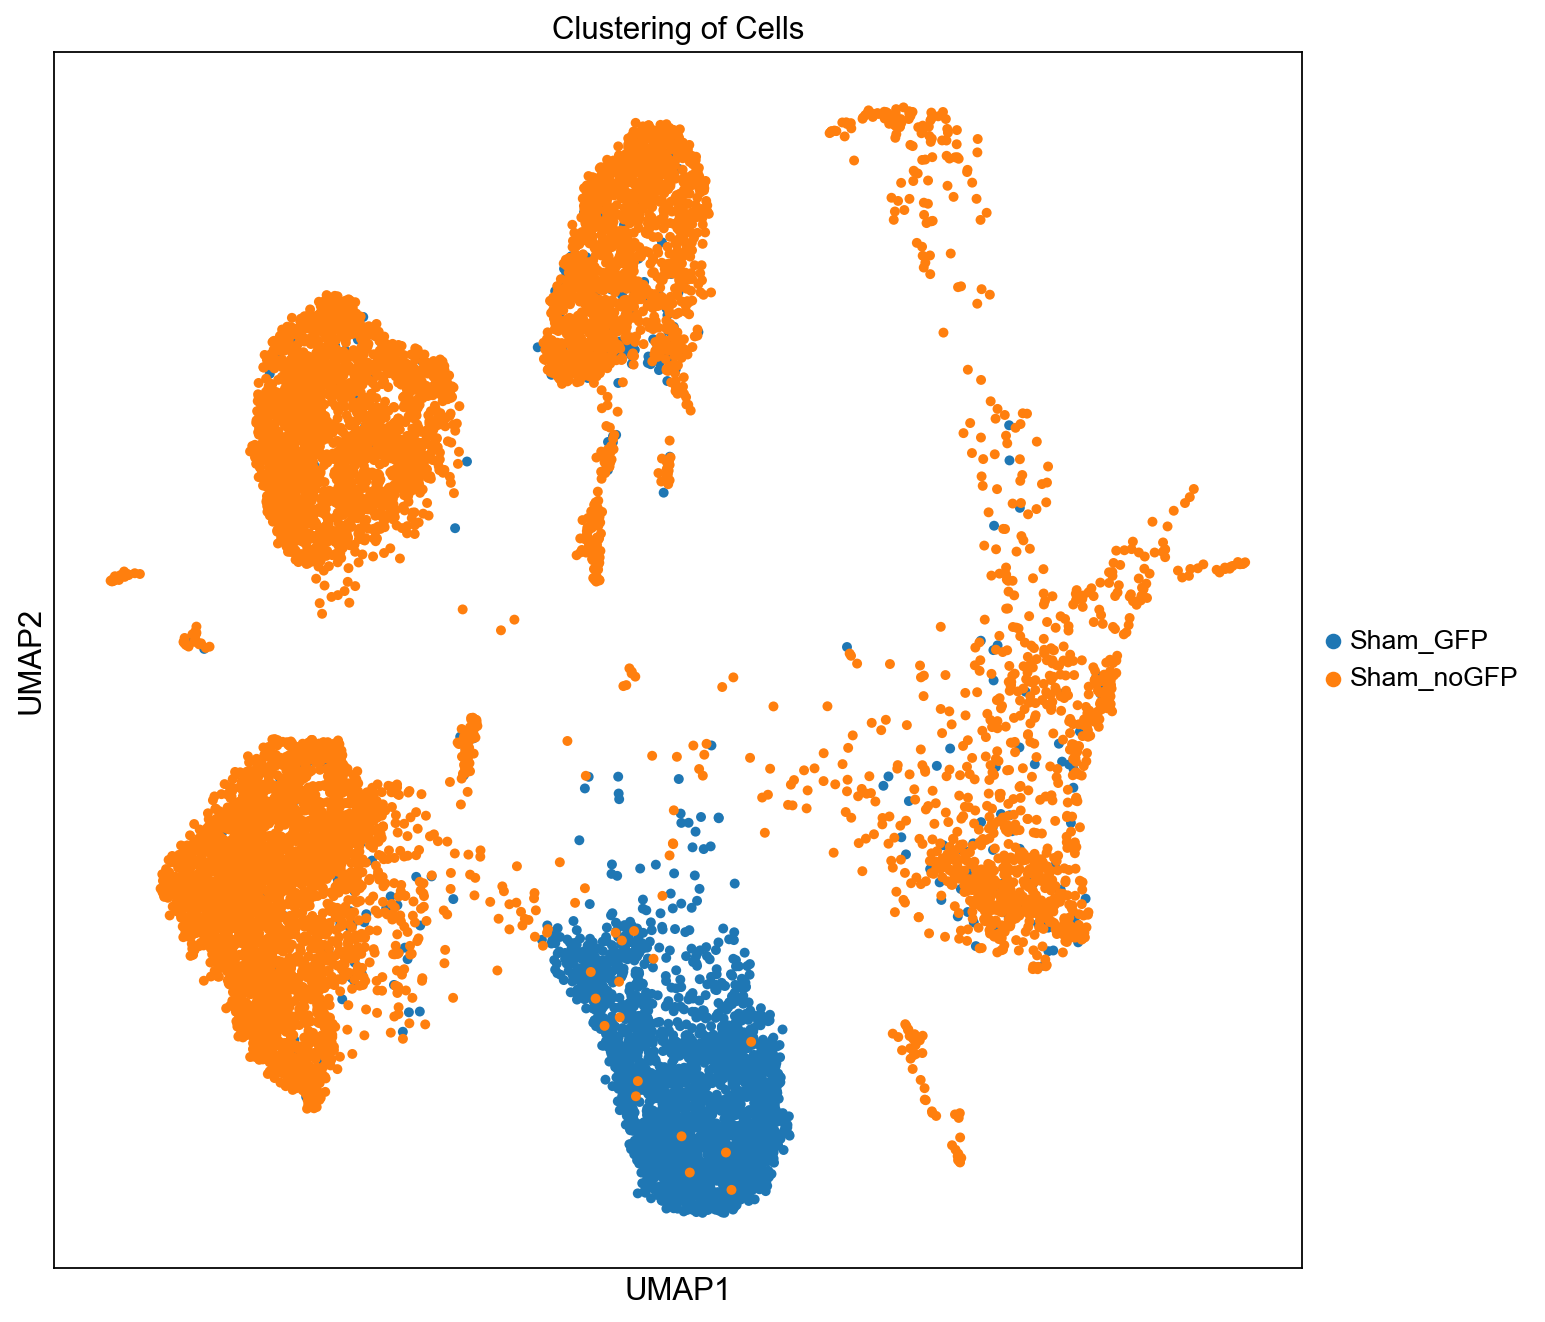

In [13]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(subset_adata, color=['batch'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [ ]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['OV_GFP', 'OV_noGFP'])]

# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]


In [20]:
subset_adata = adata[adata.obs['batch'].isin(['OV_GFP'])]


In [21]:
subset_adata.write_h5ad('OV-GFP.h5ad')

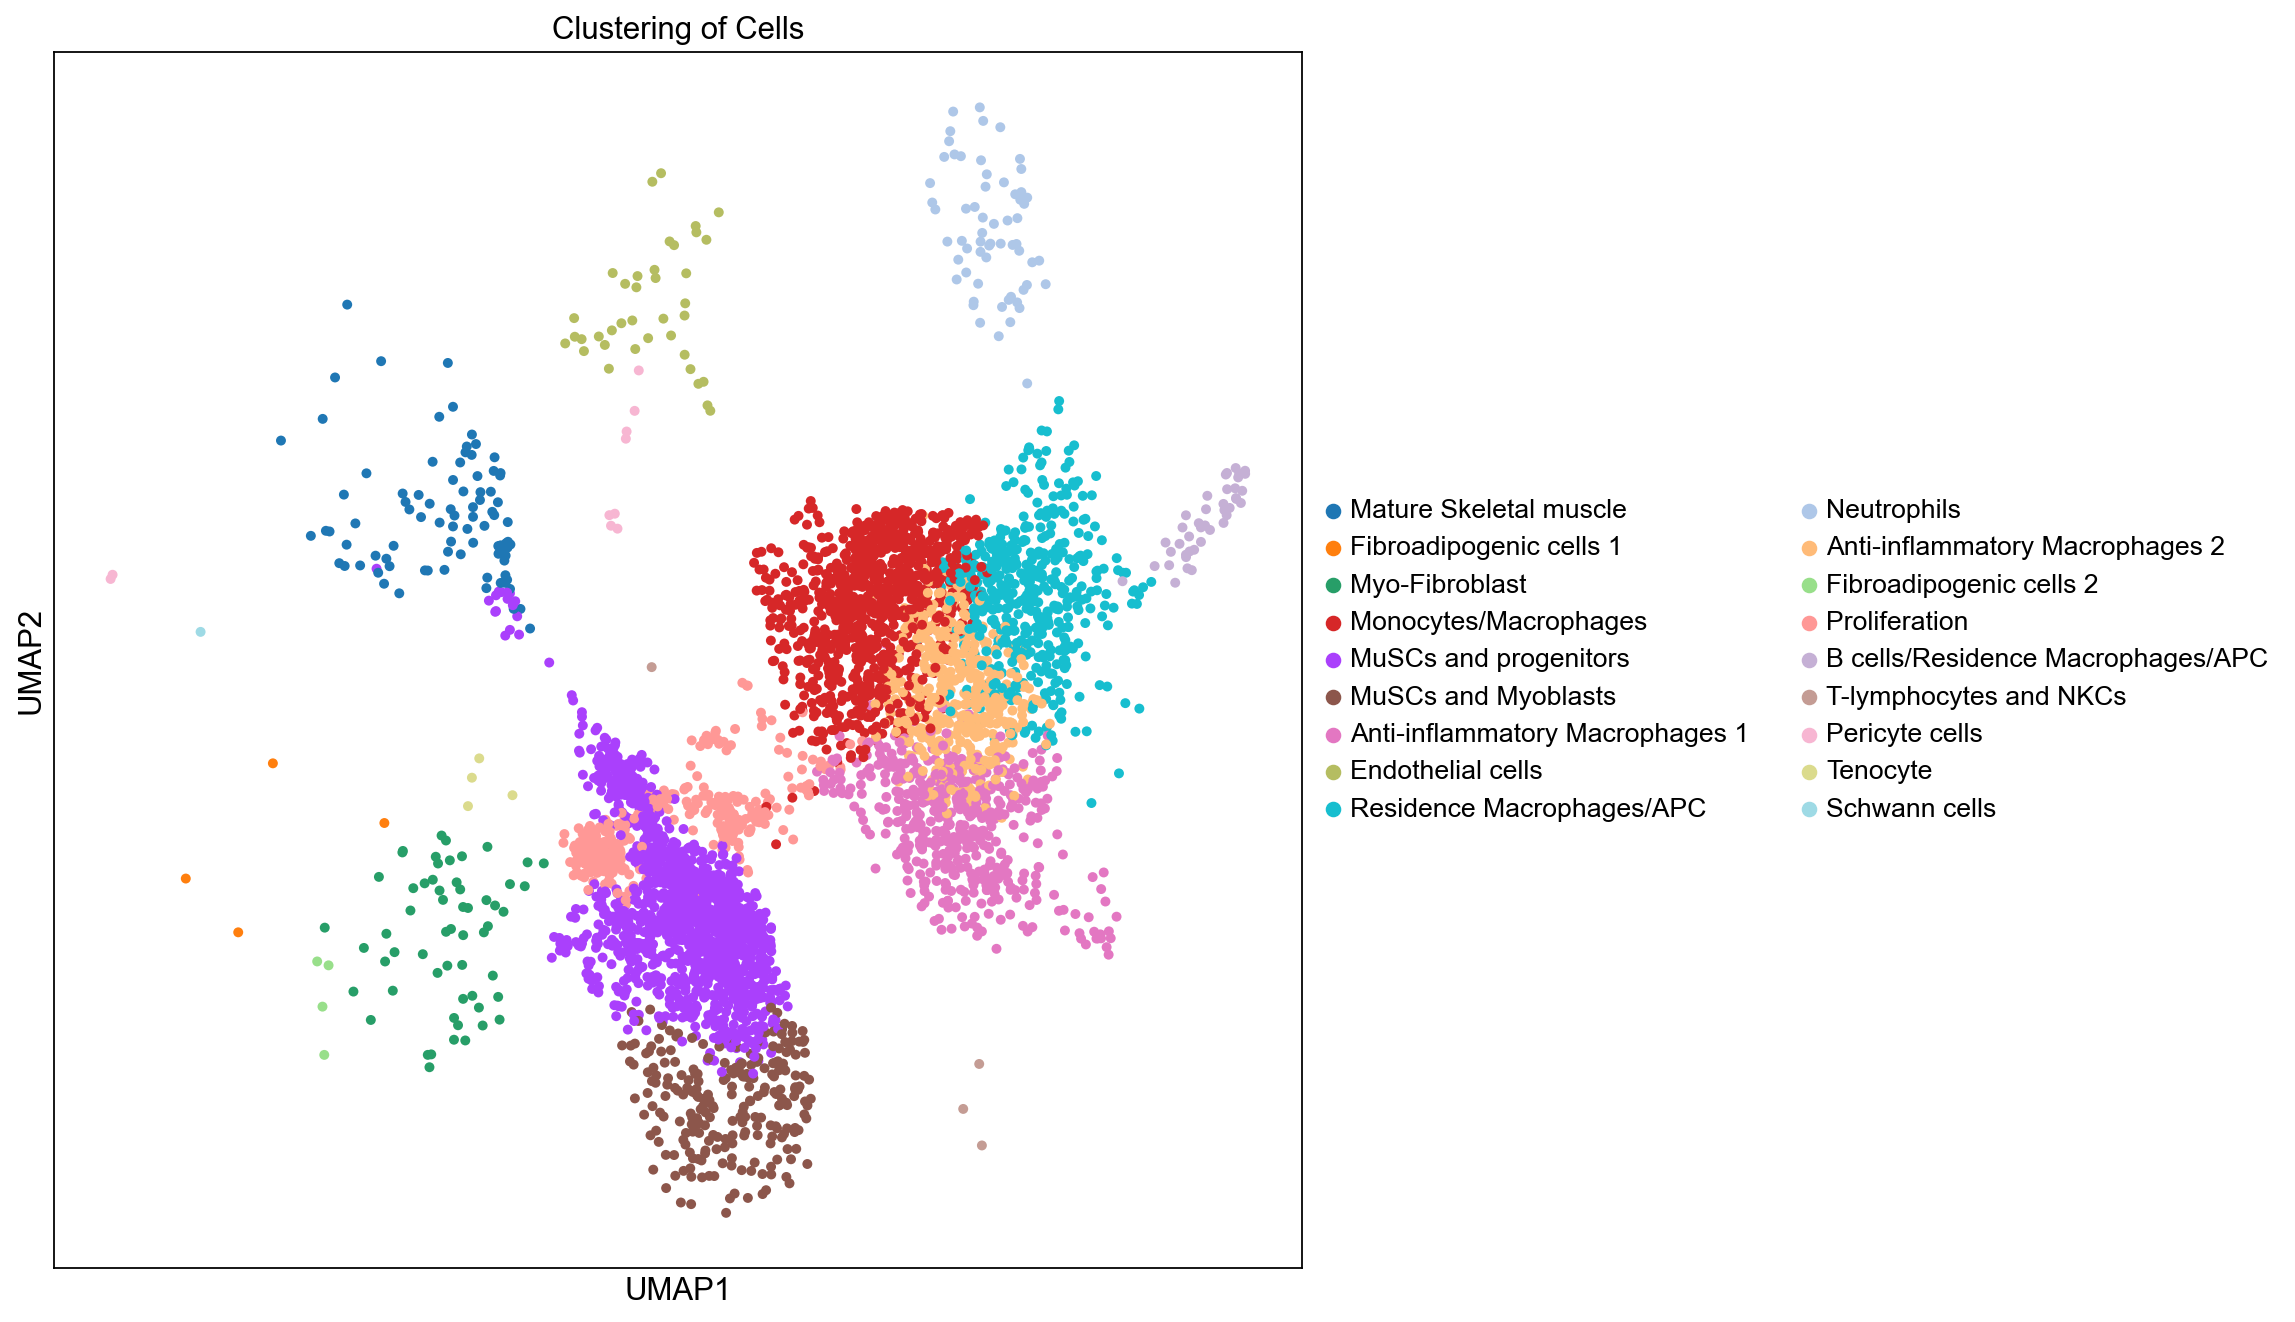

In [22]:
#UMAP plot
sc.set_figure_params(figsize=(10, 10))
img_tag = "_color"  # Specify your image tag here
sc.pl.umap(subset_adata, color=['cell type'],  legend_fontsize=12, legend_fontoutline=2, frameon=True, size=80, title='Clustering of Cells', save=f'umap_plot{img_tag}.png')
pl.show()

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
"""
from sklearn.neighbors import KernelDensity
import pylab as p
import scipy.interpolate as interpolate
"""
import warnings
warnings.filterwarnings('ignore')
%qtconsole

In [ ]:
def test_log1p(x): 
    return np.subtract(np.power(np.e, x), 1)

def test_log1p_apply(array):
    return np.apply_along_axis(test_log1p, 0, array)

def test_log1p_countsnormalize(array):
    return np.apply_along_axis(test_log1p, 0, array).sum()

def test_random_log1p_countsnormalize(adata:'AnnData, AnnData.X == sparse'):
    '''Will take an adata object, where the AnnData.X object
    neeeds to be a sparse matrix'''
    ind = random.randint(0, adata.shape[0])
    t = adata.X[ind, :].toarray()
    result = test_log1p_countsnormalize(t)
    print(f'Testing: UMI index == {ind}')
    print(f'Outcome: {result}')
    return result

In [ ]:
from scipy import sparse
# adata.X = sparse.csr_matrix(adata.X)
adata.X = sparse.csr_matrix(adata.X)
test_random_log1p_countsnormalize(adata)

In [35]:
# Check the distribution of cell types
print(subset_adata.obs['cell type'].value_counts())



cell type
Fibroadipogenic cells          3096
Mature Skeletal muscle         2154
Endothelial cells              1399
Immune cells                   1129
Pericyte cells                  125
Tenocyte                         66
MuSCs and progenitors            32
Proliferation                    23
Schwann cells                    19
Lymphatic endothelial cells      18
Name: count, dtype: int64


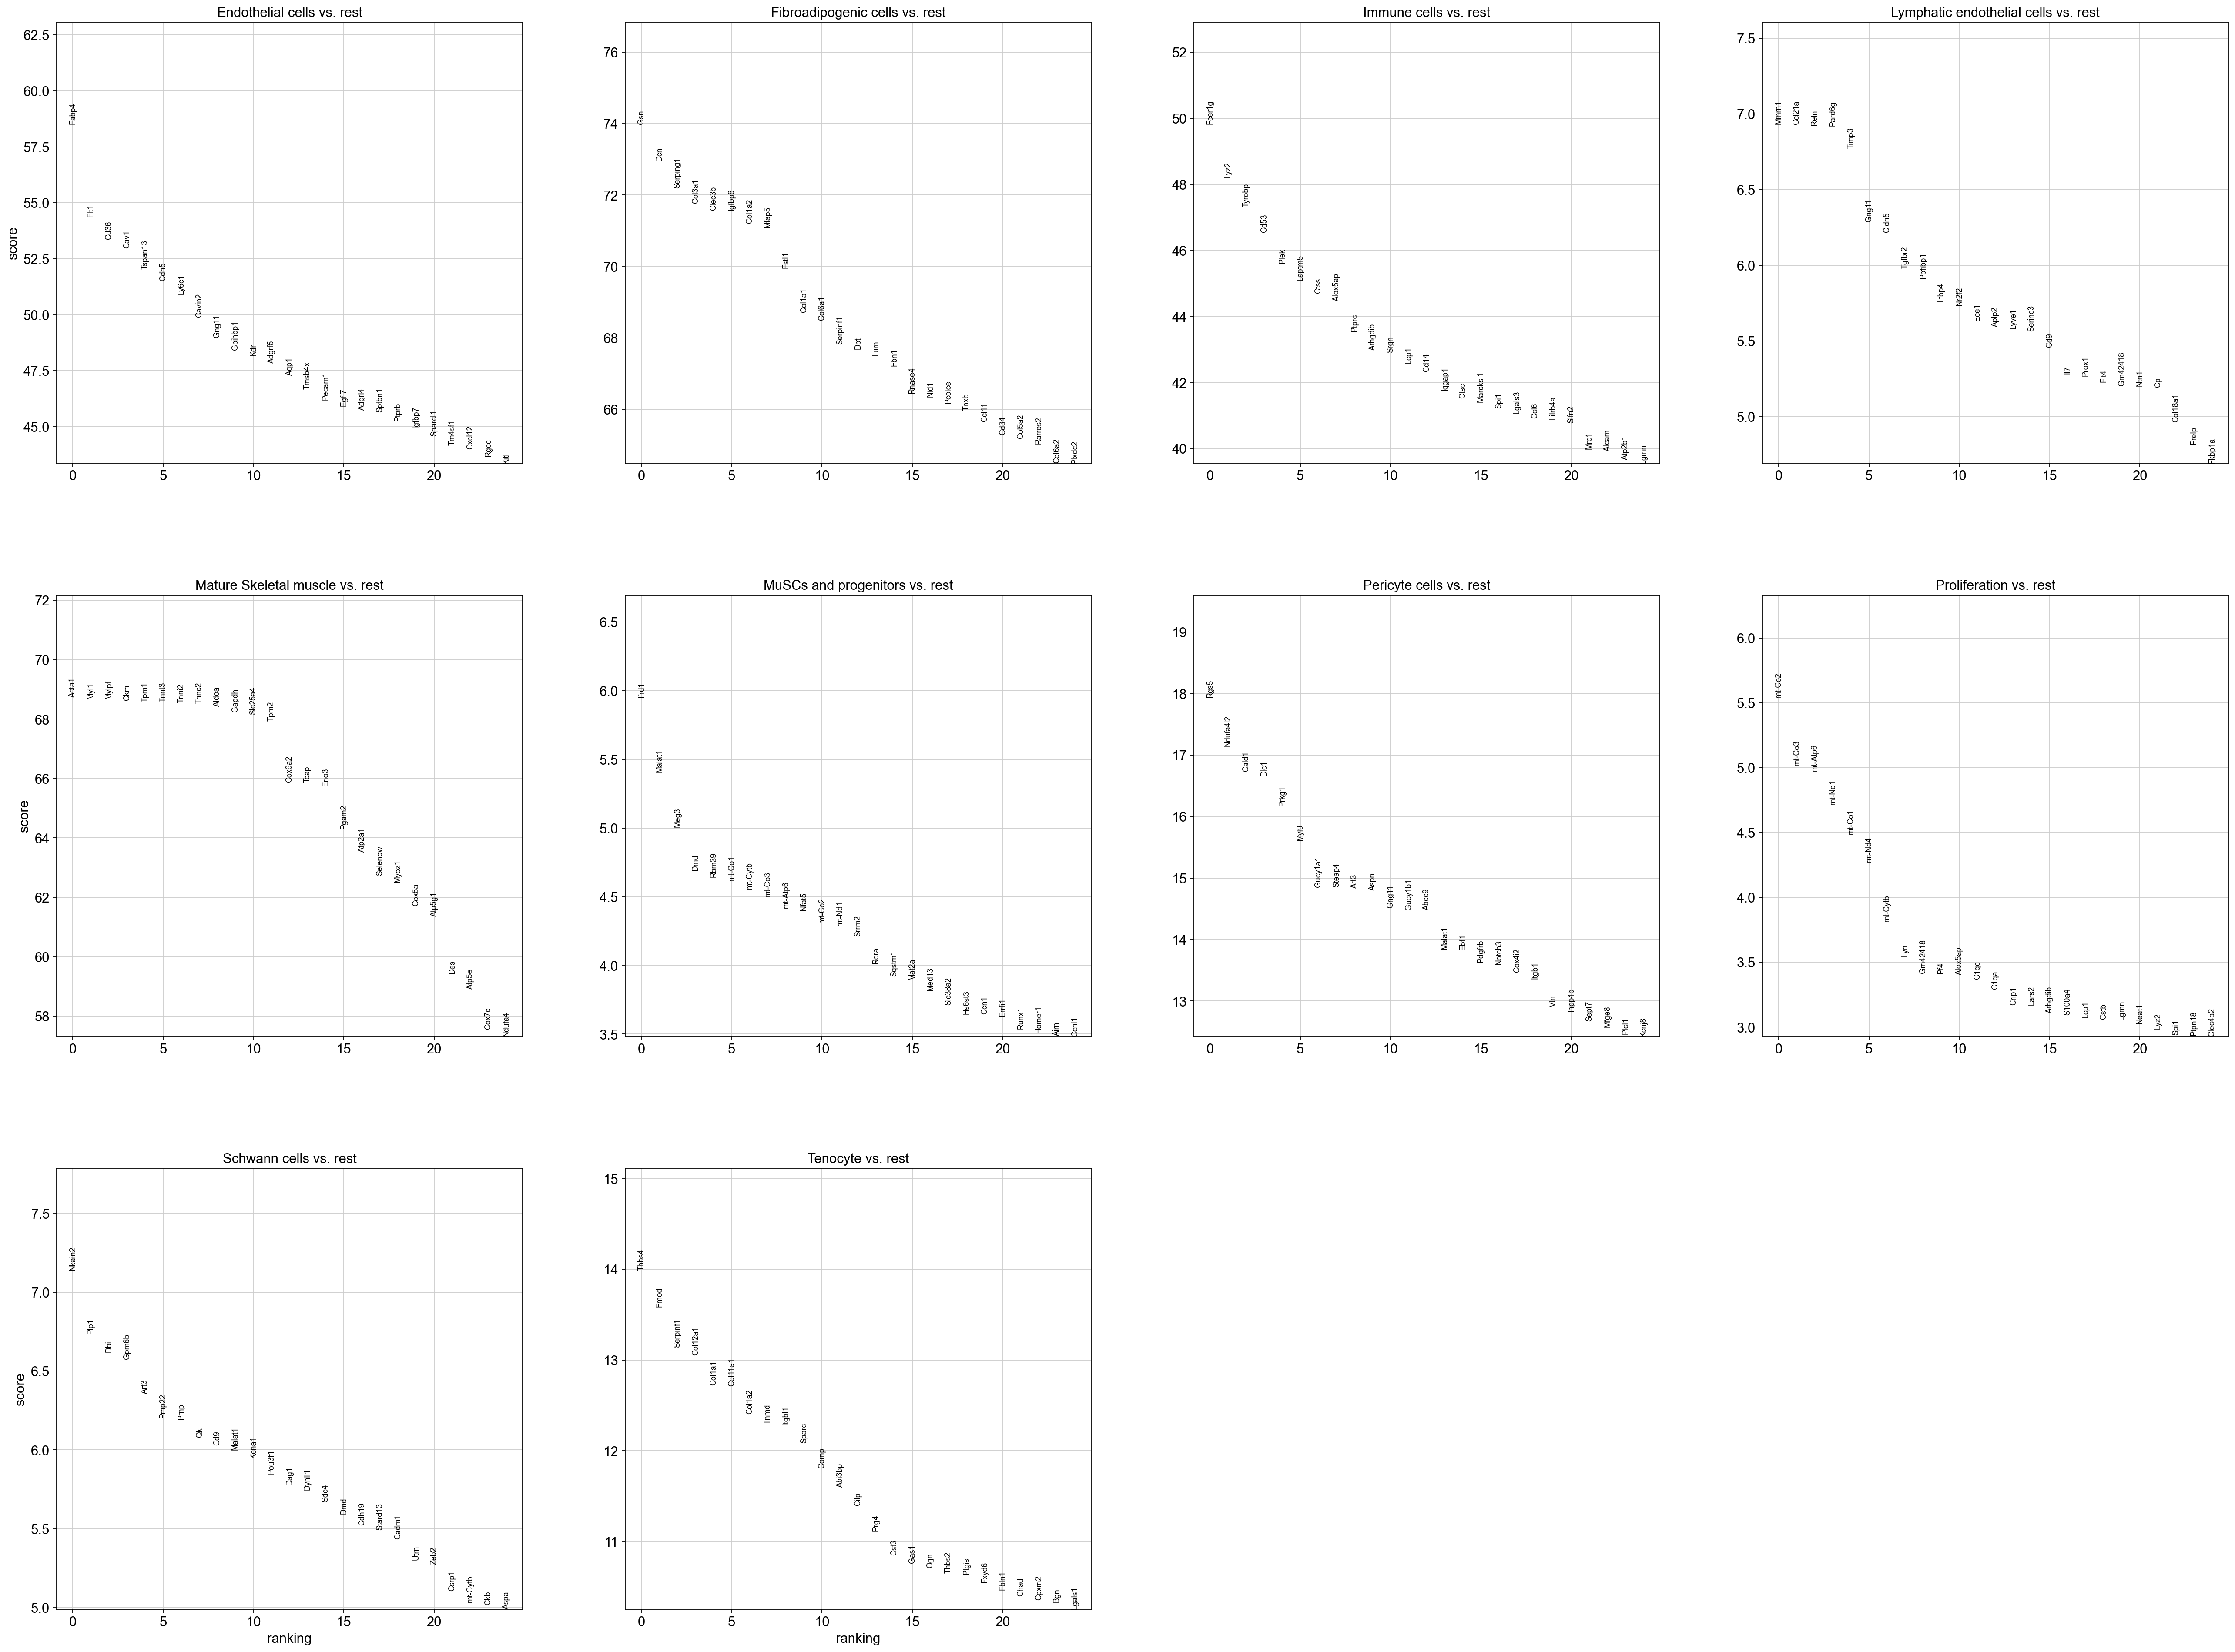

In [36]:
# Define the list of cell types to remove
#cell_types_to_remove = ['Schwann cells', 'Pericyte cells', 'Tenocyte','Lymphatic endothelial cells']

# Filter out samples from the specified cell types
#subset_adata = subset_adata[~subset_adata.obs['cell type'].isin(cell_types_to_remove)]

# Re-run rank_genes_groups
sc.tl.rank_genes_groups(subset_adata, method='wilcoxon', groupby="cell type")
sc.pl.rank_genes_groups(subset_adata, n_genes=25, sharey=False, save="_celltype_markers.png")


In [20]:

# Identify Marker Genes for each cell type
#sc.tl.rank_genes_groups(subset_adata, method='wilcoxon', groupby="cell type")
#sc.pl.rank_genes_groups(subset_adata, n_genes=25, sharey=False, save="_celltype_markers.png")


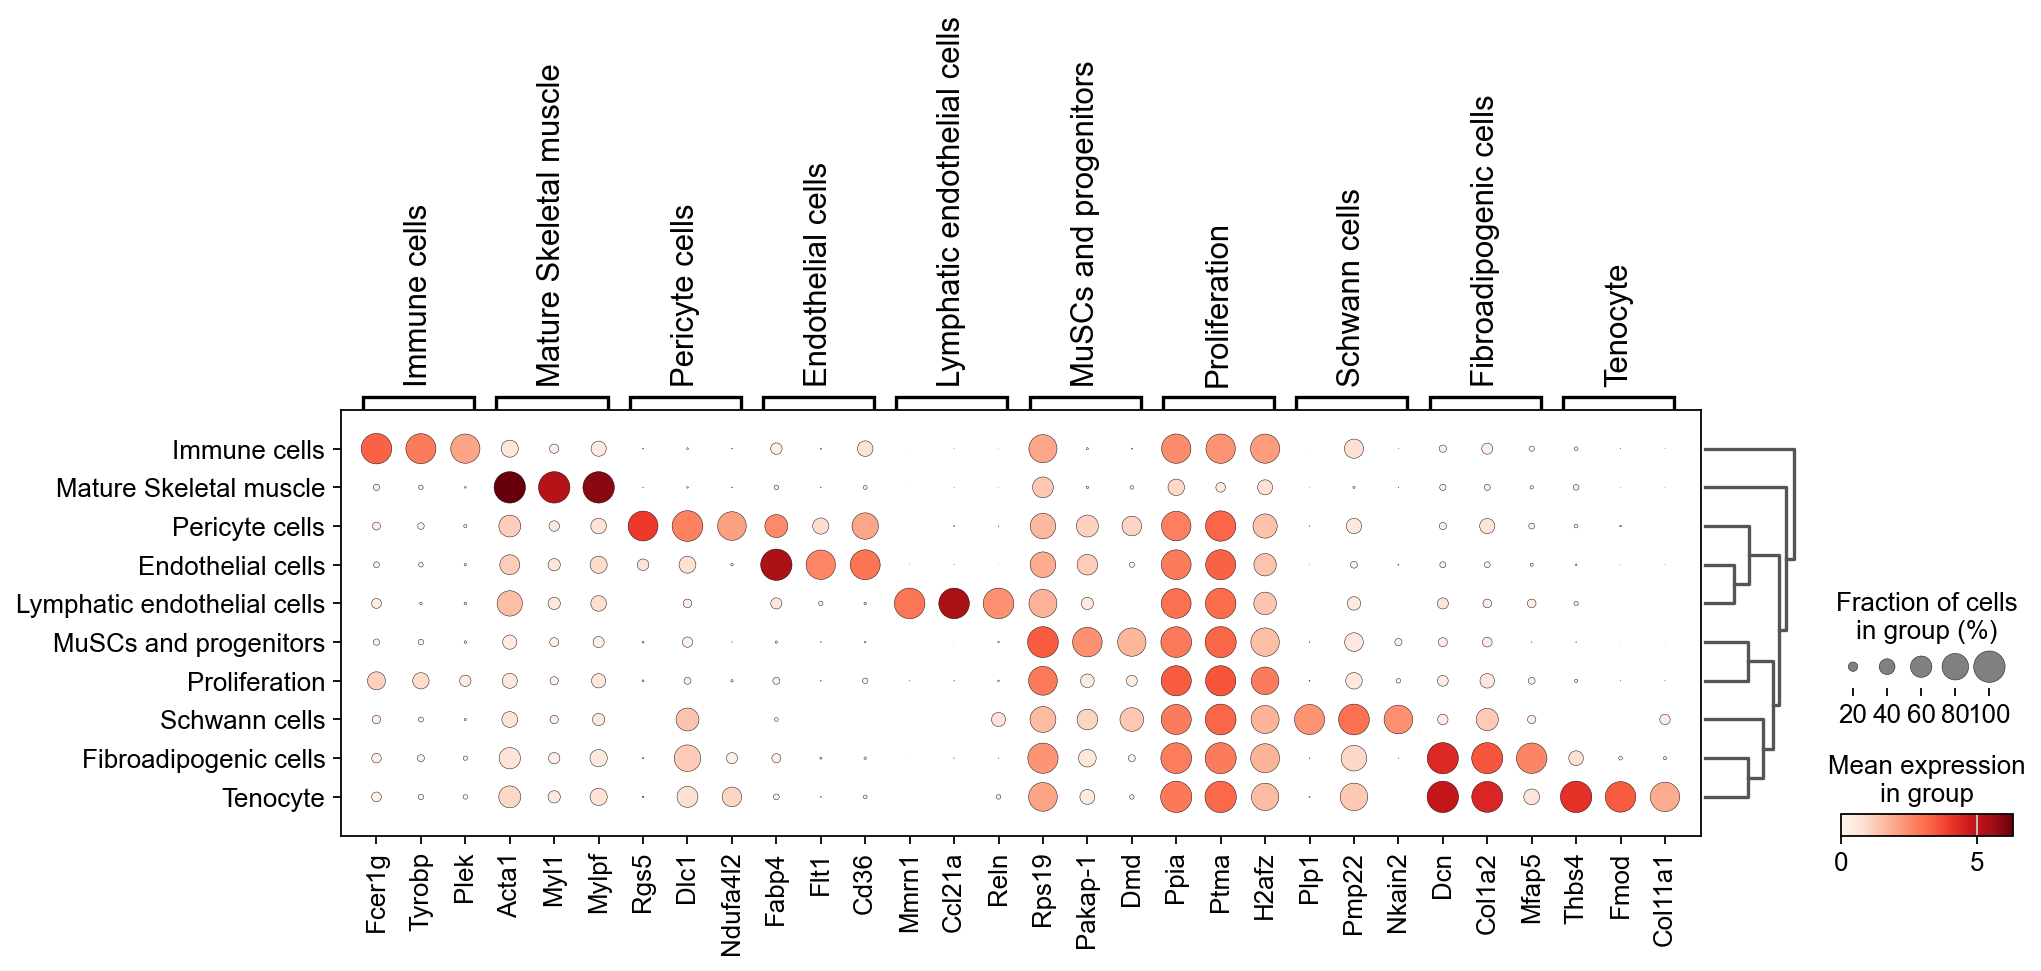

In [35]:
# Visualize marker genes using core dotplot functions
sc.pl.rank_genes_groups_dotplot(adata, groupby='cell type', n_genes=3, save='dotplot2_Mesen.png')


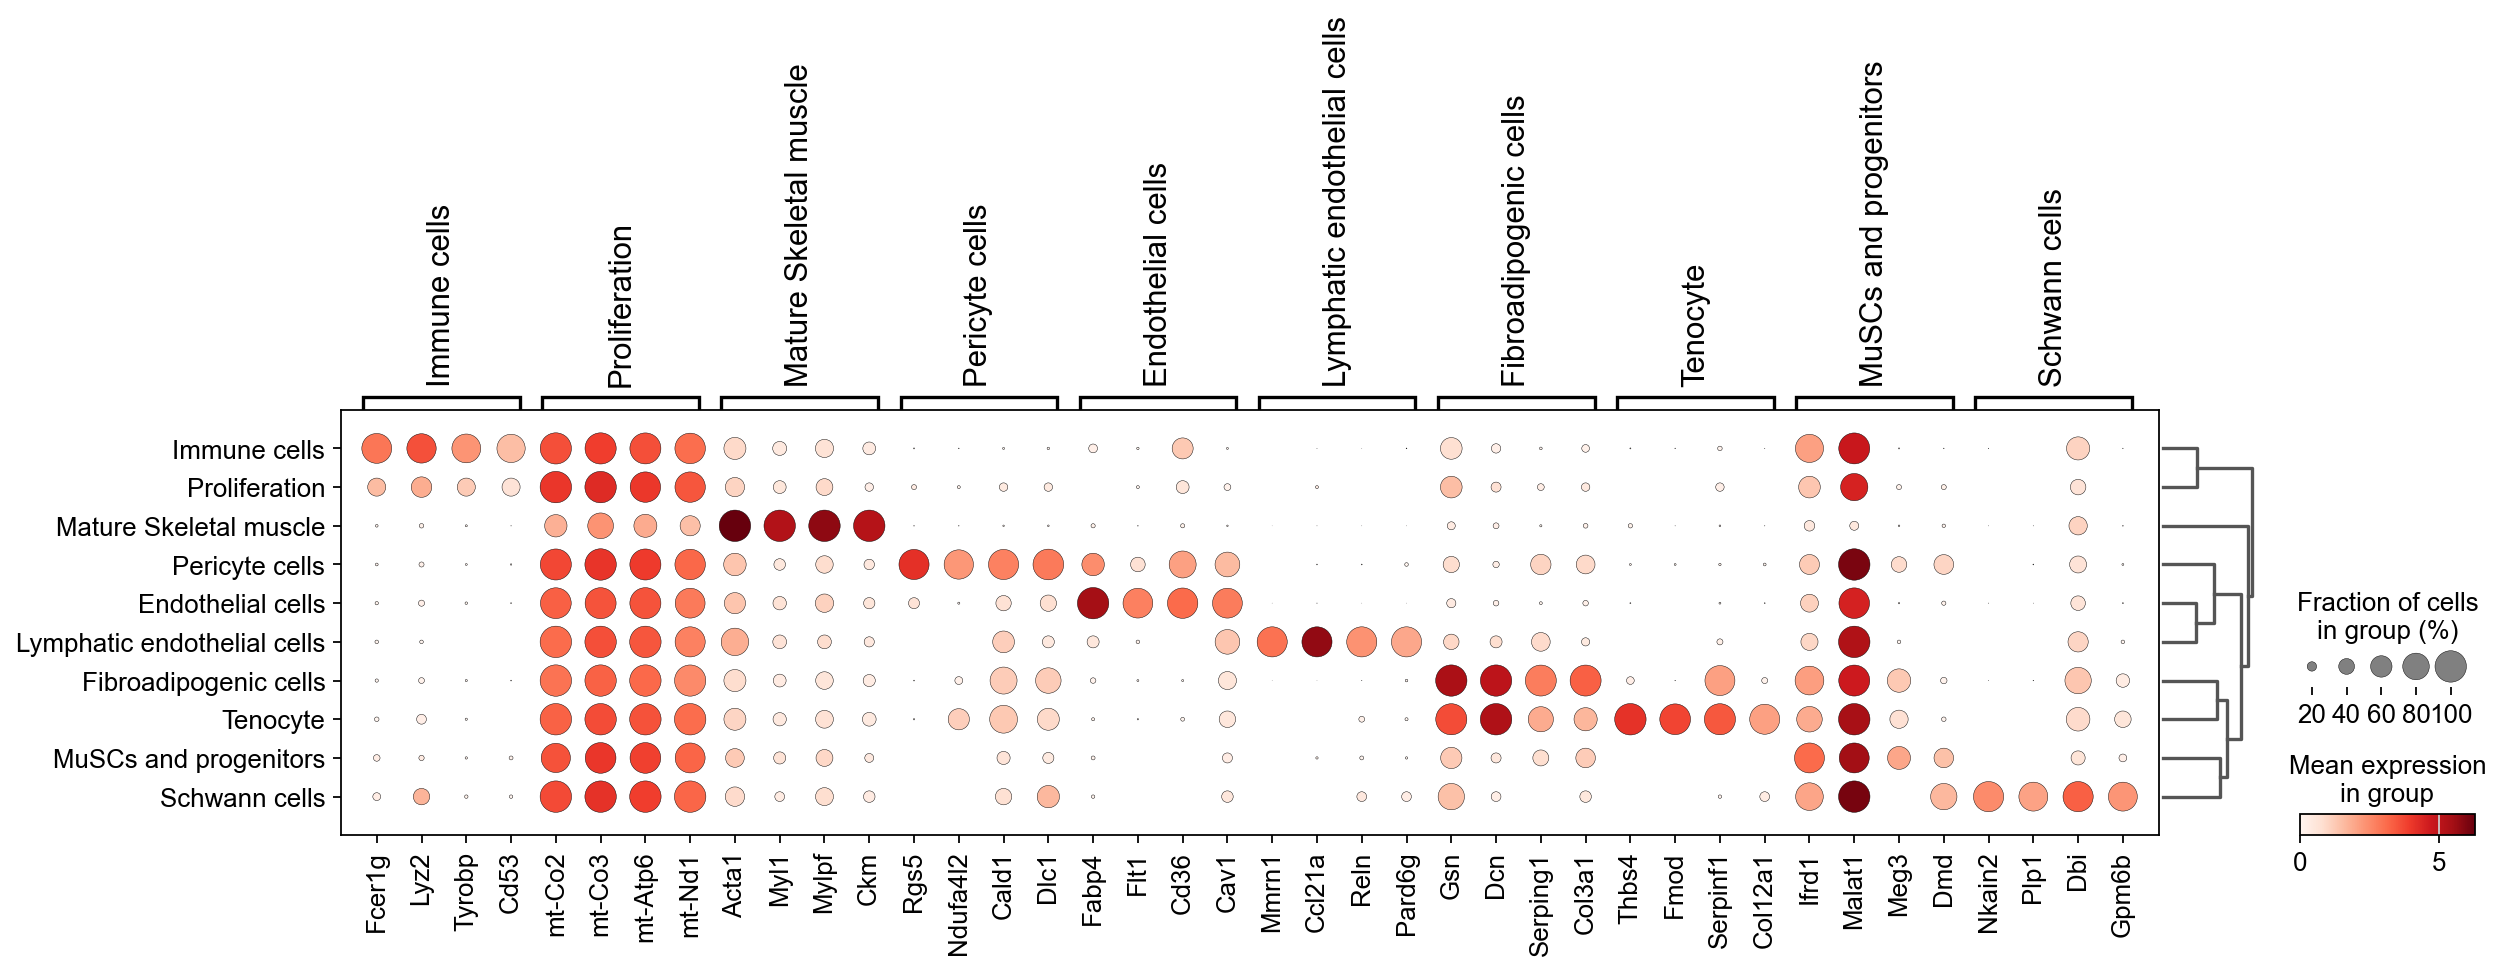

In [38]:
# Visualize marker genes using core dotplot functions
sc.pl.rank_genes_groups_dotplot(subset_adata, groupby='cell type', n_genes=4, save='dotplot2_Mesen.png')


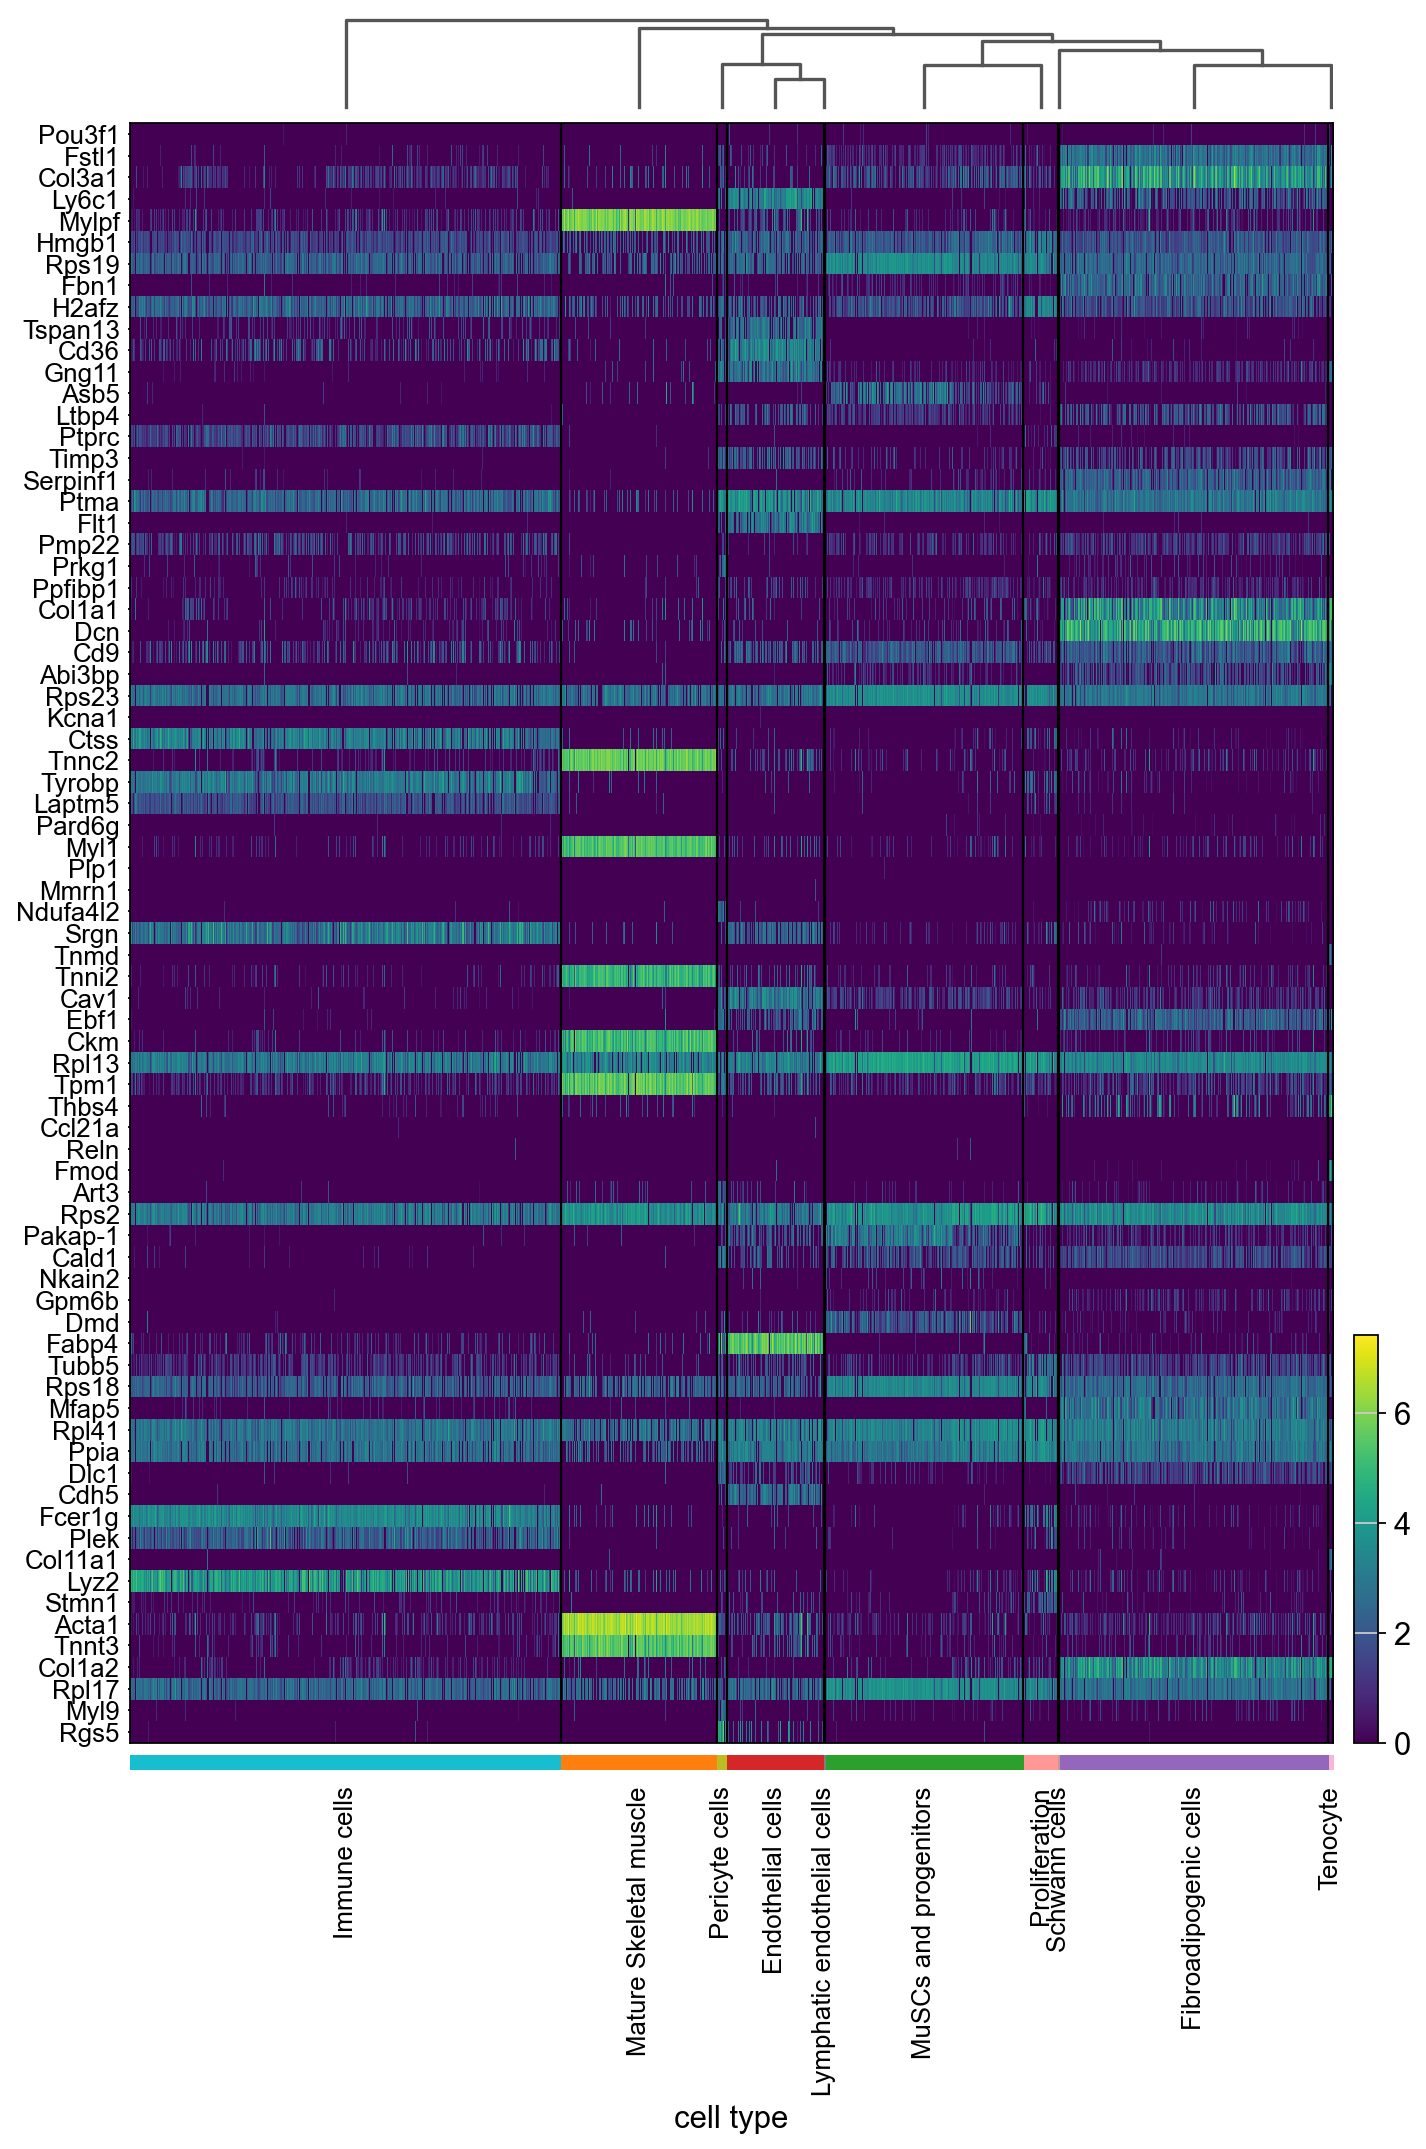

In [31]:
# Perform differential expression analysis using Leiden clusters and the Wilcoxon test
sc.tl.rank_genes_groups(adata, groupby='cell type', method='wilcoxon')

# Get the top differentially expressed genes for each cluster
result = adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = pd.DataFrame({group: result['names'][group][:8] for group in groups})

# Extract the unique gene names
unique_top_genes = list(set(top_genes.values.flatten()))

# Subset the AnnData object with the top genes
adata_top_genes = adata[:, unique_top_genes]

# Plot the heatmap using var_names and a better color scale
sc.pl.heatmap(adata_top_genes, var_names=unique_top_genes, groupby='cell type', cmap='viridis', dendrogram=True, swap_axes=True, show_gene_labels=True, save="heatmap.png")

# Show the plot
pl.show()

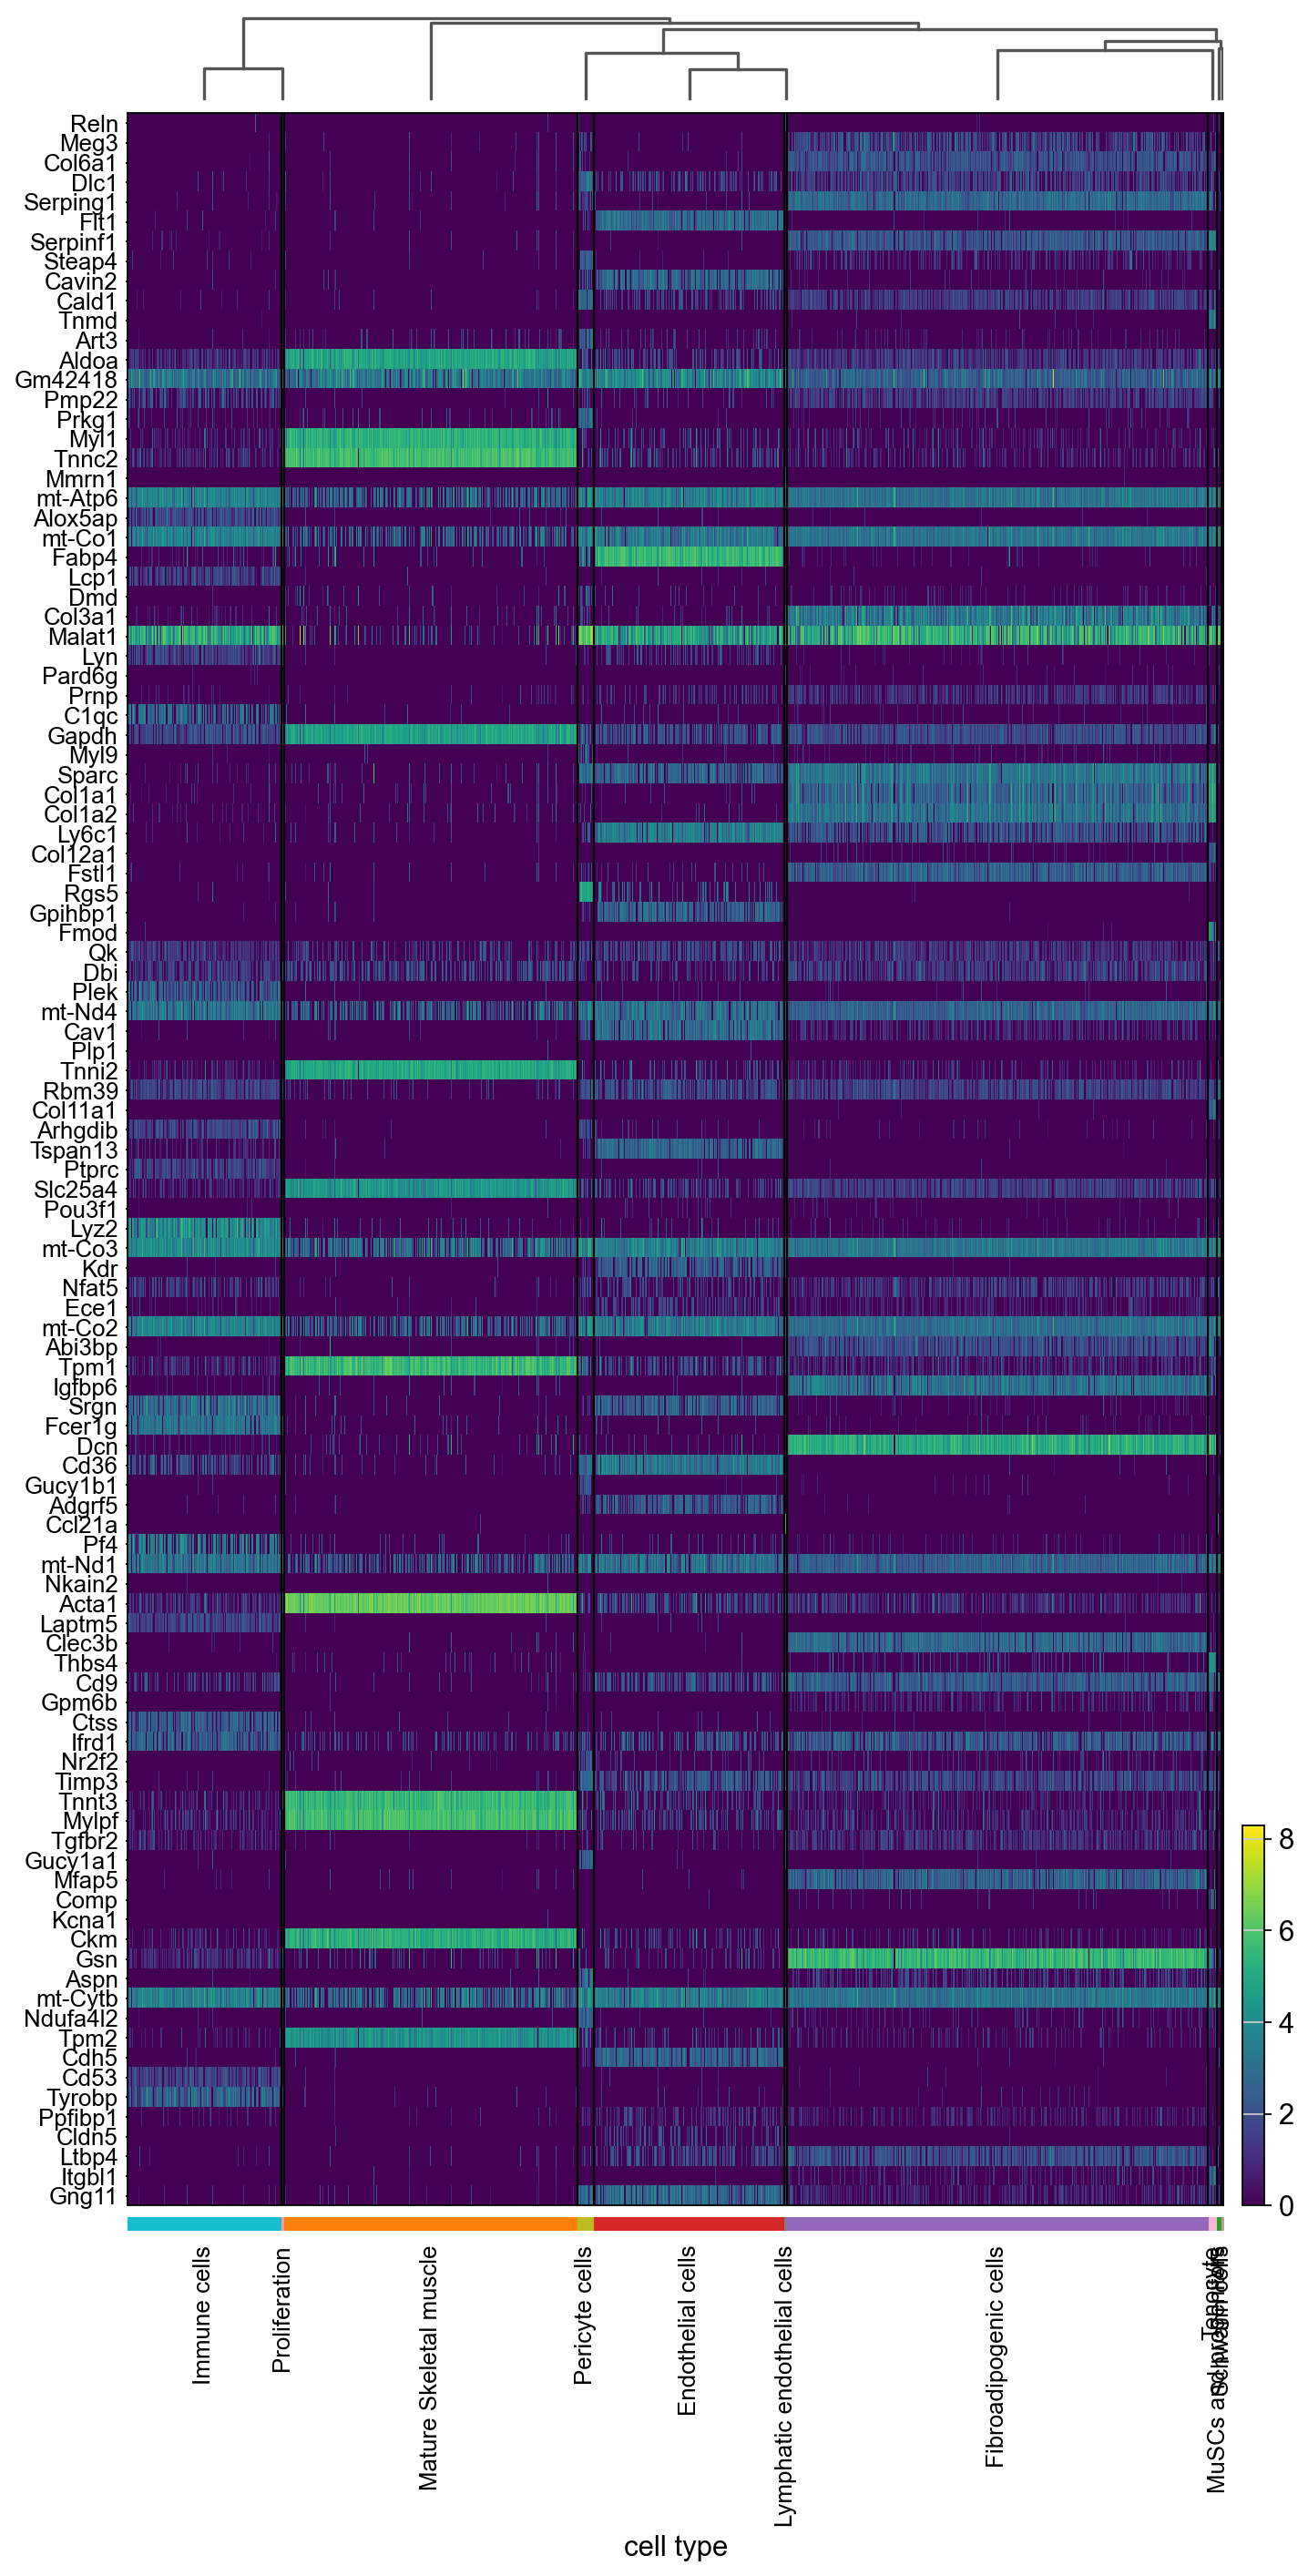

In [39]:
# Perform differential expression analysis using Leiden clusters and the Wilcoxon test
sc.tl.rank_genes_groups(subset_adata, groupby='cell type', method='wilcoxon')

# Get the top differentially expressed genes for each cluster
result = subset_adata.uns['rank_genes_groups']
groups = result['names'].dtype.names
top_genes = pd.DataFrame({group: result['names'][group][:12] for group in groups})

# Extract the unique gene names
unique_top_genes = list(set(top_genes.values.flatten()))

# Subset the AnnData object with the top genes
subset_adata_top_genes = subset_adata[:, unique_top_genes]

# Plot the heatmap using var_names and a better color scale
sc.pl.heatmap(subset_adata_top_genes, var_names=unique_top_genes, groupby='cell type', cmap='viridis', dendrogram=True, swap_axes=True, show_gene_labels=True, save="heatmap.png")

# Show the plot
pl.show()

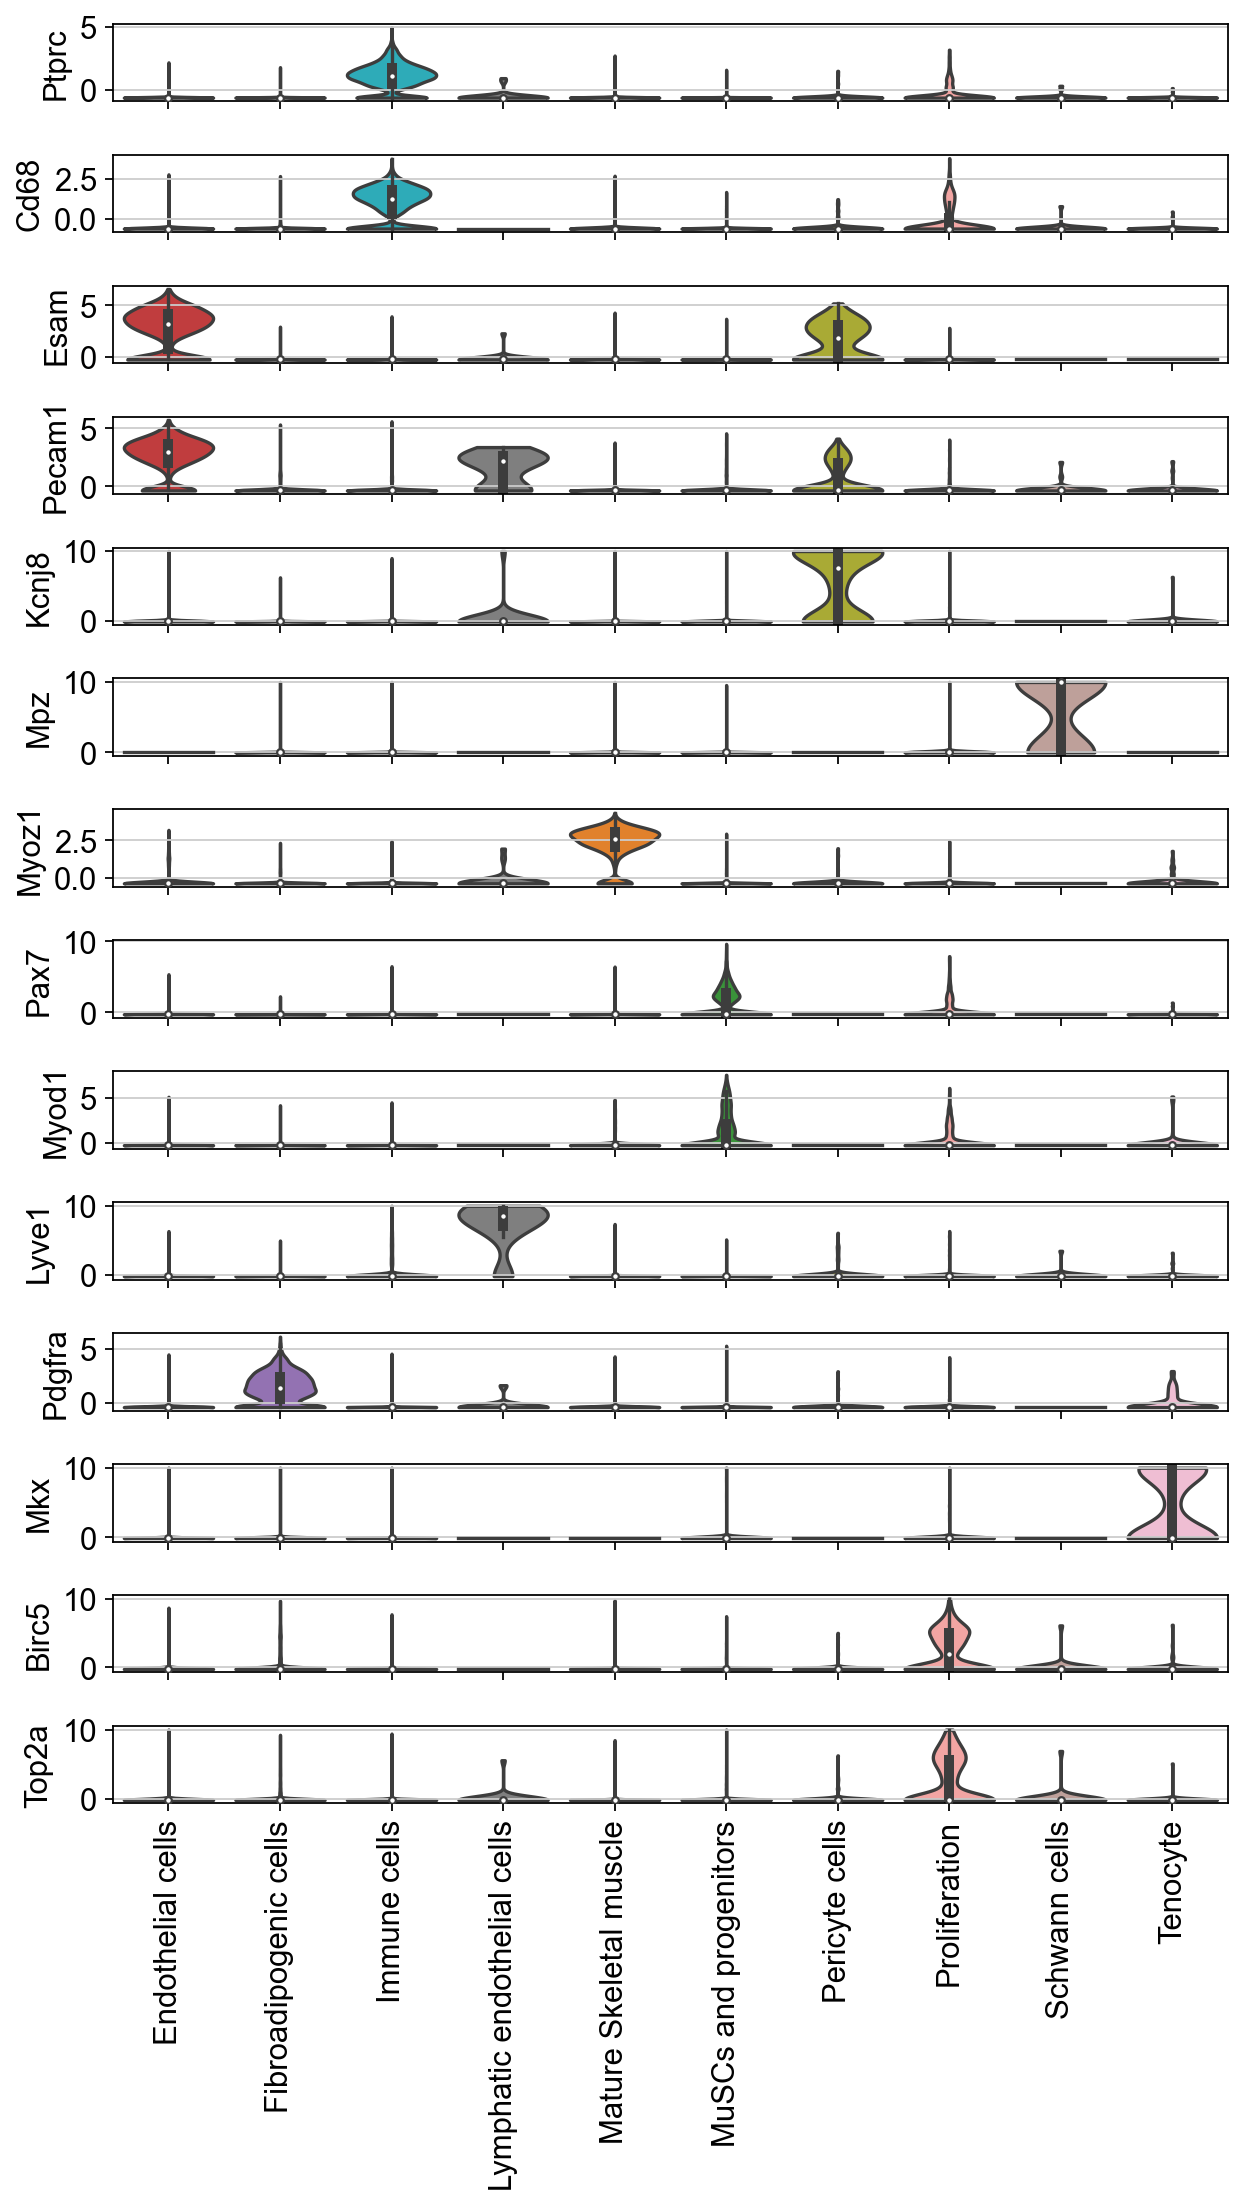

In [46]:

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from tqdm import tqdm

import os

# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")

# Create the 'FIGURE_2' directory if it doesn't exist
figure_dir = os.path.join(os.getcwd(), 'FIGURE_2')
os.makedirs(figure_dir, exist_ok=True)


# Your color palette
celltypePalette = {
    "Mature Skeletal muscle": '#ff7f0e',
    "MuSCs and progenitors": '#2ca02c',
    "Fibroadipogenic cells":'#9467bd',
    "Immune cells":'#17becf',
    "Endothelial cells": '#d62728',
    "Proliferation":  '#ff9896',
    "Pericyte cells": '#bcbd22',
    "Tenocyte": '#f7b6d2',
    "Lymphatic endothelial cells": '#7f7f7f',
    "Schwann cells": '#c49c94',
    
}

genes = ['Ptprc', 'Cd68', 'Esam', 'Pecam1', 'Kcnj8', 'Mpz', 'Myoz1', 'Pax7', 'Myod1', 'Lyve1', 'Pdgfra', 'Mkx', 'Birc5', 'Top2a',]

# Calculate the number of rows needed based on the number of genes
num_rows = len(genes)

# Create subplots with the specified number of rows
fig, axs = plt.subplots(ncols=1, nrows=num_rows, figsize=(8, 14))
axs = axs.flatten()

# Loop through genes and plot each one
for i, gene in enumerate(genes):
    sc.pl.violin(adata, gene, groupby='cell type', stripplot=False, rotation=90,
                 use_raw=False, scale="width", ncols=1,
                 ax=axs[i],
                 xlabel='',
                 show=False,  # Set show to False to prevent each plot from being displayed individually
                 fill=None,
                 inner="box"
                 )
    # axs[i].axhline(limits[gene], color="black", linestyle="--")
    if i < len(genes) - 1:
        axs[i].tick_params(labelbottom=False)

# Display all the plots together
plt.subplots_adjust(wspace=0.4)  # Adjust the space between subplots
plt.tight_layout()
plt.savefig(os.path.join(figure_dir, "youngviolinmarker_plot.png"))
plt.show()


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as pl
import seaborn as sns
import bbknn
import scvelo as scv
import anndata
import leidenalg
import loompy
from scipy import io
from scipy.sparse import coo_matrix, csr_matrix
from matplotlib.pyplot import rc_context
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import os
import random

C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\tpsa222\.conda\envs\young\lib\site-packages\umap\distances.py:1086: NumbaDeprecatio

In [2]:
sc.set_figure_params(format='png')  # for beautified visualization
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.set_figure_params(style='scvelo', format='png')  # for beautified visualization

In [3]:
# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")

In [4]:
adata = sc.read_h5ad('integrated young.h5ad')
adata

AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities',

In [ ]:
cell_type = {
    "0": "Mature Skeletal muscle",
    "1": "Fibroadipogenic cells 1",
    "2": "Myo-Fibroblast",
    "3": "Monocytes/Macrophages",
    "4": "MuSCs and progenitors",
    "5": "MuSCs and Myoblasts",
    "6": "Anti-inflammatory Macrophages 1",
    "7": "Endothelial cells",
    "8": "Residence Macrophages/APC",
    "9": "Neutrophils",
    "10": "Anti-inflammatory Macrophages 2",
    "11": "Fibroadipogenic cells 2",
    "12": "Proliferation",
    "13": "B cells/Residence Macrophages/APC",
    "14": "T-lymphocytes and NKCs",
    "15": "Pericyte cells", 
    "16": "Tenocyte",
    "17": "Schwann cells",
    "18": "Lymphatic endothelial cells",
        
}

In [5]:
new_cluster_names = ["Mature Skeletal muscle", "Fibroadipogenic cells 1", "Myo-Fibroblast", "Monocytes/Macrophages", "MuSCs and progenitors", "MuSCs and Myoblasts",
                     "Anti-inflammatory Macrophages 1", "Endothelial cells", "Residence Macrophages/APC", "Neutrophils", "Anti-inflammatory Macrophages 2",
                    "Fibroadipogenic cells 2", "Proliferation", "B cells/Residence Macrophages/APC", "T-lymphocytes and NKCs","Pericyte cells","Tenocyte",
                    "Schwann cells","Lymphatic endothelial cells",]

adata.rename_categories('leiden', new_cluster_names)


In [6]:
adata.obs

n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAGTTCCGTTC-1-Sham_GFP               4116       15405.0            653.0   
AAACCCATCCATACTT-1-Sham_GFP               2850       10036.0            417.0   
AAACCCATCCCACAGG-1-Sham_GFP               2414        7717.0            212.0   
AAACGAACATACCACA-1-Sham_GFP               2668        9444.0            274.0   
AAACGAAGTCGTGGTC-1-Sham_GFP               2716        9703.0            588.0   
...                                        ...           ...              ...   
TTTGTTGAGATGGCGT-1-OV_noGFP               1873        4125.0            218.0   
TTTGTTGCACCGAATT-1-OV_noGFP               4590       23666.0            426.0   
TTTGTTGCATCCTTCG-1-OV_noGFP               3014       10031.0            198.0   
TTTGTTGGTCAGGAGT-1-OV_noGFP               1780        4392.0             67.0   
TTTGTTGGTTGTGCAT-1-OV_noGFP               2986        8995.0            427.0   

                             pct_counts_mt     batch  n_genes  \
AAACCCAGTTCCGTTC-1-Sham_GFP       4.238883  Sham_GFP     4116   
AAACCCATCCATACTT-1-Sham_GFP       4.155042  Sham_GFP     2850   
AAACCCATCCCACAGG-1-Sham_GFP       2.747182  Sham_GFP     2413   
AAACGAACATACCACA-1-Sham_GFP       2.901313  Sham_GFP     2668   
AAACGAAGTCGTGGTC-1-Sham_GFP       6.059981  Sham_GFP     2716   
...                                    ...       ...      ...   
TTTGTTGAGATGGCGT-1-OV_noGFP       5.284848  OV_noGFP     1873   
TTTGTTGCACCGAATT-1-OV_noGFP       1.800051  OV_noGFP     4590   
TTTGTTGCATCCTTCG-1-OV_noGFP       1.973881  OV_noGFP     3014   
TTTGTTGGTCAGGAGT-1-OV_noGFP       1.525501  OV_noGFP     1780   
TTTGTTGGTTGTGCAT-1-OV_noGFP       4.747082  OV_noGFP     2986   

                                                      leiden  \
AAACCCAGTTCCGTTC-1-Sham_GFP                Endothelial cells   
AAACCCATCCATACTT-1-Sham_GFP              MuSCs and Myoblasts   
AAACCCATCCCACAGG-1-Sham_GFP              MuSCs and Myoblasts   
AAACGAACATACCACA-1-Sham_GFP              MuSCs and Myoblasts   
AAACGAAGTCGTGGTC-1-Sham_GFP              MuSCs and Myoblasts   
...                                                      ...   
TTTGTTGAGATGGCGT-1-OV_noGFP            Monocytes/Macrophages   
TTTGTTGCACCGAATT-1-OV_noGFP  Anti-inflammatory Macrophages 1   
TTTGTTGCATCCTTCG-1-OV_noGFP            Monocytes/Macrophages   
TTTGTTGGTCAGGAGT-1-OV_noGFP        Residence Macrophages/APC   
TTTGTTGGTTGTGCAT-1-OV_noGFP            Monocytes/Macrophages   

                                                   cell type condition  
AAACCCAGTTCCGTTC-1-Sham_GFP                Endothelial cells  Sham_GFP  
AAACCCATCCATACTT-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACCCATCCCACAGG-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACGAACATACCACA-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
AAACGAAGTCGTGGTC-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP  
...                                                      ...       ...  
TTTGTTGAGATGGCGT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  
TTTGTTGCACCGAATT-1-OV_noGFP  Anti-inflammatory Macrophages 1  OV_noGFP  
TTTGTTGCATCCTTCG-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  
TTTGTTGGTCAGGAGT-1-OV_noGFP        Residence Macrophages/APC  OV_noGFP  
TTTGTTGGTTGTGCAT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP  

[23914 rows x 9 columns]

In [7]:
batch = adata.obs['batch']
batch

AAACCCAGTTCCGTTC-1-Sham_GFP    Sham_GFP
AAACCCATCCATACTT-1-Sham_GFP    Sham_GFP
AAACCCATCCCACAGG-1-Sham_GFP    Sham_GFP
AAACGAACATACCACA-1-Sham_GFP    Sham_GFP
AAACGAAGTCGTGGTC-1-Sham_GFP    Sham_GFP
                                 ...   
TTTGTTGAGATGGCGT-1-OV_noGFP    OV_noGFP
TTTGTTGCACCGAATT-1-OV_noGFP    OV_noGFP
TTTGTTGCATCCTTCG-1-OV_noGFP    OV_noGFP
TTTGTTGGTCAGGAGT-1-OV_noGFP    OV_noGFP
TTTGTTGGTTGTGCAT-1-OV_noGFP    OV_noGFP
Name: batch, Length: 23914, dtype: category
Categories (4, object): ['Sham_GFP', 'Sham_noGFP', 'OV_GFP', 'OV_noGFP']

In [8]:
leiden =adata.obs['leiden']
leiden

AAACCCAGTTCCGTTC-1-Sham_GFP                  Endothelial cells
AAACCCATCCATACTT-1-Sham_GFP                MuSCs and Myoblasts
AAACCCATCCCACAGG-1-Sham_GFP                MuSCs and Myoblasts
AAACGAACATACCACA-1-Sham_GFP                MuSCs and Myoblasts
AAACGAAGTCGTGGTC-1-Sham_GFP                MuSCs and Myoblasts
                                            ...               
TTTGTTGAGATGGCGT-1-OV_noGFP              Monocytes/Macrophages
TTTGTTGCACCGAATT-1-OV_noGFP    Anti-inflammatory Macrophages 1
TTTGTTGCATCCTTCG-1-OV_noGFP              Monocytes/Macrophages
TTTGTTGGTCAGGAGT-1-OV_noGFP          Residence Macrophages/APC
TTTGTTGGTTGTGCAT-1-OV_noGFP              Monocytes/Macrophages
Name: leiden, Length: 23914, dtype: category
Categories (19, object): ['Mature Skeletal muscle', 'Fibroadipogenic cells 1', 'Myo-Fibroblast', 'Monocytes/Macrophages', ..., 'Pericyte cells', 'Tenocyte', 'Schwann cells', 'Lymphatic endothelial cells']

In [9]:
Sham_GFP_Sham_noGFP_OV_GFP_OV_noGFP_ = batch.str.cat(leiden)
Sham_GFP_Sham_noGFP_OV_GFP_OV_noGFP_

AAACCCAGTTCCGTTC-1-Sham_GFP                  Sham_GFPEndothelial cells
AAACCCATCCATACTT-1-Sham_GFP                Sham_GFPMuSCs and Myoblasts
AAACCCATCCCACAGG-1-Sham_GFP                Sham_GFPMuSCs and Myoblasts
AAACGAACATACCACA-1-Sham_GFP                Sham_GFPMuSCs and Myoblasts
AAACGAAGTCGTGGTC-1-Sham_GFP                Sham_GFPMuSCs and Myoblasts
                                                ...                   
TTTGTTGAGATGGCGT-1-OV_noGFP              OV_noGFPMonocytes/Macrophages
TTTGTTGCACCGAATT-1-OV_noGFP    OV_noGFPAnti-inflammatory Macrophages 1
TTTGTTGCATCCTTCG-1-OV_noGFP              OV_noGFPMonocytes/Macrophages
TTTGTTGGTCAGGAGT-1-OV_noGFP          OV_noGFPResidence Macrophages/APC
TTTGTTGGTTGTGCAT-1-OV_noGFP              OV_noGFPMonocytes/Macrophages
Name: batch, Length: 23914, dtype: object

In [10]:
adata.obs['com_clusters']= Sham_GFP_Sham_noGFP_OV_GFP_OV_noGFP_

In [11]:
adata.obs

n_genes_by_counts  total_counts  total_counts_mt  \
AAACCCAGTTCCGTTC-1-Sham_GFP               4116       15405.0            653.0   
AAACCCATCCATACTT-1-Sham_GFP               2850       10036.0            417.0   
AAACCCATCCCACAGG-1-Sham_GFP               2414        7717.0            212.0   
AAACGAACATACCACA-1-Sham_GFP               2668        9444.0            274.0   
AAACGAAGTCGTGGTC-1-Sham_GFP               2716        9703.0            588.0   
...                                        ...           ...              ...   
TTTGTTGAGATGGCGT-1-OV_noGFP               1873        4125.0            218.0   
TTTGTTGCACCGAATT-1-OV_noGFP               4590       23666.0            426.0   
TTTGTTGCATCCTTCG-1-OV_noGFP               3014       10031.0            198.0   
TTTGTTGGTCAGGAGT-1-OV_noGFP               1780        4392.0             67.0   
TTTGTTGGTTGTGCAT-1-OV_noGFP               2986        8995.0            427.0   

                             pct_counts_mt     batch  n_genes  \
AAACCCAGTTCCGTTC-1-Sham_GFP       4.238883  Sham_GFP     4116   
AAACCCATCCATACTT-1-Sham_GFP       4.155042  Sham_GFP     2850   
AAACCCATCCCACAGG-1-Sham_GFP       2.747182  Sham_GFP     2413   
AAACGAACATACCACA-1-Sham_GFP       2.901313  Sham_GFP     2668   
AAACGAAGTCGTGGTC-1-Sham_GFP       6.059981  Sham_GFP     2716   
...                                    ...       ...      ...   
TTTGTTGAGATGGCGT-1-OV_noGFP       5.284848  OV_noGFP     1873   
TTTGTTGCACCGAATT-1-OV_noGFP       1.800051  OV_noGFP     4590   
TTTGTTGCATCCTTCG-1-OV_noGFP       1.973881  OV_noGFP     3014   
TTTGTTGGTCAGGAGT-1-OV_noGFP       1.525501  OV_noGFP     1780   
TTTGTTGGTTGTGCAT-1-OV_noGFP       4.747082  OV_noGFP     2986   

                                                      leiden  \
AAACCCAGTTCCGTTC-1-Sham_GFP                Endothelial cells   
AAACCCATCCATACTT-1-Sham_GFP              MuSCs and Myoblasts   
AAACCCATCCCACAGG-1-Sham_GFP              MuSCs and Myoblasts   
AAACGAACATACCACA-1-Sham_GFP              MuSCs and Myoblasts   
AAACGAAGTCGTGGTC-1-Sham_GFP              MuSCs and Myoblasts   
...                                                      ...   
TTTGTTGAGATGGCGT-1-OV_noGFP            Monocytes/Macrophages   
TTTGTTGCACCGAATT-1-OV_noGFP  Anti-inflammatory Macrophages 1   
TTTGTTGCATCCTTCG-1-OV_noGFP            Monocytes/Macrophages   
TTTGTTGGTCAGGAGT-1-OV_noGFP        Residence Macrophages/APC   
TTTGTTGGTTGTGCAT-1-OV_noGFP            Monocytes/Macrophages   

                                                   cell type condition  \
AAACCCAGTTCCGTTC-1-Sham_GFP                Endothelial cells  Sham_GFP   
AAACCCATCCATACTT-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP   
AAACCCATCCCACAGG-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP   
AAACGAACATACCACA-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP   
AAACGAAGTCGTGGTC-1-Sham_GFP              MuSCs and Myoblasts  Sham_GFP   
...                                                      ...       ...   
TTTGTTGAGATGGCGT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP   
TTTGTTGCACCGAATT-1-OV_noGFP  Anti-inflammatory Macrophages 1  OV_noGFP   
TTTGTTGCATCCTTCG-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP   
TTTGTTGGTCAGGAGT-1-OV_noGFP        Residence Macrophages/APC  OV_noGFP   
TTTGTTGGTTGTGCAT-1-OV_noGFP            Monocytes/Macrophages  OV_noGFP   

                                                        com_clusters  
AAACCCAGTTCCGTTC-1-Sham_GFP                Sham_GFPEndothelial cells  
AAACCCATCCATACTT-1-Sham_GFP              Sham_GFPMuSCs and Myoblasts  
AAACCCATCCCACAGG-1-Sham_GFP              Sham_GFPMuSCs and Myoblasts  
AAACGAACATACCACA-1-Sham_GFP              Sham_GFPMuSCs and Myoblasts  
AAACGAAGTCGTGGTC-1-Sham_GFP              Sham_GFPMuSCs and Myoblasts  
...                                                              ...  
TTTGTTGAGATGGCGT-1-OV_noGFP            OV_noGFPMonocytes/Macrophages  
TTTGTTGCACCGAATT-1-OV_noGFP  OV_noGFPAnti-inflamm

In [12]:
#Identify DEGs in a cell type across conditions
sc.tl.rank_genes_groups(adata, 'com_clusters', groups=['OV_GFPResidence Macrophages/APC'], reference='OV_noGFPResidence Macrophages/APC', method='wilcoxon')

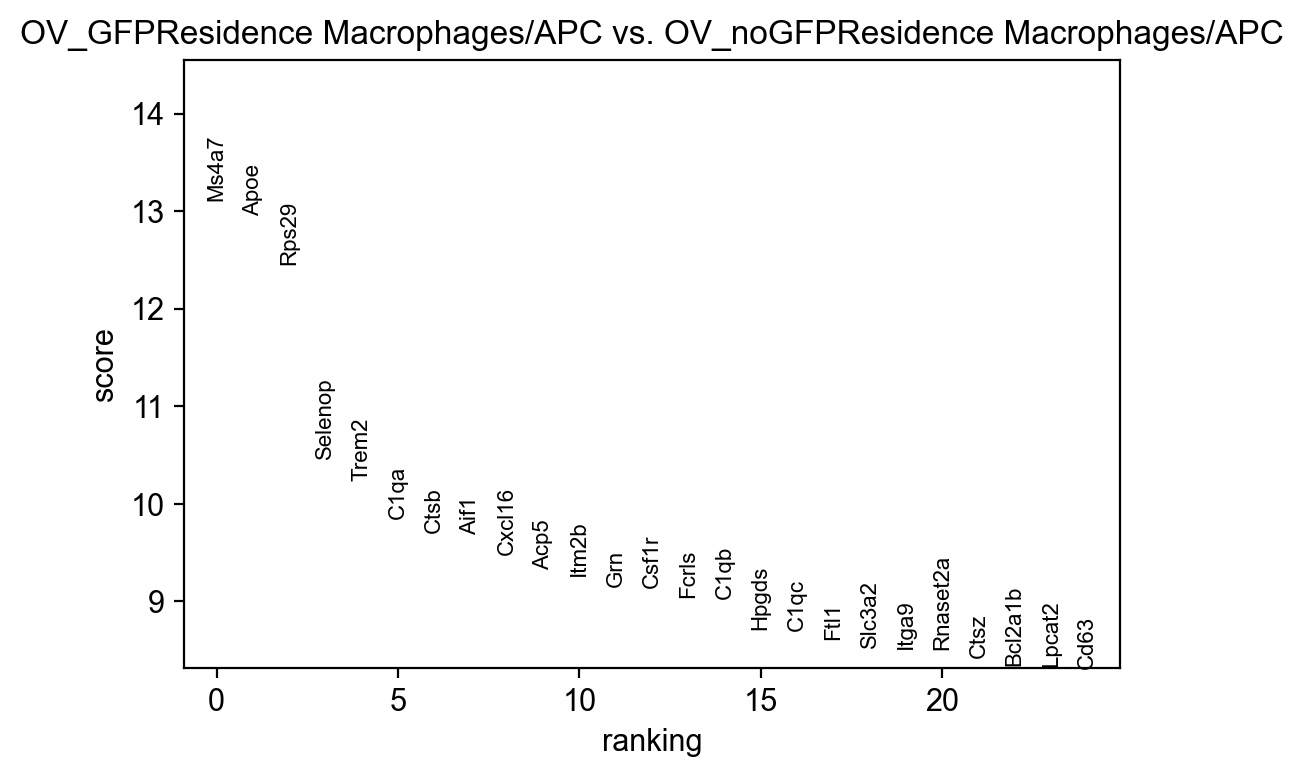

In [13]:
sc.pl.rank_genes_groups(adata, groups=['OV_GFPResidence Macrophages/APC'], n_genes=25) 

In [14]:
adata

AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition', 'com_clusters'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: '

In [15]:
result=adata.uns['rank_genes_groups']
groups=result['names'].dtype.names
df = pd.DataFrame(
    {group + '_' + key[:15]: result[key][group]
     for group in groups for key in ['names', 'scores', 'pvals', 'pvals_adj', 'logfoldchanges']})

In [16]:
df

OV_GFPResidence Macrophages/APC_names  \
0                                     Ms4a7   
1                                      Apoe   
2                                     Rps29   
3                                   Selenop   
4                                     Trem2   
...                                     ...   
23182                                  Ccl6   
23183                                Col1a2   
23184                                S100a6   
23185                                Col1a1   
23186                                Col3a1   

       OV_GFPResidence Macrophages/APC_scores  \
0                                   13.106411   
1                                   12.949512   
2                                   12.446799   
3                                   10.462209   
4                                   10.234167   
...                                       ...   
23182                              -10.717025   
23183                              -11.950038   
23184                              -12.893763   
23185                              -14.685625   
23186                              -21.529961   

       OV_GFPResidence Macrophages/APC_pvals  \
0                               3.025804e-39   
1                               2.364527e-38   
2                               1.455658e-35   
3                               1.288174e-25   
4                               1.393888e-24   
...                                      ...   
23182                           8.468368e-27   
23183                           6.489593e-33   
23184                           4.880326e-38   
23185                           7.969609e-49   
23186                          8.160169e-103   

       OV_GFPResidence Macrophages/APC_pvals_adj  \
0                                   2.338644e-35   
1                                   1.370657e-34   
2                                   5.625391e-32   
3                                   2.715354e-22   
4                                   2.486159e-21   
...                                          ...   
23182                               2.454451e-23   
23183                               2.149631e-29   
23184                               2.263202e-34   
23185                               9.239567e-45   
23186                               1.892098e-98   

       OV_GFPResidence Macrophages/APC_logfoldchanges  
0                                            1.386164  
1                                            1.242208  
2                                            0.498406  
3                                            0.945844  
4                                            0.991537  
...                                               ...  
23182                                       -1.160486  
23183                                       -4.331100  
23184                                       -1.323635  
23185                                       -4.387609  
23186                                       -4.931149  

[23187 rows x 5 columns]

In [17]:
# Create a 'Symbol' column from the 'OV_GFPMonocytes/Macrophages_names' column
df['Symbol'] = df['OV_GFPResidence Macrophages/APC_names']

# Ensure 'Symbol' column is string type
df['Symbol'] = df['Symbol'].astype(str)

# Make 'Symbol' column uppercase
df['Symbol'] = df['Symbol'].str.upper()

# Ensure 'OV_GFPMonocytes/Macrophages_names' column is string type
df['OV_GFPResidence Macrophages/APC_names'] = df['OV_GFPResidence Macrophages/APC_names'].astype(str)

# Make 'OV_GFPMonocytes/Macrophages_names' column uppercase
df['OV_GFPResidence Macrophages/APC_names'] = df['OV_GFPResidence Macrophages/APC_names'].str.upper()


In [18]:
df

OV_GFPResidence Macrophages/APC_names  \
0                                     MS4A7   
1                                      APOE   
2                                     RPS29   
3                                   SELENOP   
4                                     TREM2   
...                                     ...   
23182                                  CCL6   
23183                                COL1A2   
23184                                S100A6   
23185                                COL1A1   
23186                                COL3A1   

       OV_GFPResidence Macrophages/APC_scores  \
0                                   13.106411   
1                                   12.949512   
2                                   12.446799   
3                                   10.462209   
4                                   10.234167   
...                                       ...   
23182                              -10.717025   
23183                              -11.950038   
23184                              -12.893763   
23185                              -14.685625   
23186                              -21.529961   

       OV_GFPResidence Macrophages/APC_pvals  \
0                               3.025804e-39   
1                               2.364527e-38   
2                               1.455658e-35   
3                               1.288174e-25   
4                               1.393888e-24   
...                                      ...   
23182                           8.468368e-27   
23183                           6.489593e-33   
23184                           4.880326e-38   
23185                           7.969609e-49   
23186                          8.160169e-103   

       OV_GFPResidence Macrophages/APC_pvals_adj  \
0                                   2.338644e-35   
1                                   1.370657e-34   
2                                   5.625391e-32   
3                                   2.715354e-22   
4                                   2.486159e-21   
...                                          ...   
23182                               2.454451e-23   
23183                               2.149631e-29   
23184                               2.263202e-34   
23185                               9.239567e-45   
23186                               1.892098e-98   

       OV_GFPResidence Macrophages/APC_logfoldchanges   Symbol  
0                                            1.386164    MS4A7  
1                                            1.242208     APOE  
2                                            0.498406    RPS29  
3                                            0.945844  SELENOP  
4                                            0.991537    TREM2  
...                                               ...      ...  
23182                                       -1.160486     CCL6  
23183                                       -4.331100   COL1A2  
23184                                       -1.323635   S100A6  
23185                                       -4.387609   COL1A1  
23186                                       -4.931149   COL3A1  

[23187 rows x 6 columns]

In [20]:
# Save the results to a CSV file
df.to_csv('OV_GFPResidence Macrophages-APC2_DEG.csv', index=False)

In [19]:
df.to_csv('OV_GFPResidence Macrophages-APC_DEG.csv')

In [ ]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
#subset_adata = adata[adata.obs['batch'].isin(['OV_GFP', 'OV_noGFP'])]

In [5]:
# Subset the data for 'OV_GFP' and 'OV_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]

In [10]:
batch = subset_adata.obs['batch']
batch

AAACCCAGTTCCGTTC-1-Sham_GFP        Sham_GFP
AAACCCATCCATACTT-1-Sham_GFP        Sham_GFP
AAACCCATCCCACAGG-1-Sham_GFP        Sham_GFP
AAACGAACATACCACA-1-Sham_GFP        Sham_GFP
AAACGAAGTCGTGGTC-1-Sham_GFP        Sham_GFP
                                    ...    
TTTGTTGGTTCAAAGA-1-Sham_noGFP    Sham_noGFP
TTTGTTGGTTGTCATG-1-Sham_noGFP    Sham_noGFP
TTTGTTGTCAGAGTTC-1-Sham_noGFP    Sham_noGFP
TTTGTTGTCCGCACGA-1-Sham_noGFP    Sham_noGFP
TTTGTTGTCGACACTA-1-Sham_noGFP    Sham_noGFP
Name: batch, Length: 10653, dtype: category
Categories (2, object): ['Sham_GFP', 'Sham_noGFP']

In [11]:
leiden =subset_adata.obs['leiden']
leiden

AAACCCAGTTCCGTTC-1-Sham_GFP            Endothelial cells
AAACCCATCCATACTT-1-Sham_GFP          MuSCs and Myoblasts
AAACCCATCCCACAGG-1-Sham_GFP          MuSCs and Myoblasts
AAACGAACATACCACA-1-Sham_GFP          MuSCs and Myoblasts
AAACGAAGTCGTGGTC-1-Sham_GFP          MuSCs and Myoblasts
                                          ...           
TTTGTTGGTTCAAAGA-1-Sham_noGFP     Mature Skeletal muscle
TTTGTTGGTTGTCATG-1-Sham_noGFP    Fibroadipogenic cells 1
TTTGTTGTCAGAGTTC-1-Sham_noGFP     Mature Skeletal muscle
TTTGTTGTCCGCACGA-1-Sham_noGFP    Fibroadipogenic cells 1
TTTGTTGTCGACACTA-1-Sham_noGFP    Fibroadipogenic cells 2
Name: leiden, Length: 10653, dtype: category
Categories (19, object): ['Mature Skeletal muscle', 'Fibroadipogenic cells 1', 'Myo-Fibroblast', 'Monocytes/Macrophages', ..., 'Pericyte cells', 'Tenocyte', 'Schwann cells', 'Lymphatic endothelial cells']

In [12]:
Sham_GFP_Sham_noGFP = batch.str.cat(leiden)
Sham_GFP_Sham_noGFP

AAACCCAGTTCCGTTC-1-Sham_GFP              Sham_GFPEndothelial cells
AAACCCATCCATACTT-1-Sham_GFP            Sham_GFPMuSCs and Myoblasts
AAACCCATCCCACAGG-1-Sham_GFP            Sham_GFPMuSCs and Myoblasts
AAACGAACATACCACA-1-Sham_GFP            Sham_GFPMuSCs and Myoblasts
AAACGAAGTCGTGGTC-1-Sham_GFP            Sham_GFPMuSCs and Myoblasts
                                               ...                
TTTGTTGGTTCAAAGA-1-Sham_noGFP     Sham_noGFPMature Skeletal muscle
TTTGTTGGTTGTCATG-1-Sham_noGFP    Sham_noGFPFibroadipogenic cells 1
TTTGTTGTCAGAGTTC-1-Sham_noGFP     Sham_noGFPMature Skeletal muscle
TTTGTTGTCCGCACGA-1-Sham_noGFP    Sham_noGFPFibroadipogenic cells 1
TTTGTTGTCGACACTA-1-Sham_noGFP    Sham_noGFPFibroadipogenic cells 2
Name: batch, Length: 10653, dtype: object

In [13]:
subset_adata.obs['com_clusters']= Sham_GFP_Sham_noGFP

In [7]:
subset_adata.obs

n_genes_by_counts  total_counts  \
AAACCCAGTTCCGTTC-1-Sham_GFP                 4116       15405.0   
AAACCCATCCATACTT-1-Sham_GFP                 2850       10036.0   
AAACCCATCCCACAGG-1-Sham_GFP                 2414        7717.0   
AAACGAACATACCACA-1-Sham_GFP                 2668        9444.0   
AAACGAAGTCGTGGTC-1-Sham_GFP                 2716        9703.0   
...                                          ...           ...   
TTTGTTGGTTCAAAGA-1-Sham_noGFP               1043        3272.0   
TTTGTTGGTTGTCATG-1-Sham_noGFP               2169        5669.0   
TTTGTTGTCAGAGTTC-1-Sham_noGFP                400         801.0   
TTTGTTGTCCGCACGA-1-Sham_noGFP               3244       10304.0   
TTTGTTGTCGACACTA-1-Sham_noGFP               2775        8797.0   

                               total_counts_mt  pct_counts_mt       batch  \
AAACCCAGTTCCGTTC-1-Sham_GFP              653.0       4.238883    Sham_GFP   
AAACCCATCCATACTT-1-Sham_GFP              417.0       4.155042    Sham_GFP   
AAACCCATCCCACAGG-1-Sham_GFP              212.0       2.747182    Sham_GFP   
AAACGAACATACCACA-1-Sham_GFP              274.0       2.901313    Sham_GFP   
AAACGAAGTCGTGGTC-1-Sham_GFP              588.0       6.059981    Sham_GFP   
...                                        ...            ...         ...   
TTTGTTGGTTCAAAGA-1-Sham_noGFP              2.0       0.061125  Sham_noGFP   
TTTGTTGGTTGTCATG-1-Sham_noGFP             53.0       0.934909  Sham_noGFP   
TTTGTTGTCAGAGTTC-1-Sham_noGFP             14.0       1.747815  Sham_noGFP   
TTTGTTGTCCGCACGA-1-Sham_noGFP            197.0       1.911879  Sham_noGFP   
TTTGTTGTCGACACTA-1-Sham_noGFP             96.0       1.091281  Sham_noGFP   

                               n_genes leiden                cell type  \
AAACCCAGTTCCGTTC-1-Sham_GFP       4116      7        Endothelial cells   
AAACCCATCCATACTT-1-Sham_GFP       2850      5      MuSCs and Myoblasts   
AAACCCATCCCACAGG-1-Sham_GFP       2413      5      MuSCs and Myoblasts   
AAACGAACATACCACA-1-Sham_GFP       2668      5      MuSCs and Myoblasts   
AAACGAAGTCGTGGTC-1-Sham_GFP       2716      5      MuSCs and Myoblasts   
...                                ...    ...                      ...   
TTTGTTGGTTCAAAGA-1-Sham_noGFP     1043      0   Mature Skeletal muscle   
TTTGTTGGTTGTCATG-1-Sham_noGFP     2169      1  Fibroadipogenic cells 1   
TTTGTTGTCAGAGTTC-1-Sham_noGFP      400      0   Mature Skeletal muscle   
TTTGTTGTCCGCACGA-1-Sham_noGFP     3244      1  Fibroadipogenic cells 1   
TTTGTTGTCGACACTA-1-Sham_noGFP     2775     11  Fibroadipogenic cells 2   

                                condition  
AAACCCAGTTCCGTTC-1-Sham_GFP      Sham_GFP  
AAACCCATCCATACTT-1-Sham_GFP      Sham_GFP  
AAACCCATCCCACAGG-1-Sham_GFP      Sham_GFP  
AAACGAACATACCACA-1-Sham_GFP      Sham_GFP  
AAACGAAGTCGTGGTC-1-Sham_GFP      Sham_GFP  
...                                   ...  
TTTGTTGGTTCAAAGA-1-Sham_noGFP  Sham_noGFP  
TTTGTTGGTTGTCATG-1-Sham_noGFP  Sham_noGFP  
TTTGTTGTCAGAGTTC-1-Sham_noGFP  Sham_noGFP  
TTTGTTGTCCGCACGA-1-Sham_noGFP  Sham_noGFP  
TTTGTTGTCGACACTA-1-Sham_noGFP  Sham_noGFP  

[10653 rows x 9 columns]

In [6]:
cell_subset = subset_adata[subset_adata.obs['cell type'] == 'Endothelial cells']
cell_subset

View of AnnData object with n_obs × n_vars = 1502 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectiv

In [12]:
cell_subset.obs


n_genes_by_counts  total_counts  \
AAACCCAGTTCCGTTC-1-Sham_GFP                 4116       15405.0   
AAGCGTTCAAGTGGGT-1-Sham_GFP                 1064        1618.0   
AAGGAATCACGTCTCT-1-Sham_GFP                 1536        2584.0   
ACAGGGACACATCCCT-1-Sham_GFP                  575         987.0   
ACATCGAAGTTACGAA-1-Sham_GFP                 1415        3461.0   
...                                          ...           ...   
TTTGATCTCAGTCCGG-1-Sham_noGFP               1906        4619.0   
TTTGATCTCATCACCC-1-Sham_noGFP               1485        2488.0   
TTTGGAGCAAGGTCGA-1-Sham_noGFP               1401        2351.0   
TTTGGTTCAGTACTAC-1-Sham_noGFP               1152        2324.0   
TTTGGTTTCCCAGCGA-1-Sham_noGFP                689        1314.0   

                               total_counts_mt  pct_counts_mt       batch  \
AAACCCAGTTCCGTTC-1-Sham_GFP              653.0       4.238883    Sham_GFP   
AAGCGTTCAAGTGGGT-1-Sham_GFP               47.0       2.904821    Sham_GFP   
AAGGAATCACGTCTCT-1-Sham_GFP               76.0       2.941176    Sham_GFP   
ACAGGGACACATCCCT-1-Sham_GFP               39.0       3.951368    Sham_GFP   
ACATCGAAGTTACGAA-1-Sham_GFP               41.0       1.184629    Sham_GFP   
...                                        ...            ...         ...   
TTTGATCTCAGTCCGG-1-Sham_noGFP            164.0       3.550552  Sham_noGFP   
TTTGATCTCATCACCC-1-Sham_noGFP             67.0       2.692926  Sham_noGFP   
TTTGGAGCAAGGTCGA-1-Sham_noGFP            113.0       4.806465  Sham_noGFP   
TTTGGTTCAGTACTAC-1-Sham_noGFP             55.0       2.366609  Sham_noGFP   
TTTGGTTTCCCAGCGA-1-Sham_noGFP             23.0       1.750381  Sham_noGFP   

                               n_genes leiden          cell type   condition  
AAACCCAGTTCCGTTC-1-Sham_GFP       4116      7  Endothelial cells    Sham_GFP  
AAGCGTTCAAGTGGGT-1-Sham_GFP       1064      7  Endothelial cells    Sham_GFP  
AAGGAATCACGTCTCT-1-Sham_GFP       1536      7  Endothelial cells    Sham_GFP  
ACAGGGACACATCCCT-1-Sham_GFP        575      7  Endothelial cells    Sham_GFP  
ACATCGAAGTTACGAA-1-Sham_GFP       1415      7  Endothelial cells    Sham_GFP  
...                                ...    ...                ...         ...  
TTTGATCTCAGTCCGG-1-Sham_noGFP     1906      7  Endothelial cells  Sham_noGFP  
TTTGATCTCATCACCC-1-Sham_noGFP     1485      7  Endothelial cells  Sham_noGFP  
TTTGGAGCAAGGTCGA-1-Sham_noGFP     1401      7  Endothelial cells  Sham_noGFP  
TTTGGTTCAGTACTAC-1-Sham_noGFP     1152      7  Endothelial cells  Sham_noGFP  
TTTGGTTTCCCAGCGA-1-Sham_noGFP      689      7  Endothelial cells  Sham_noGFP  

[1502 rows x 9 columns]

In [8]:
cell_subset.obs.groupby(['condition', 'batch']).size()

condition   batch     
Sham_GFP    Sham_GFP       103
            Sham_noGFP       0
Sham_noGFP  Sham_GFP         0
            Sham_noGFP    1399
dtype: int64

In [10]:
cell_subset.X.max()

array(10., dtype=float32)

In [29]:
pb = sc.concat(pbs)

In [30]:
pb

AnnData object with n_obs × n_vars = 6 × 23187
    obs: 'condition', 'replicate'

In [31]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('counts_table.csv')

In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle
from sklearn.utils import resample
from matplotlib.pyplot import rc_context

In [2]:
# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")

In [3]:
adata = sc.read_h5ad('integrated young.h5ad')
adata

AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

C:\Users\tpsa222\.conda\envs\young\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


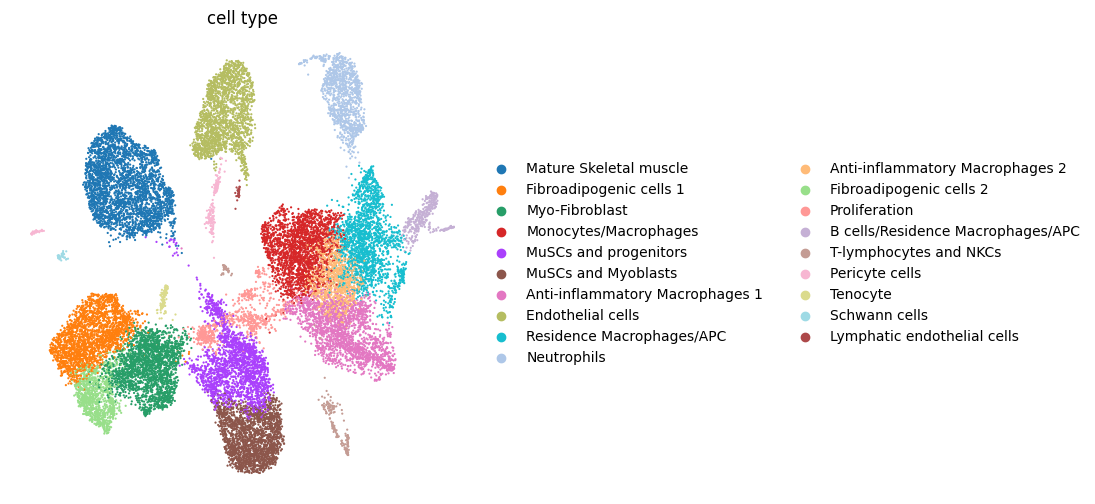

In [4]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['cell type'], frameon = False, s = 10)

C:\Users\tpsa222\.conda\envs\young\lib\site-packages\scanpy\plotting\_tools\scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


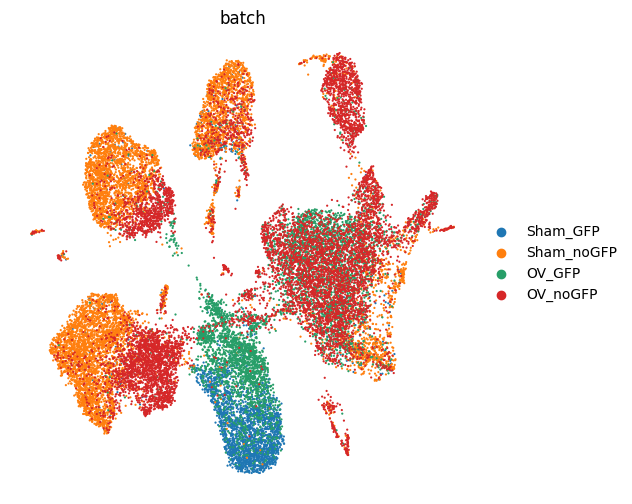

In [5]:
with rc_context({'figure.figsize': (6, 6)}):
    sc.pl.umap(adata, color = ['batch'], frameon = False, s = 10)

In [6]:
adata.X.shape

(23914, 23187)

In [7]:
adata.X.sum(axis = 1)

array([2595.498  ,  699.7018 ,   93.37905, ...,  649.7151 ,  -79.05461,
        884.0791 ], dtype=float32)

In [8]:
adata.raw = adata

In [9]:
adata.obs.groupby('batch').count()

n_genes_by_counts  total_counts  total_counts_mt  pct_counts_mt  \
batch                                                                         
Sham_GFP                 2592          2592             2592           2592   
Sham_noGFP               8061          8061             8061           8061   
OV_GFP                   4735          4735             4735           4735   
OV_noGFP                 8526          8526             8526           8526   

            n_genes  leiden  cell type  condition  
batch                                              
Sham_GFP       2592    2592       2592       2592  
Sham_noGFP     8061    8061       8061       8061  
OV_GFP         4735    4735       4735       4735  
OV_noGFP       8526    8526       8526       8526

In [10]:
adata

AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [11]:
adata.layers["counts"] = adata.X.copy()

In [12]:
# Subset the data for 'Sham_GFP' and 'Sham_noGFP' samples
subset = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]

In [13]:
subset.X = subset.X.toarray()

In [14]:
subset = subset.raw.to_adata() #need to run this if you scaled/regress your data and have negative numbers

In [15]:
cell_subset = subset[subset.obs['cell type'] == 'Endothelial cells']


In [16]:
cell_subset.X = cell_subset.X.toarray()

In [17]:
len(cell_subset.var)

23187

In [18]:
cell_subset

View of AnnData object with n_obs × n_vars = 1502 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [25]:
cell_subset.layers['counts'] = cell_subset.X.copy()
cell_subset

AnnData object with n_obs × n_vars = 1502 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [26]:
#example WITH pseudo replicates
pbs = []
for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts'] #make sure to use raw data
    
    
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3) #change number here for number of replicates deisred
    
    for i, pseudo_rep in enumerate(indices):
    
        rep_adata = sc.AnnData(X = samp_cell_subset[indices[i]].X.sum(axis = 0),
                               var = samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

ValueError: X needs to be 2-dimensional, not 1-dimensional.

In [27]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle, resample
from matplotlib.pyplot import rc_context

# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")

# Read data
adata = sc.read_h5ad('integrated young.h5ad')
print(adata)
print("Shape of data matrix:", adata.X.shape)
print("Sum of data matrix along axis 1:", adata.X.sum(axis=1))
print("Observations grouped by batch:")
print(adata.obs.groupby('batch').count())

# Subset the data for 'Sham_GFP' and 'Sham_noGFP' samples
subset = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]
subset.X = subset.X.toarray()
subset = subset.raw.to_adata()  # Run this if you scaled/regressed your data and have negative numbers
cell_subset = subset[subset.obs['cell type'] == 'Endothelial cells']
cell_subset.X = cell_subset.X.toarray()
cell_subset.layers['counts'] = cell_subset.X.copy()

# Example with pseudo-replicates
pbs = []
for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]

    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Make sure to use raw data

    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change the number here for the desired number of replicates

    for i, pseudo_rep in enumerate(indices):
        rep_adata = sc.AnnData(X=samp_cell_subset[indices[i]].X.sum(axis=0),
                               var=samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)


AnnData object with n_obs × n_vars = 23914 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'
Shape of

In [28]:
pb = sc.concat(pbs)

In [29]:
pb

AnnData object with n_obs × n_vars = 6 × 23187
    obs: 'condition', 'replicate'

In [31]:
pb.obs

condition  replicate
Sham_GFP_0      Sham_GFP          0
Sham_GFP_1      Sham_GFP          1
Sham_GFP_2      Sham_GFP          2
Sham_noGFP_0  Sham_noGFP          0
Sham_noGFP_1  Sham_noGFP          1
Sham_noGFP_2  Sham_noGFP          2

In [34]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)

# Convert counts to integers
counts = counts.astype(int)

counts.index.name = 'gene'
counts.to_csv('Table_endo.csv')


In [1]:
import os
import scanpy as sc
import numpy as np
import pandas as pd
import random
from sklearn.utils import shuffle, resample
from matplotlib.pyplot import rc_context

# Set working directory
os.chdir("Y:/Tolulope/Cellranger Results/YY")

# Read data
adata = sc.read_h5ad('integrated young.h5ad')
#print(adata)
#print("Shape of data matrix:", adata.X.shape)
#print("Sum of data matrix along axis 1:", adata.X.sum(axis=1))
#print("Observations grouped by batch:")
#print(adata.obs.groupby('batch').count())

# Subset the data for 'Sham_GFP' and 'Sham_noGFP' samples
subset = adata[adata.obs['batch'].isin(['OV_GFP', 'OV_noGFP'])]
#subset.X = subset.X.toarray()
subset = subset.raw.to_adata()  # Run this if you scaled/regressed your data and have negative numbers
cell_subset = subset[subset.obs['cell type'] == 'Monocytes/Macrophages']
#cell_subset.X = cell_subset.X.toarray()
cell_subset.layers['counts'] = cell_subset.X.copy()

# Example with pseudo-replicates
pbs = []
for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]

    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Make sure to use raw data

    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change the number here for the desired number of replicates

    for i, pseudo_rep in enumerate(indices):
        rep_adata = sc.AnnData(X=samp_cell_subset[indices[i]].X.sum(axis=0),
                               var=samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)


In [2]:
pb = sc.concat(pbs)

In [3]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)

# Convert counts to integers
counts = counts.astype(int)

counts.index.name = 'gene'
counts.to_csv('Table_Monocytes_Macrophages.csv')


In [3]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)


counts.index.name = 'gene'
counts.to_csv('Table_endo33.csv')


In [30]:
# Subset the data for 'Sham_GFP' and 'Sham_noGFP' samples
subset_adata = adata[adata.obs['batch'].isin(['Sham_GFP', 'Sham_noGFP'])]
cell_subset = subset_adata[subset_adata.obs['cell type'] == 'Endothelial cells']


In [39]:
pb = sc.concat(pbs)

In [57]:
pb

AnnData object with n_obs × n_vars = 6 × 23187
    obs: 'condition', 'replicate'

In [55]:
# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('Table endo.csv')

In [66]:
print(samp_cell_subset[indices[i]].X)

[[-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
  -0.30346513]
 [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
  -0.30346513]
 [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
  -0.30346513]
 ...
 [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 10.
  -0.30346513]
 [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
  -0.30346513]
 [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
  -0.30346513]]


In [14]:
cell_subset.layers["counts"] = cell_subset.X.copy()
# example WITH pseudo replicates
pbs = []

for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]

    samp_cell_subset.X = samp_cell_subset.layers['counts']  # make sure to use raw data

    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # change number here for the number of replicates desired

    # ...

for i, pseudo_rep in enumerate(indices):
    rep_adata = sc.AnnData(X=samp_cell_subset[indices[i]].X.sum(axis=0, keepdims=True),
                           var=samp_cell_subset[indices[i]].var[[]])

    # Apply pseudocount addition to avoid negative values
    rep_adata.X = np.maximum(rep_adata.X, 0)

    # Print and check for negative values in rep_adata.X after pseudocount addition
    print(f"Minimum value in rep_adata.X ({sample}_{i}):", rep_adata.X.min())
    print(f"Number of negative values in rep_adata.X ({sample}_{i}):", (rep_adata.X < 0).sum())

    rep_adata.obs_names = [sample + '_' + str(i)]
    rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
    rep_adata.obs['replicate'] = i

    pbs.append(rep_adata)

# Concatenate pseudo-replicates
pb = sc.concat(pbs)

# Print and check for negative values
print("Minimum value in pb.X:", pb.X.min())
print("Number of negative values in pb.X:", (pb.X < 0).sum())

# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('Table_endo.csv')


Minimum value in rep_adata.X (Sham_noGFP_0): 0.0
Number of negative values in rep_adata.X (Sham_noGFP_0): 0
Minimum value in rep_adata.X (Sham_noGFP_1): 0.0
Number of negative values in rep_adata.X (Sham_noGFP_1): 0
Minimum value in rep_adata.X (Sham_noGFP_2): 0.0
Number of negative values in rep_adata.X (Sham_noGFP_2): 0
Minimum value in pb.X: 0.0
Number of negative values in pb.X: 0


In [15]:
print(cell_subset.obs['condition'].unique())


['Sham_GFP', 'Sham_noGFP']
Categories (2, object): ['Sham_GFP', 'Sham_noGFP']


In [19]:
import random
import numpy as np
import pandas as pd
import scanpy as sc

# Assuming cell_subset is already loaded

# Create a copy of counts in 'X' layer
cell_subset.layers["counts"] = cell_subset.X.copy()

# Example with pseudo-replicates
pbs = []

for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]

    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Use raw data

    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change number here for the number of replicates desired

    for i, pseudo_rep in enumerate(indices):
        rep_adata = sc.AnnData(X=samp_cell_subset[indices[i]].X.sum(axis=0, keepdims=True),
                               var=samp_cell_subset[indices[i]].var[[]])

        # Apply pseudocount addition to avoid negative values
        rep_adata.X = np.maximum(rep_adata.X, 0)

        # Round values to integers
        rep_adata.X = np.round(rep_adata.X)

        # Print and check for non-integer values in rep_adata.X after rounding
        non_integer_values = rep_adata.X[rep_adata.X != np.round(rep_adata.X)]
        print(f"Non-integer values in rep_adata.X ({sample}_{i}): {non_integer_values}")

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

# Concatenate pseudo-replicates
pb = sc.concat(pbs)

# Round values to integers in the concatenated data
pb.X = np.round(pb.X)

# Print and check for non-integer values in pb.X after rounding
non_integer_values_pb = pb.X[pb.X != np.round(pb.X)]
print(f"Non-integer values in pb.X: {non_integer_values_pb}")

# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('Table_endo.csv')


Non-integer values in rep_adata.X (Sham_GFP_0): []
Non-integer values in rep_adata.X (Sham_GFP_1): []
Non-integer values in rep_adata.X (Sham_GFP_2): []
Non-integer values in rep_adata.X (Sham_noGFP_0): []
Non-integer values in rep_adata.X (Sham_noGFP_1): []
Non-integer values in rep_adata.X (Sham_noGFP_2): []
Non-integer values in pb.X: []


In [26]:
import random
import numpy as np
import pandas as pd
import scanpy as sc

# Assuming cell_subset is already loaded

# Create a copy of counts in 'X' layer
cell_subset.layers["counts"] = cell_subset.X.copy()

# Example with pseudo-replicates
pbs = []

for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Use raw data
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change number here for the number of replicates desired

    for i, pseudo_rep in enumerate(indices):
        rep_adata = sc.AnnData(X=samp_cell_subset[indices[i]].X.sum(axis=0)[None, :],
                               var=samp_cell_subset[indices[i]].var[[]])
        
        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i
        
        pbs.append(rep_adata)

# Concatenate pseudo-replicates
pb = sc.concat(pbs)

# Check for non-integer values in pb.X before rounding
non_integer_values_pb = pb.X[pb.X != np.round(pb.X)]
print(f"Non-integer values in pb.X before rounding: {non_integer_values_pb}")

# Round values to integers in the concatenated data
pb.X = np.round(pb.X)

# Check for non-integer values in pb.X after rounding
non_integer_values_pb = pb.X[pb.X != np.round(pb.X)]
print(f"Non-integer values in pb.X after rounding: {non_integer_values_pb}")

# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'
counts.to_csv('Table_endo.csv')


Non-integer values in pb.X before rounding: [ -3.9834027   -0.50406283  -1.1831657  ...  -9.144828   -27.05534
  -0.21423006]
Non-integer values in pb.X after rounding: []


In [27]:
print(f"Non-integer values in cell_subset.X: {cell_subset.X[cell_subset.X != np.round(cell_subset.X)]}")


Non-integer values in cell_subset.X: [-0.11381154 -0.0144018  -0.03380473 ... -0.01962411 -0.14998014
 -0.30346513]


In [ ]:
cell_subset.X = np.maximum(cell_subset.X, 0)


In [32]:
cell_subset

AnnData object with n_obs × n_vars = 1502 × 23187
    obs: 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'batch', 'n_genes', 'leiden', 'cell type', 'condition'
    var: 'gene_ids', 'feature_types', 'mt', 'n_cells_by_counts-OV_GFP', 'mean_counts-OV_GFP', 'pct_dropout_by_counts-OV_GFP', 'total_counts-OV_GFP', 'n_cells_by_counts-OV_noGFP', 'mean_counts-OV_noGFP', 'pct_dropout_by_counts-OV_noGFP', 'total_counts-OV_noGFP', 'n_cells_by_counts-Sham_GFP', 'mean_counts-Sham_GFP', 'pct_dropout_by_counts-Sham_GFP', 'total_counts-Sham_GFP', 'n_cells_by_counts-Sham_noGFP', 'mean_counts-Sham_noGFP', 'pct_dropout_by_counts-Sham_noGFP', 'total_counts-Sham_noGFP', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'batch_colors', 'cell type_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 

In [43]:
import random
import numpy as np
import pandas as pd
import scanpy as sc

# Assuming cell_subset is already loaded

# Create a copy of counts in 'X' layer
cell_subset.layers["counts"] = cell_subset.X.copy()

# Example with pseudo-replicates
pbs = []

for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Use raw data
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change number here for the number of replicates desired
    
    for i, pseudo_rep in enumerate(indices):
        # Ensure X is 2D before summing along axis=0
        rep_sum = samp_cell_subset[indices[i]].X.sum(axis=0, keepdims=True)
       
        rep_adata = sc.AnnData(X=rep_sum,
                               var=samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

# Concatenate pseudo-replicates
pb = sc.concat(pbs)

# Set negative values to zero before rounding
pb.X[pb.X < 0] = 0

# Round values to integers in the concatenated data
pb.X = np.round(pb.X).astype(int)

# Check for non-integer values in pb.X after rounding
non_integer_values_pb_after = pb.X[pb.X != np.round(pb.X)]
print(f"Non-integer values in pb.X after rounding: {non_integer_values_pb_after}")

# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'


# Save the DataFrame to a CSV file
counts.to_csv('Table_endo.csv')


Non-integer values in pb.X after rounding: []


In [45]:
import random
import numpy as np
import pandas as pd
import scanpy as sc

# Assuming cell_subset is already loaded

# Create a copy of counts in 'X' layer
subset_adata.layers["counts"] = subset_adata.X.copy()

# Example with pseudo-replicates
pbs = []

for sample in cell_subset.obs.batch.unique():
    samp_cell_subset = cell_subset[cell_subset.obs['batch'] == sample]
    
    samp_cell_subset.X = samp_cell_subset.layers['counts']  # Use raw data
    
    indices = list(samp_cell_subset.obs_names)
    random.shuffle(indices)
    indices = np.array_split(np.array(indices), 3)  # Change number here for the number of replicates desired
    
    for i, pseudo_rep in enumerate(indices):
        # Ensure X is 2D before summing along axis=0
        rep_sum = samp_cell_subset[indices[i]].X.sum(axis=0, keepdims=True)
       
        rep_adata = sc.AnnData(X=rep_sum,
                               var=samp_cell_subset[indices[i]].var[[]])

        rep_adata.obs_names = [sample + '_' + str(i)]
        rep_adata.obs['condition'] = samp_cell_subset.obs['condition'].iloc[0]
        rep_adata.obs['replicate'] = i

        pbs.append(rep_adata)

# Concatenate pseudo-replicates
pb = sc.concat(pbs)


# Save counts as a CSV file with sample name
counts = pd.DataFrame(pb.X.T, columns=pb.obs_names, index=pb.var_names)
counts.index.name = 'gene'


# Save the DataFrame to a CSV file
counts.to_csv('Table_endo.csv')


In [16]:
counts

Sham_GFP_replicate0_0  Sham_GFP_replicate0_1  \
gene                                                           
Xkr4                        -0.055053              -0.040835   
Gm1992                       0.057452              -0.149095   
Gm19938                      0.172483               0.006581   
Rp1                         -0.049954               0.044431   
Sox17                        0.167496               2.188455   
...                               ...                    ...   
Tmlhe                       -0.136623              -0.175288   
CR974586.4                   0.022314               0.075878   
4933409K07Rik               -0.098288               0.141006   
CAAA01147332.1              -0.001432               0.019613   
AC149090.1                  -0.018513              -0.022946   

                Sham_GFP_replicate0_2  Sham_GFP_replicate0_3  \
gene                                                           
Xkr4                         0.014175               0.013462   
Gm1992                       0.034139               0.026110   
Gm19938                     -0.133475              -0.139722   
Rp1                          0.029823               0.104603   
Sox17                        0.021493               0.036098   
...                               ...                    ...   
Tmlhe                        0.007249              -0.140231   
CR974586.4                  -0.094303               0.007806   
4933409K07Rik                0.230639              -0.035900   
CAAA01147332.1               0.013056               0.021356   
AC149090.1                  -0.028482               0.068527   

                Sham_GFP_replicate0_4  Sham_GFP_replicate0_5  \
gene                                                           
Xkr4                         0.152561               0.124633   
Gm1992                      -0.057826               0.012174   
Gm19938                      0.096652               0.030887   
Rp1                         -0.052067              -0.118010   
Sox17                        0.124744               0.075056   
...                               ...                    ...   
Tmlhe                        0.057332              -0.102988   
CR974586.4                   0.182398               0.071210   
4933409K07Rik               -0.025948              -0.071456   
CAAA01147332.1               0.038162               0.937707   
AC149090.1                  -0.049729               0.032520   

                Sham_GFP_replicate0_6  Sham_GFP_replicate0_7  \
gene                                                           
Xkr4                         0.043340               0.014272   
Gm1992                      -0.159396              -0.049579   
Gm19938                     -0.027342              -0.050854   
Rp1                         -0.019249              -0.123377   
Sox17                       -0.089006              -0.072017   
...                               ...                    ...   
Tmlhe                       -0.015423              -0.052603   
CR974586.4                   0.044667               0.037785   
4933409K07Rik               -0.100270              -0.144423   
CAAA01147332.1              -0.093155              -0.165582   
AC149090.1                   0.032751              -0.033234   

                Sham_GFP_replicate0_8  Sham_GFP_replicate0_9  ...  \
gene                                                          ...   
Xkr4                         0.064006               0.004260  ...   
Gm1992                       0.121735               0.159969  ...   
Gm19938                     -0.094855              -0.118293  ...   
Rp1                          0.018785              -0.057997  ...   
Sox17                       -0.004360               1.976423  ...   
...                               ...                    ...  ...   
Tmlhe                        0.012414               0.084773  ...   
CR974586.4                   0.114687              -0.140959  .